# Introduction

Introduction

This Kaggle notebook focuses on analyzing the performance of students in high school exams through exploratory data analysis (EDA). The dataset used for this analysis includes information about the marks secured by students in various subjects, such as math, reading, and writing. The dataset specifically targets students from the United States.

The variables considered in the dataset are as follows:

* Gender: Indicates the gender of the student (male or female).
* Race/Ethnicity: Represents the race or ethnicity to which the student belongs.
* Parental Level of Education: Describes the educational background of the student's parents.
* Lunch: Specifies the type of lunch the student receives (standard or free/reduced).
* Test Preparation Course: Indicates whether the student completed a test preparation course.
* Math Score: Represents the score obtained by the student in the math exam.
* Reading Score: Represents the score obtained by the student in the reading exam.
* Writing Score: Represents the score obtained by the student in the writing exam.

This notebook is structured into two main sections:

Data Cleaning and Manipulation: In this section, we will preprocess the dataset, handle missing values, and perform any necessary transformations or feature engineering.
Data Visualization: Here, we will visualize the data to gain insights and identify patterns or trends in the students' performance.

# Purpose

The main objective of this Kaggle notebook is to analyze the dataset on students' performance in high school exams. By exploring the marks secured by students, we aim to uncover patterns and relationships among the variables and extract meaningful insights. Specifically, we will focus on students from the United States.

The purpose of this analysis is threefold:

* Data Quality Assessment: We will assess the quality of the dataset by handling missing values, checking for outliers or anomalies, and verifying data consistency. Ensuring data integrity is crucial for drawing accurate conclusions and making reliable predictions.

* Understand Performance Patterns: We will examine the relationship between various factors, such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course, and the students' scores in math, reading, and writing. This exploration will allow us to identify any significant performance patterns or disparities among different student groups.

* Insights for Educational Improvement: By analyzing the dataset, we aim to derive insights that can contribute to improving the educational system. Understanding the factors that influence student performance can guide interventions and policies aimed at enhancing academic outcomes and reducing achievement gaps.

Through this analysis, we strive to gain a comprehensive understanding of students' performance in exams, identify influential factors, and provide valuable insights.

# Cleaning and Manipulating

In this section the following will be performed:

* Importing Libraries and Data
* Viewing Data
* View Data Dimensions
* View Data Attribute Names
* View Data Structure
* Summarize the Data
* Check for Missing Data
* Adding a Total Score 


In [1]:
library(tidyverse)
library(grid)
library(knitr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
View(df)

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78
female,group B,some college,standard,completed,88,95,92
male,group B,some college,free/reduced,none,40,43,39
male,group D,high school,free/reduced,completed,64,64,67


In [4]:
dim(df)
names(df)

[1] 1000    8

[1] "gender"                      "race/ethnicity"             
[3] "parental level of education" "lunch"                      
[5] "test preparation course"     "math score"                 
[7] "reading score"               "writing score"

In [5]:
str (df)

spc_tbl_ [1,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ gender                     : chr [1:1000] "female" "female" "female" "male" ...
 $ race/ethnicity             : chr [1:1000] "group B" "group C" "group B" "group A" ...
 $ parental level of education: chr [1:1000] "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr [1:1000] "standard" "standard" "standard" "free/reduced" ...
 $ test preparation course    : chr [1:1000] "none" "completed" "none" "none" ...
 $ math score                 : num [1:1000] 72 69 90 47 76 71 88 40 64 38 ...
 $ reading score              : num [1:1000] 72 90 95 57 78 83 95 43 64 60 ...
 $ writing score              : num [1:1000] 74 88 93 44 75 78 92 39 67 50 ...
 - attr(*, "spec")=
  .. cols(
  ..   gender = col_character(),
  ..   `race/ethnicity` = col_character(),
  ..   `parental level of education` = col_character(),
  ..   lunch = col_character(),
  ..   `test preparation course` 

In [6]:
summary(df)

    gender          race/ethnicity     parental level of education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test preparation course   math score     reading score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [7]:
# Check for null values in the dataset
null_counts <- colSums(is.na(df))

# Print the null value counts
print(null_counts)

                     gender              race/ethnicity 
                          0                           0 
parental level of education                       lunch 
                          0                           0 
    test preparation course                  math score 
                          0                           0 
              reading score               writing score 
                          0                           0 


In [8]:
# Creating A Total Score Column 
df$total_score <- (df$`math score` + df$`reading score` + df$`writing score`) / 3

In [9]:
# Create a new column 'letter_grade' based on 'total_score'
df$grade <- cut(df$total_score, breaks = c(0, 59, 69, 79, 89, 100),
                       labels = c("F", "D", "C", "B", "A"), include.lowest = TRUE)

In [10]:
head(df)

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,grade
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
female,group B,bachelor's degree,standard,none,72,72,74,72.66667,C
female,group C,some college,standard,completed,69,90,88,82.33333,B
female,group B,master's degree,standard,none,90,95,93,92.66667,A
male,group A,associate's degree,free/reduced,none,47,57,44,49.33333,F
male,group C,some college,standard,none,76,78,75,76.33333,C
female,group B,associate's degree,standard,none,71,83,78,77.33333,C


# Gender vs Test Grades

In this section, we will investigate the relationship between gender and test grades among students.

We will explore the following aspects:

Count of Male and Female Students: We will calculate and display the total count of male and female students in the dataset. This will give us an overview of the gender composition and help us understand the relative proportions of male and female students.

Subject-Specific Performance: We will analyze the test grades in math, reading, and writing for male and female students separately. Are there any specific subjects in which one gender tends to outperform the other? Do male students generally excel in math while female students excel in reading or writing, or vice versa?

Distribution of Grades: We will visualize the distribution of test grades for each gender using histograms or box plots. This will allow us to understand the spread of scores and identify any variations in the distribution patterns between male and female students. Are there any noticeable differences in the range, median, or outliers of the grade distributions?

Performance Disparities: We will investigate if there are any disparities or gaps in performance between male and female students across different score ranges. Are there instances where one gender consistently outperforms the other, or are the performance differences more nuanced and context-specific?

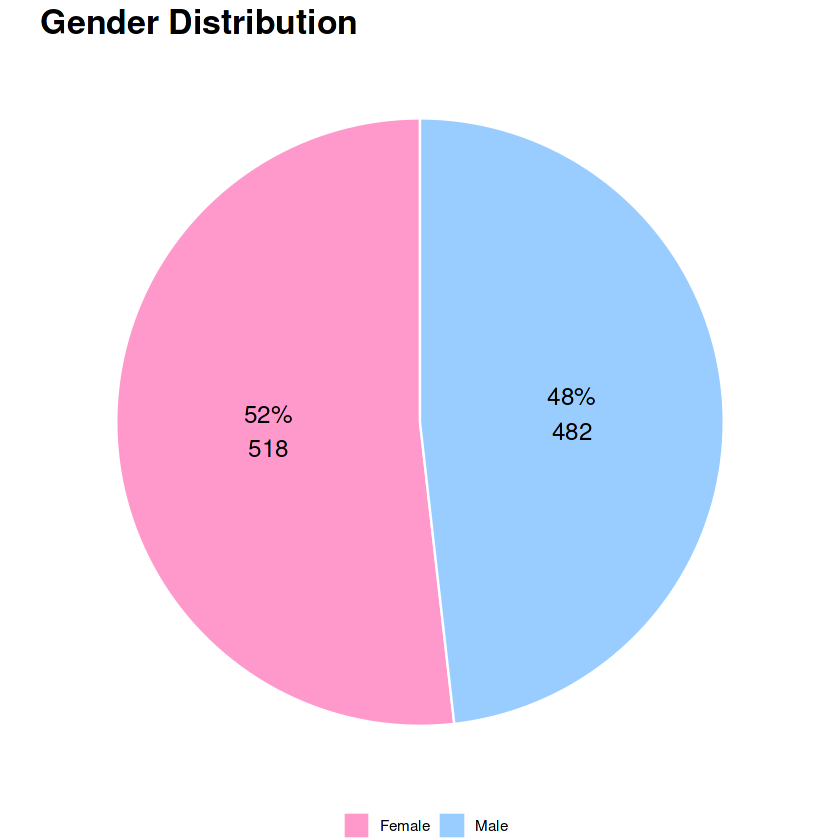

In [11]:
# Count the number of occurrences for each gender
gender_counts <- table(df$gender)

# Create a data frame with gender, count, and percentage
gender_data <- data.frame(gender = names(gender_counts),
                          count = as.numeric(gender_counts))

# Calculate the percentage
gender_data$percentage <- prop.table(gender_counts) * 100

# Create the pie chart with percentages, counts, and labels
pie_chart <- ggplot(gender_data, aes(x = "", y = count, fill = gender)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  labs(title = "Gender Distribution",
       fill = "Gender") +
  scale_fill_manual(values = c("female" = "#FF99CC", "male" = "#99CCFF"),
                    labels = c("Female", "Male")) +
  theme_void() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        legend.position = "bottom",
        legend.title = element_blank())

# Add labels for percentage and count
pie_chart <- pie_chart +
  geom_text(aes(label = paste0(round(percentage), "%\n", count)), 
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 5)

# Print the pie chart
print(pie_chart)

# Gender Distribution 

The dataset has a slightly higher representation of female students, with males accounting for around 48% and females for around 52% of the total student population.

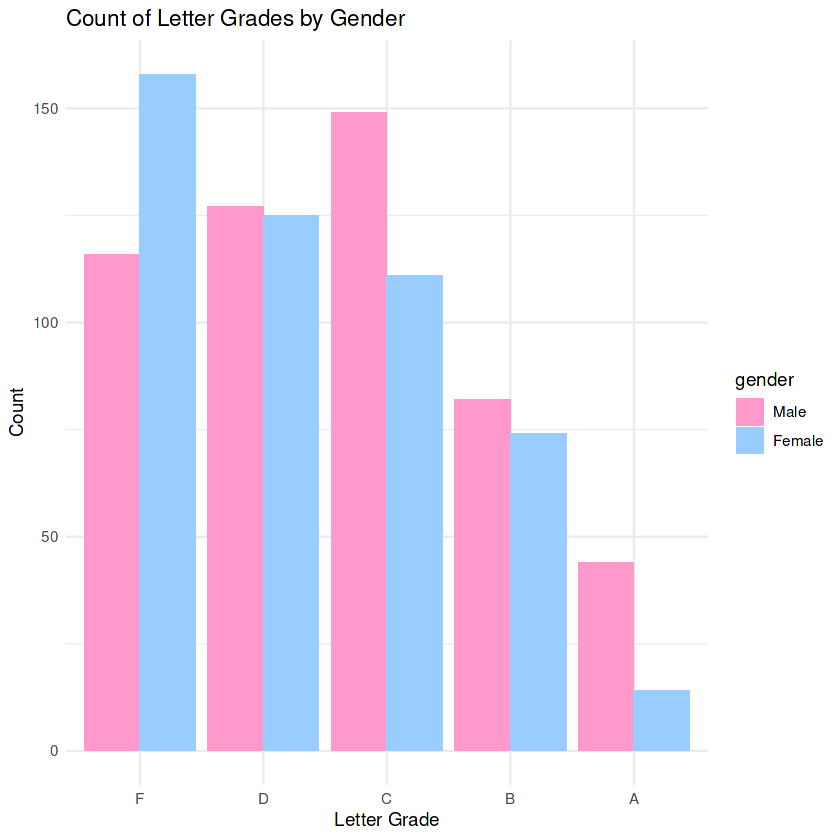

In [12]:
# Define color palette
colors <- c("female" = "#FF99CC", "male" = "#99CCFF")

# Create count plot
df %>%
  ggplot(aes(x = grade, fill = gender)) +
  geom_bar(position = "dodge") +
  labs(x = "Letter Grade", y = "Count", title = "Count of Letter Grades by Gender") +
  scale_fill_manual(values = colors, labels = c("Male", "Female")) +
  theme_minimal()

# Count of Letter Grades by Gender

The "Count of Letter Grades by Gender" chart reveals the distribution of letter grades among male and female students. Here are the key observations:

* Most Common to Least Common Grades: The chart shows that the most common letter grade among both males and females is "F," followed by "C," "D," "B," and "A" as the least common grade.

* Gender Disparities: In terms of gender differences, females tend to receive more of each letter grade compared to males, except for the letter grade "F." This suggests that, on average, female students perform better academically across various grade levels.

* Significance of "F" Grades: The chart highlights a notable difference in the count of "F" grades between males and females. There are more males who received an "F" grade compared to females, indicating a potential challenge or struggle in academic performance for male students.

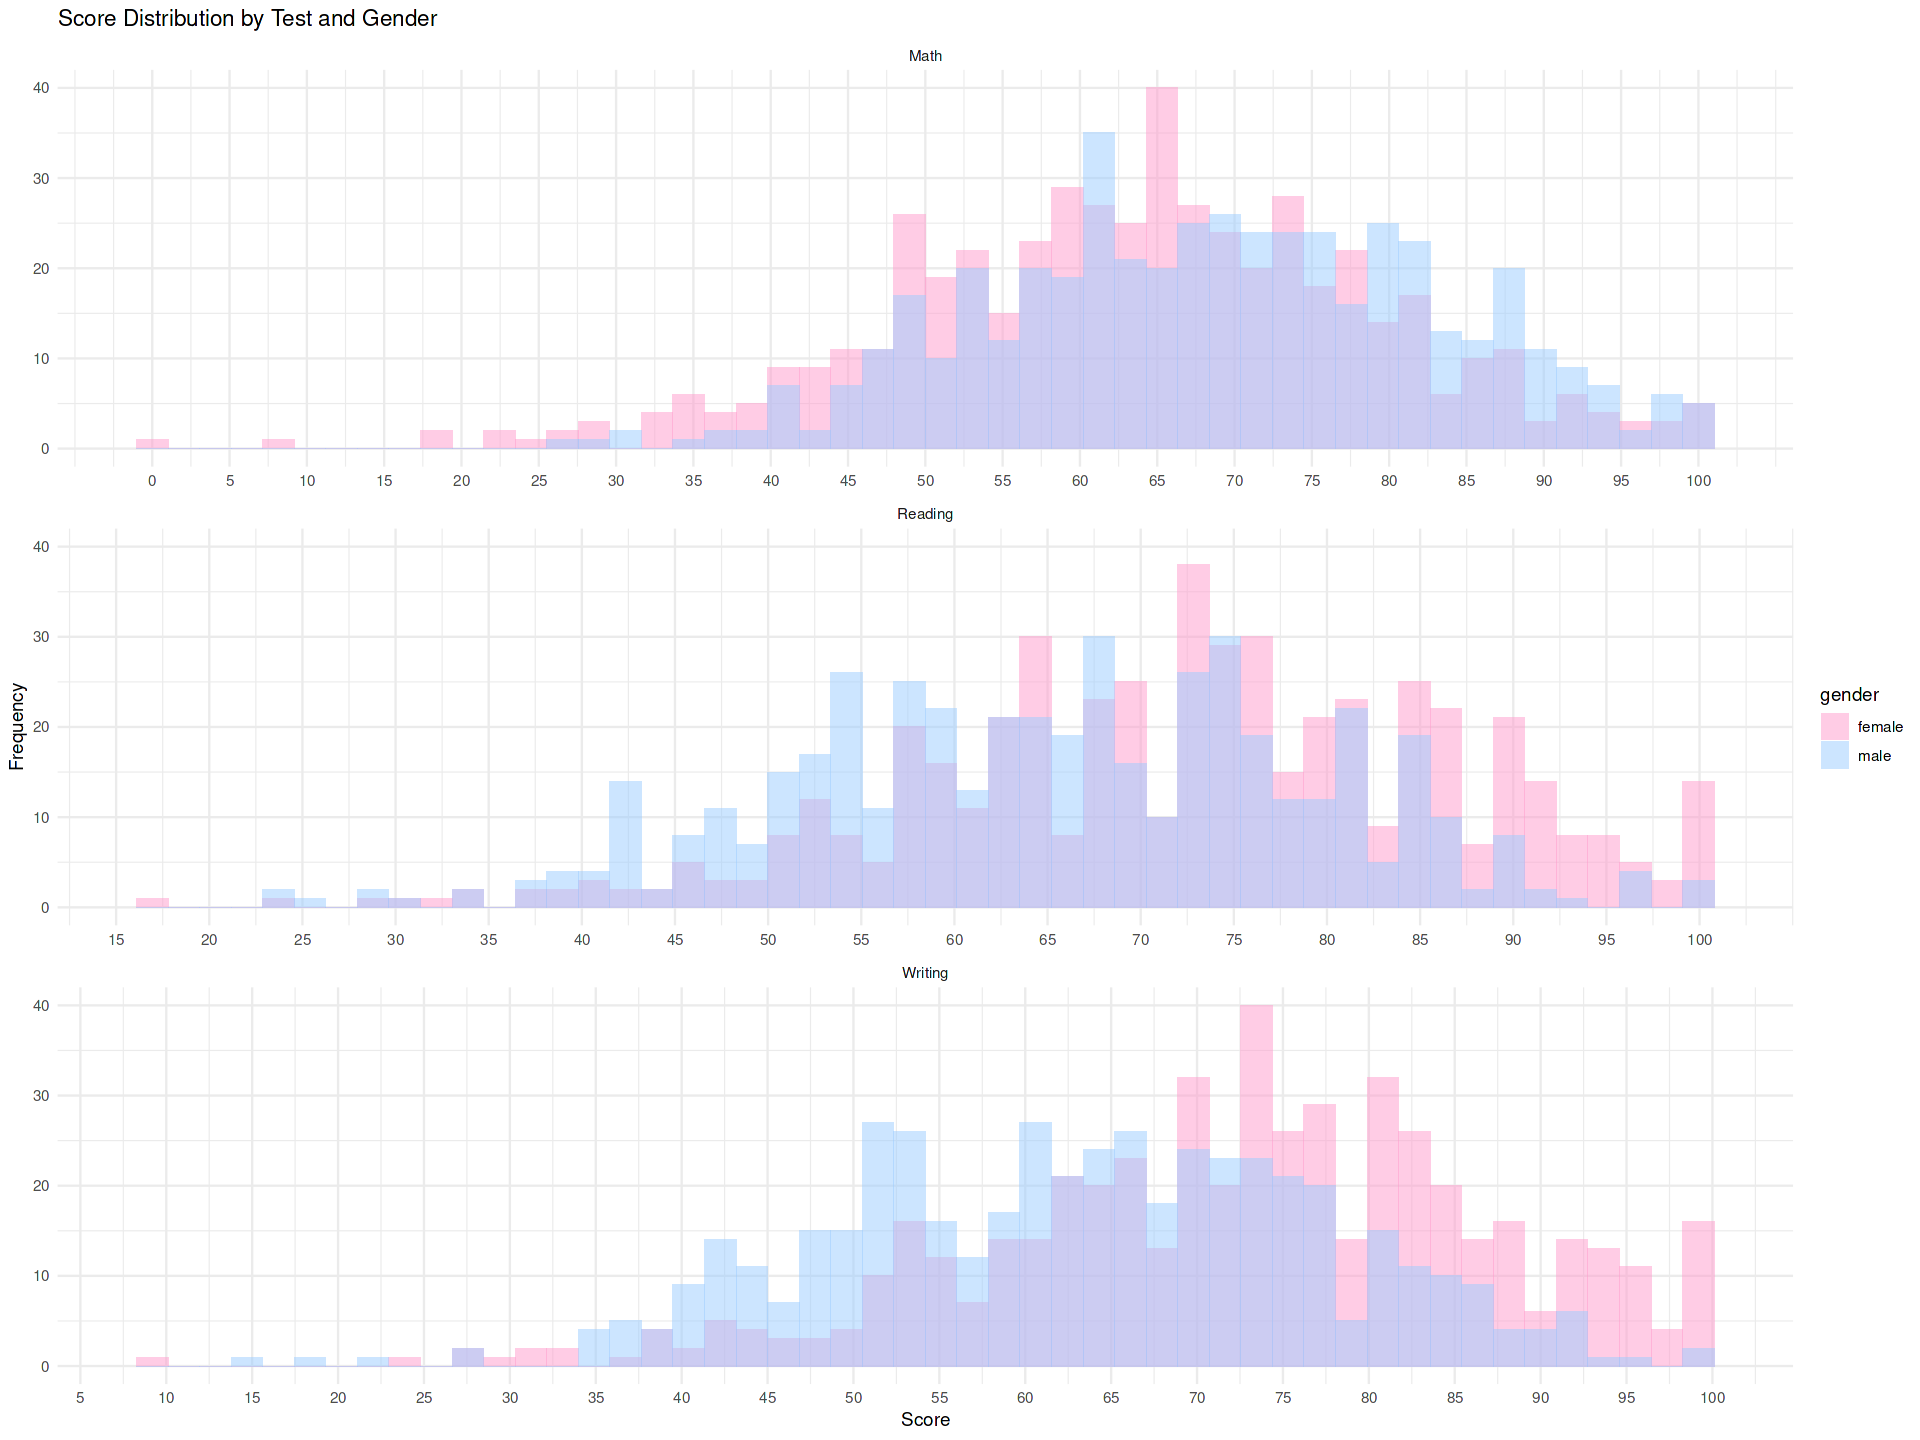

In [13]:

# Define color palette
colors <- c("female" = "#FF99CC", "male" = "#99CCFF")

# Define the number of bins and tick marks
num_bins <- 50
tick_marks <- seq(0, 100, by = 5)

# Combine male and female scores for each test
combined_df <- rbind(
  transform(df, test = "Math", gender = as.factor(gender), score = `math score`),
  transform(df, test = "Reading", gender = as.factor(gender), score = `reading score`),
  transform(df, test = "Writing", gender = as.factor(gender), score = `writing score`)
)

# Set options for larger graph display
options(repr.plot.width = 16, repr.plot.height = 12)

# Create the combined histogram plot
ggplot(data = combined_df, aes(x = score, fill = gender)) +
  geom_histogram(bins = num_bins, position = "identity", alpha = 0.5) +
  labs(title = "Score Distribution by Test and Gender", x = "Score", y = "Frequency") +
  scale_fill_manual(values = colors) +
  scale_x_continuous(breaks = tick_marks) +
  facet_wrap(~ test, nrow = 3, ncol = 1, scales = "free_x") +
  theme_minimal()


# Score Distribution by Test and Gender

The x-axis represents the score range, while the y-axis represents the frequency or number of students who received scores within each range. The histograms are divided into two colors: pink for females and blue for males.

Insights:

* Math Scores: The distribution of math scores shows that more males score higher compared to females. The histogram for males is shifted more towards the right, indicating a higher concentration of scores towards the upper end of the scale. In contrast, the histogram for females is slightly shifted to the left, suggesting a lower concentration of high scores. This suggests that, on average, males perform better in math compared to females.

* Reading Scores: The distribution of reading scores shows a contrasting pattern compared to math scores. Females tend to score higher in reading compared to males. The histogram for females is shifted more towards the right, indicating a higher concentration of scores towards the upper end of the scale. On the other hand, the histogram for males is slightly shifted to the left, suggesting a lower concentration of high scores. This indicates that, on average, females outperform males in reading.

* Writing Scores: Similar to reading scores, females tend to score higher in writing compared to males. The histogram for females is shifted more towards the right, indicating a higher concentration of scores towards the upper end of the scale. The histogram for males, however, is greatly shifted to the left, suggesting a lower concentration of high scores. This suggests that, on average, females excel more in writing compared to males. There is a more noticable difference between scores on the writing test, suggesting this is the biggest difference between the two genders among all test.

Overall, these charts highlight the gender differences in performance across different academic subjects, with males performing better in math and females performing better in reading and writing. The variation in score distributions provides valuable insights into the academic strengths and challenges experienced by male and female students.

In [14]:

# Calculate mean and median for each test
math_mean <- mean(df$`math score`)
math_median <- median(df$`math score`)

reading_mean <- mean(df$`reading score`)
reading_median <- median(df$`reading score`)

writing_mean <- mean(df$`writing score`)
writing_median <- median(df$`writing score`)

# Calculate mean and median by gender
math_mean_gender <- aggregate(`math score` ~ gender, data = df, FUN = mean)
math_median_gender <- aggregate(`math score` ~ gender, data = df, FUN = median)

reading_mean_gender <- aggregate(`reading score` ~ gender, data = df, FUN = mean)
reading_median_gender <- aggregate(`reading score` ~ gender, data = df, FUN = median)

writing_mean_gender <- aggregate(`writing score` ~ gender, data = df, FUN = mean)
writing_median_gender <- aggregate(`writing score` ~ gender, data = df, FUN = median)

# Print the results
cat("Math Score:\n")
cat("Mean:", math_mean, "\n")
cat("Median:", math_median, "\n\n")

cat("Reading Score:\n")
cat("Mean:", reading_mean, "\n")
cat("Median:", reading_median, "\n\n")

cat("Writing Score:\n")
cat("Mean:", writing_mean, "\n")
cat("Median:", writing_median, "\n\n")

cat("Mean and Median by Gender:\n")
cat("Math Score:\n")
kable(math_mean_gender, caption = "Mean by Gender")
kable(math_median_gender, caption = "Median by Gender")

cat("Reading Score:\n")
kable(reading_mean_gender, caption = "Mean by Gender")
kable(reading_median_gender, caption = "Median by Gender")

cat("Writing Score:\n")
kable(writing_mean_gender, caption = "Mean by Gender")
kable(writing_median_gender, caption = "Median by Gender")


Math Score:
Mean: 66.089 
Median: 66 

Reading Score:
Mean: 69.169 
Median: 70 

Writing Score:
Mean: 68.054 
Median: 69 

Mean and Median by Gender:
Math Score:




Table: Mean by Gender

|gender | math score|
|:------|----------:|
|female |   63.63320|
|male   |   68.72822|



Table: Median by Gender

|gender | math score|
|:------|----------:|
|female |         65|
|male   |         69|

Reading Score:




Table: Mean by Gender

|gender | reading score|
|:------|-------------:|
|female |      72.60811|
|male   |      65.47303|



Table: Median by Gender

|gender | reading score|
|:------|-------------:|
|female |            73|
|male   |            66|

Writing Score:




Table: Mean by Gender

|gender | writing score|
|:------|-------------:|
|female |      72.46718|
|male   |      63.31120|



Table: Median by Gender

|gender | writing score|
|:------|-------------:|
|female |            74|
|male   |            64|

# Mean and Median by Gender

Another way to look at the previous data, the following insights can be summarized:

Math Score:

* The mean math score for all students is approximately 66.089, indicating a slightly below-average performance.
* The median math score is 66, which suggests a relatively balanced distribution of scores around the center.

Reading Score:

* The mean reading score for all students is approximately 69.169, indicating an average performance.
* The median reading score is 70, suggesting a relatively balanced distribution of scores around the center.

Writing Score:

* The mean writing score for all students is approximately 68.054, indicating an average performance.
* The median writing score is 69, suggesting a relatively balanced distribution of scores around the center.

Gender Differences:

* Math scores, males have a higher mean (68.728) and median (69) compared to females, indicating that, on average, males perform better in math.
* Reading scores, females have a higher mean (72.60811) and median (73) compared to males, indicating that, on average, females outperform males in reading.
* Writing scores, females have a higher mean (72.46718) and median (74) compared to males, indicating that, on average, females excel more in writing.

This alternative presentation of the findings offers a different perspective on the data, providing additional support for the conclusions previously drawn. By examining the mean and median scores for each gender across different subjects, we gain a numerical perspective that complements the visual insights provided by the charts. This complementary analysis further strengthens our understanding of the gender differences in performance across math, reading, and writing. The consistency between the insights derived from both the chart and numerical analysis enhances our confidence in the observed patterns and their implications.

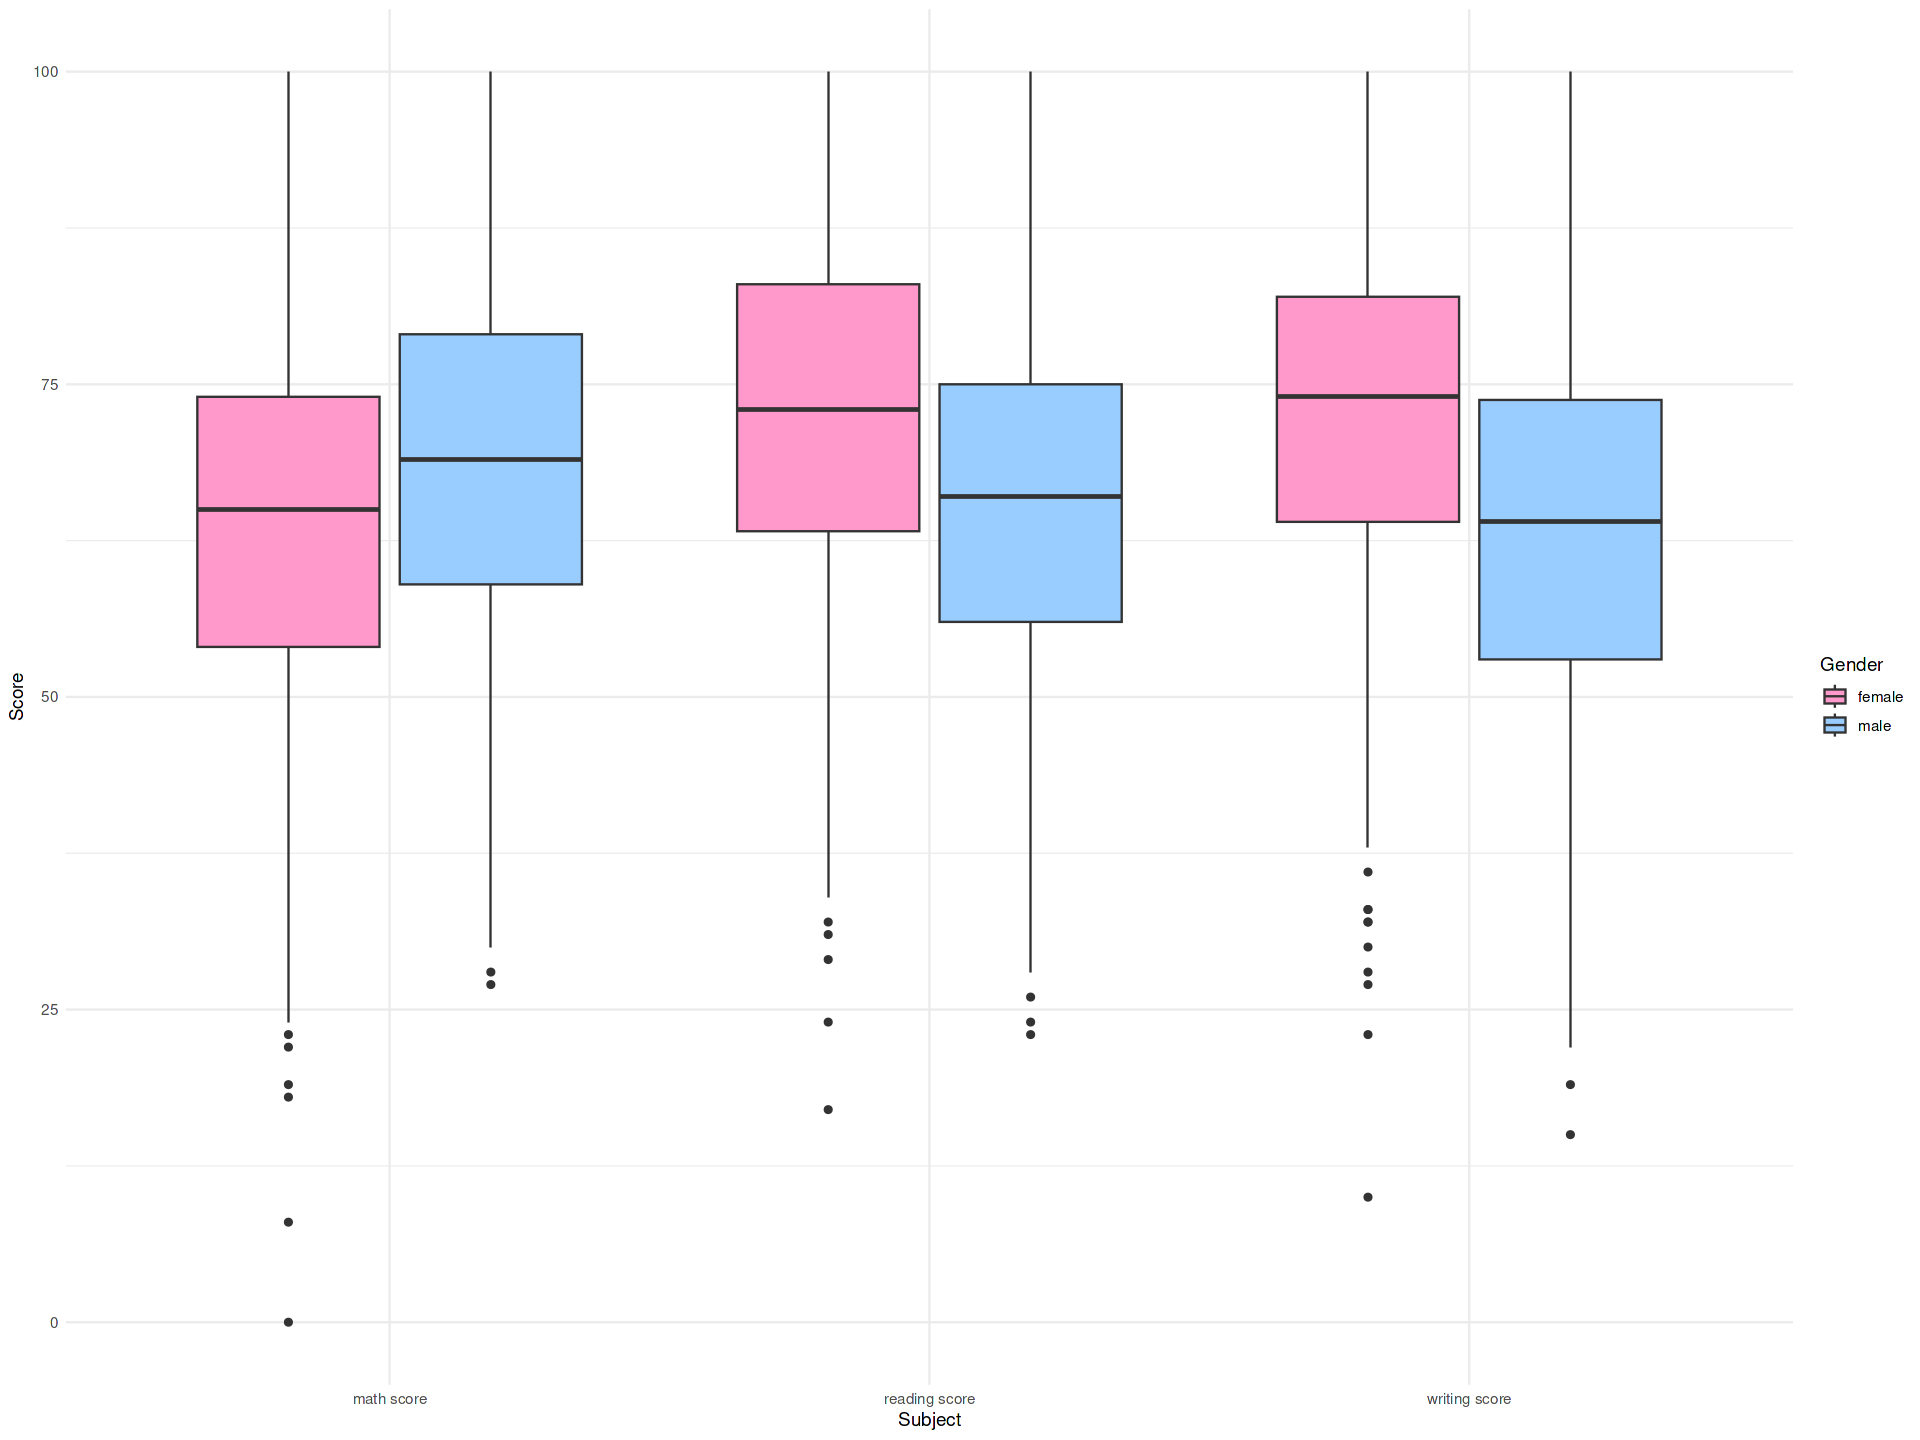

In [15]:

# Define color palette
colors <- c("female" = "#FF99CC", "male" = "#99CCFF")

# Create box plot for each subject score by gender
df %>%
  pivot_longer(cols = c("math score", "reading score", "writing score"), names_to = "subject", values_to = "score") %>%
  ggplot(aes(x = subject, y = score, fill = gender)) +
  geom_boxplot() +
  scale_fill_manual(values = colors) +  # Set the color palette
  labs(x = "Subject", y = "Score", fill = "Gender") +
  theme_minimal()

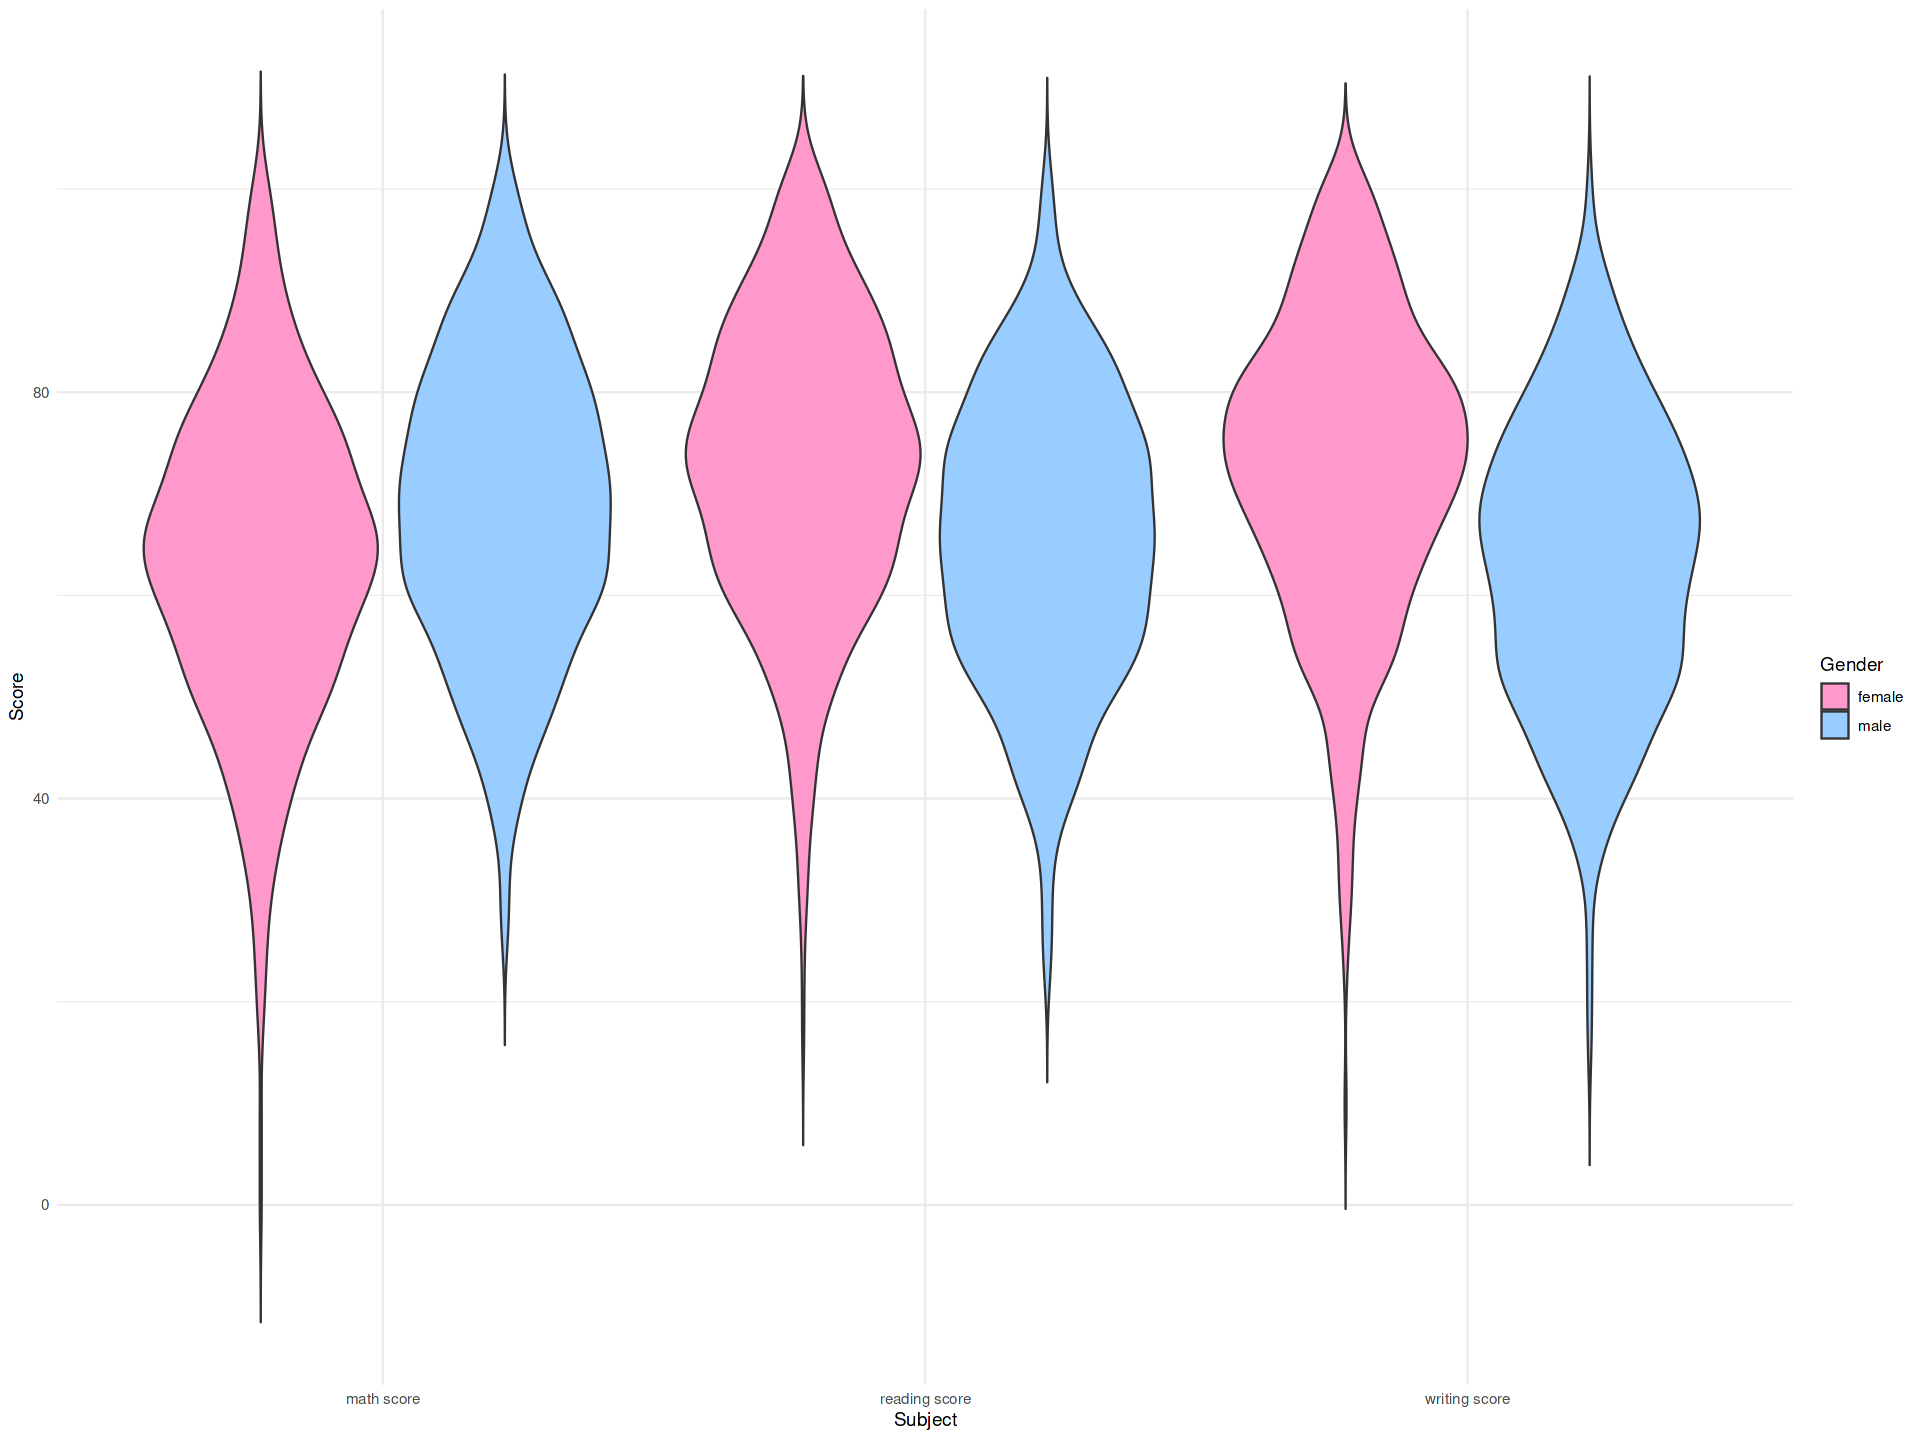

In [16]:

# Define color palette
colors <- c("female" = "#FF99CC", "male" = "#99CCFF")

# Create violin plot for each subject score by gender
df %>%
  pivot_longer(cols = c("math score", "reading score", "writing score"), names_to = "subject", values_to = "score") %>%
  ggplot(aes(x = subject, y = score, fill = gender)) +
  geom_violin(trim = FALSE) +
  scale_fill_manual(values = colors) +  # Set the color palette
  labs(x = "Subject", y = "Score", fill = "Gender") +
  theme_minimal()


In [17]:
# Create box plot for each subject score by gender
subject_score_summary <- df %>%
  pivot_longer(cols = c("math score", "reading score", "writing score"), names_to = "subject", values_to = "score") %>%
  group_by(subject, gender) %>%
  summarize(mean = mean(score),
            median = median(score),
            sd = sd(score),
            min = min(score),
            max = max(score)) %>%
  ungroup()

# Print summary statistics for each subject score by gender
print(subject_score_summary)

`summarise()` has grouped output by 'subject'. You can override using the
`.groups` argument.


# A tibble: 6 × 7
  subject       gender  mean median    sd   min   max
  <chr>         <chr>  <dbl>  <dbl> <dbl> <dbl> <dbl>
1 math score    female  63.6     65  15.5     0   100
2 math score    male    68.7     69  14.4    27   100
3 reading score female  72.6     73  14.4    17   100
4 reading score male    65.5     66  13.9    23   100
5 writing score female  72.5     74  14.8    10   100
6 writing score male    63.3     64  14.1    15   100


# Box and Violin Plot by Test and Gender

Insights:

* Math Scores: Females have a wider spread of scores in the Math subject, as indicated by the larger standard deviation of 15.5 compared to 14.4 for males. Additionally, females have extremely low outliers in Math, which may be skewing the data towards lower scores for females.

* Reading Scores: Females have a narrower spread of scores in the Reading subject, as indicated by the smaller standard deviation of 14.4 compared to 13.9 for males. The number of outliers with lower scores is also higher for females.

* Writing Scores: Females have a narrower spread of scores in the Writing subject, as indicated by the smaller standard deviation of 14.8 compared to 14.1 for males. The presence of outliers with lower scores is more prominent for females.

In summary, females exhibit a wider range of scores and more outliers with lower scores in all three subjects, potentially indicating greater variation in performance. Additionally, extremely low outliers in the Math subject for females may be influencing the lower end of the score distribution for that particular subject.

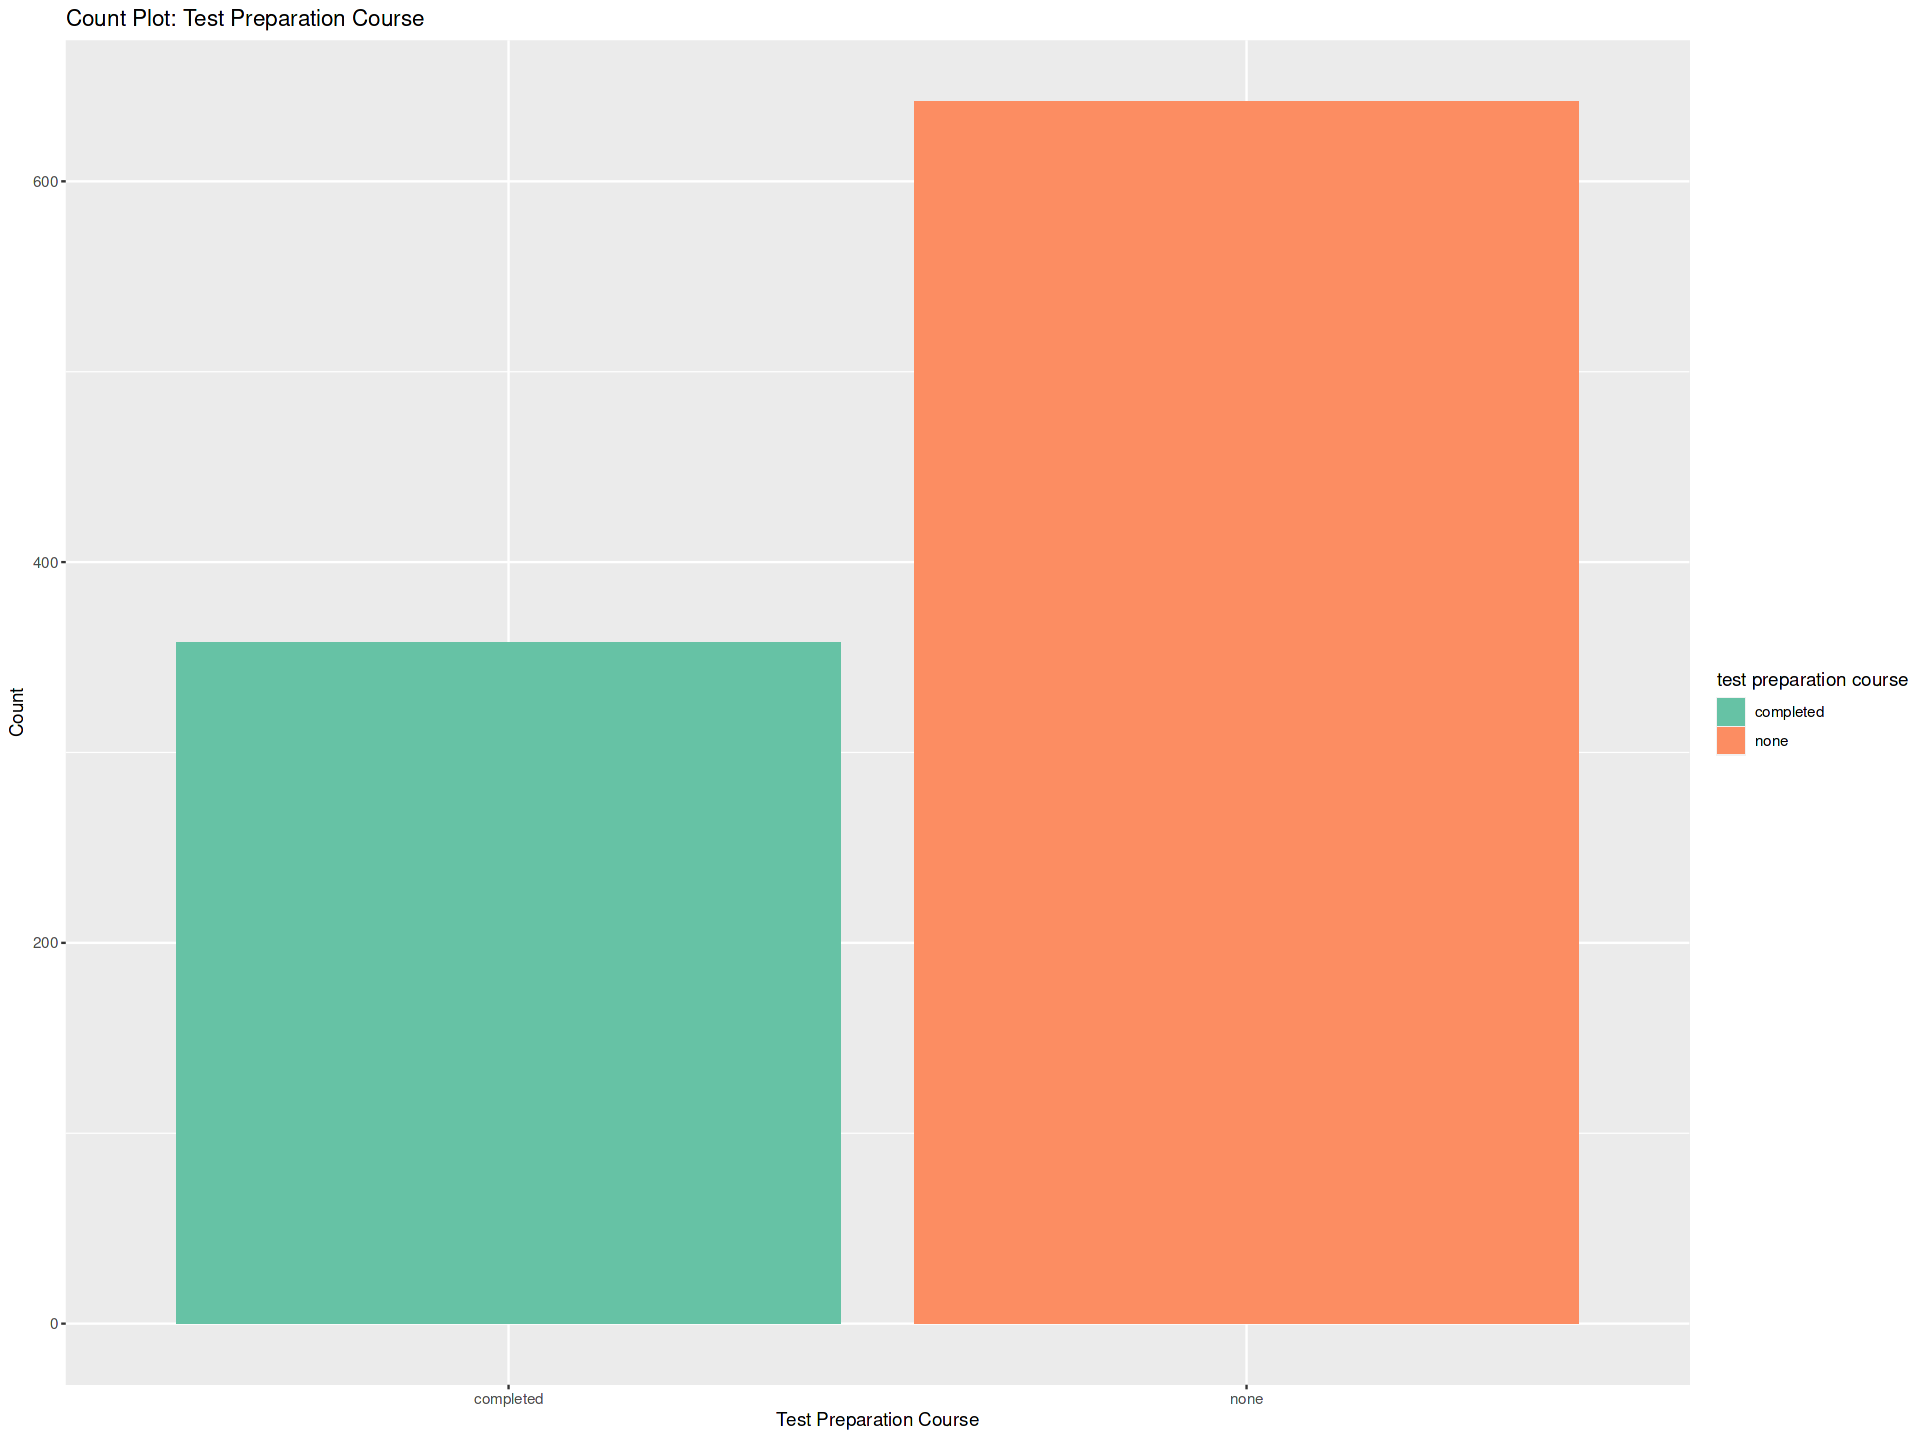

In [18]:
# Count plot for Test Preparation Course
ggplot(df, aes(x = `test preparation course`, fill = `test preparation course`)) +
  geom_bar() +
  xlab("Test Preparation Course") +
  ylab("Count") +
  ggtitle("Count Plot: Test Preparation Course") +
  scale_fill_brewer(palette = "Set2")

# Count of Test Preparation Course

The chart illustrates that the number of students who did not complete test preparation is nearly double the number of students who did.

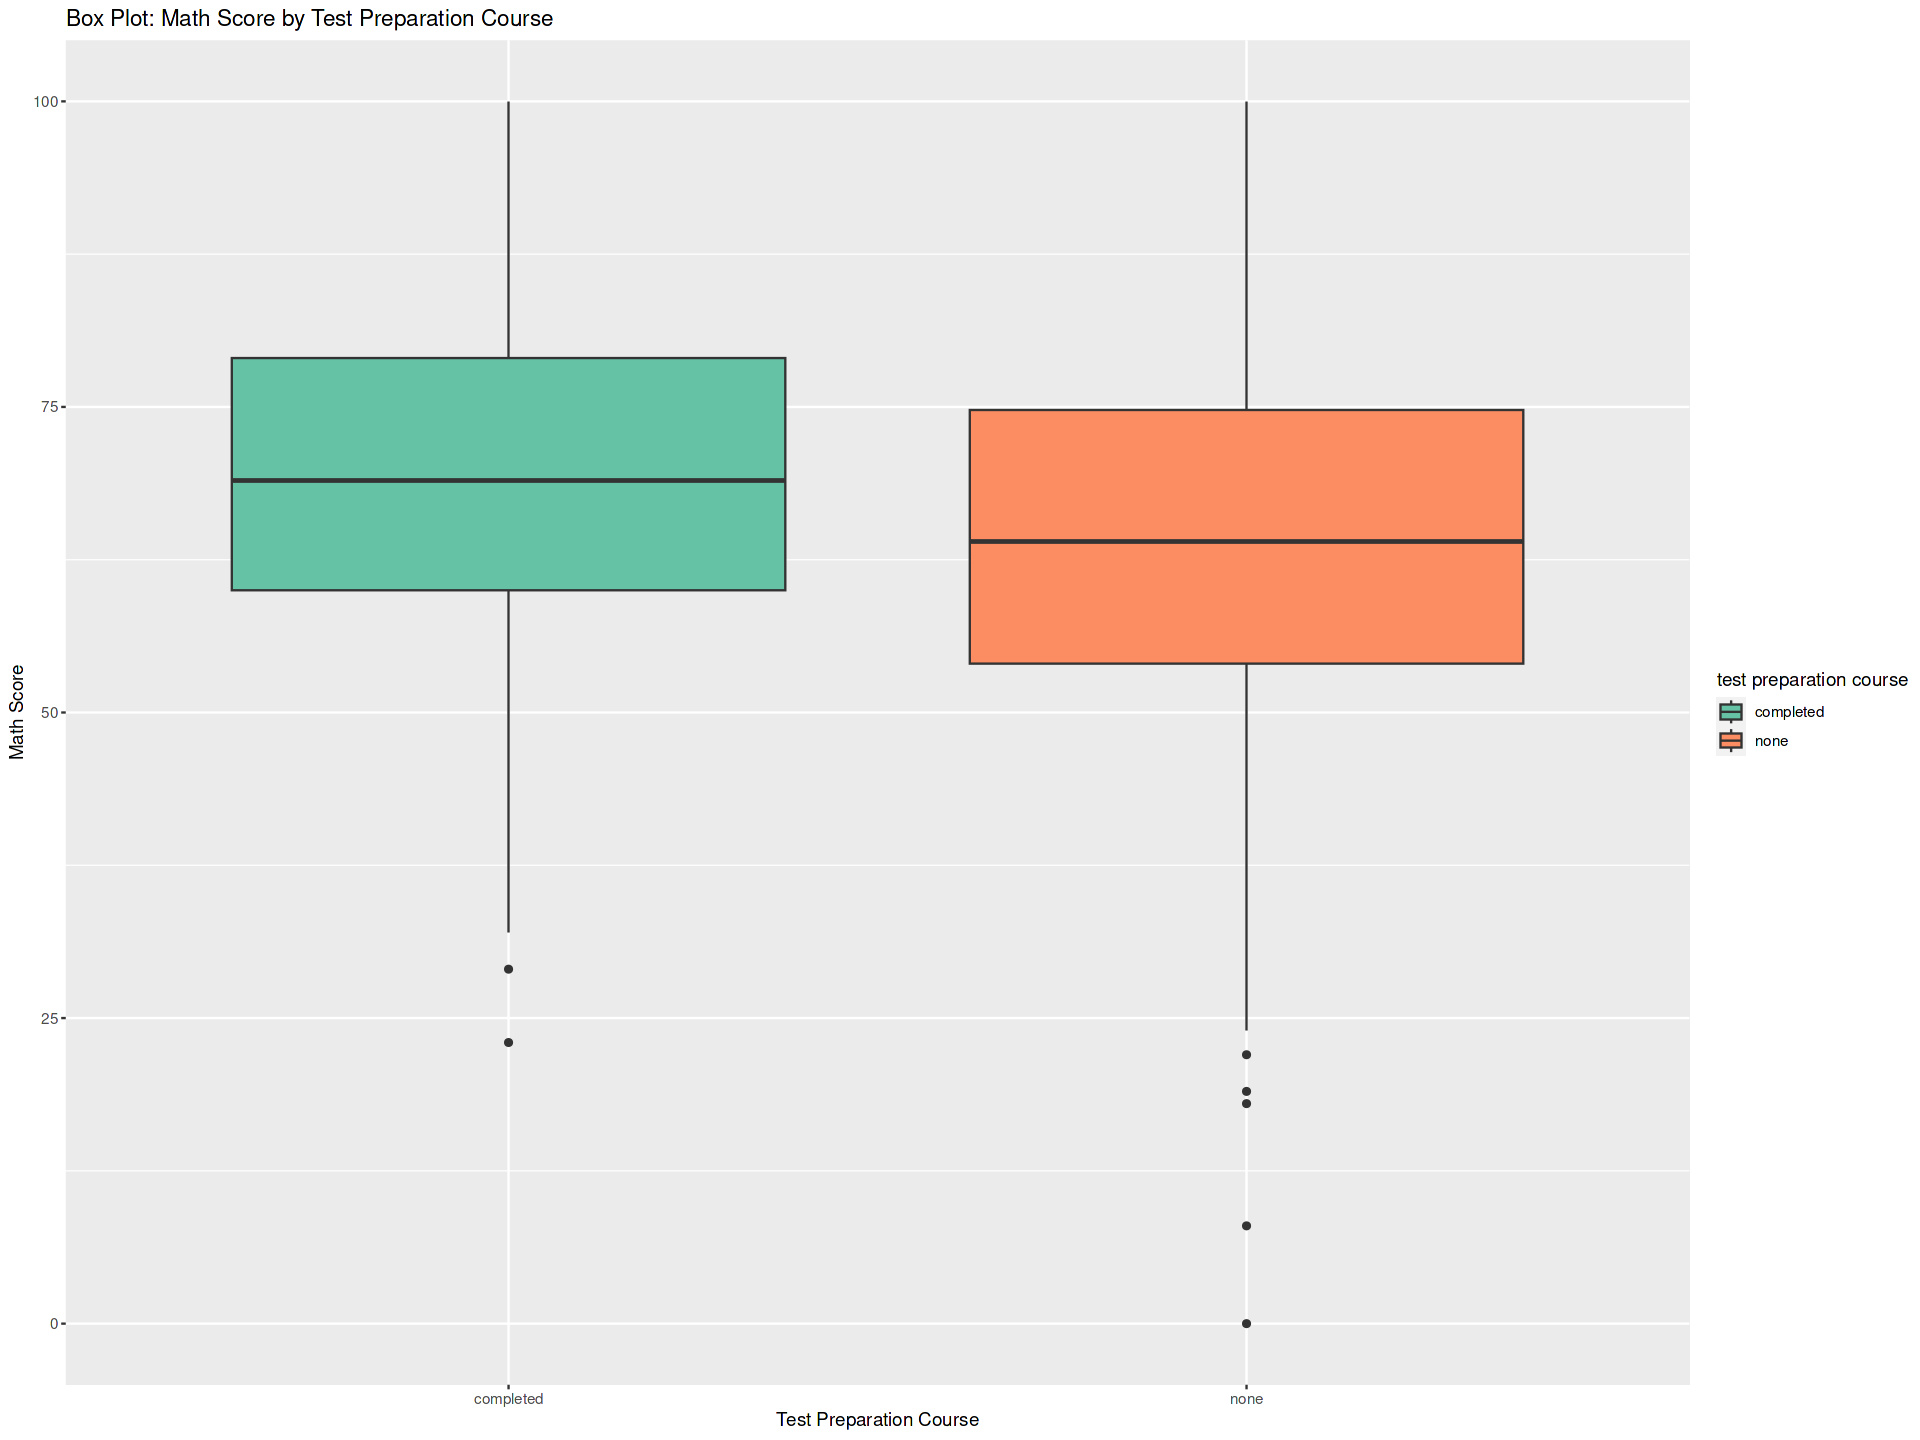

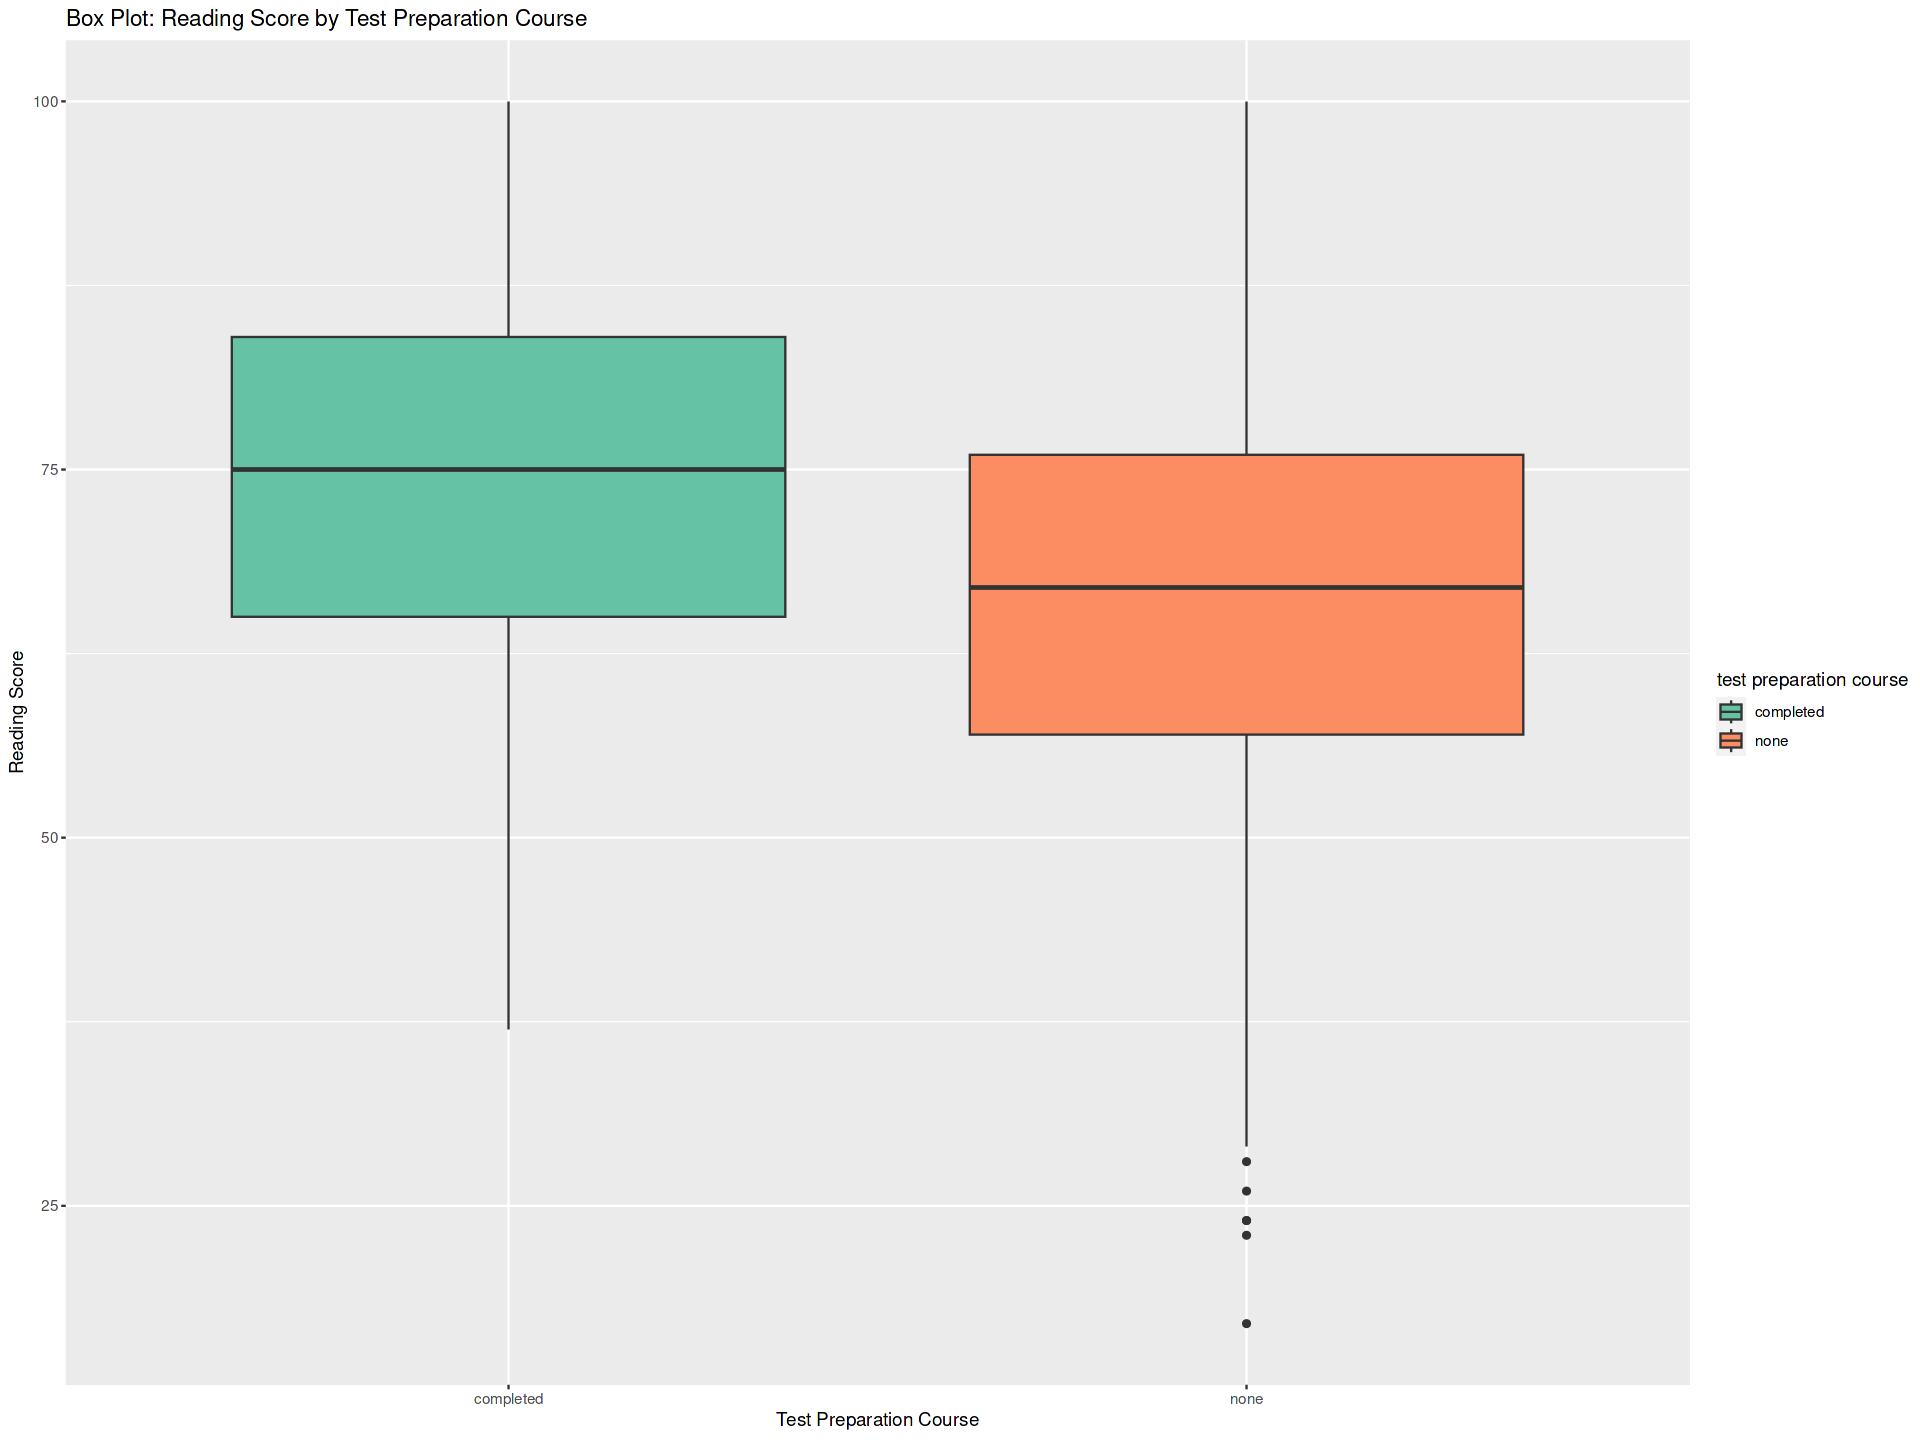

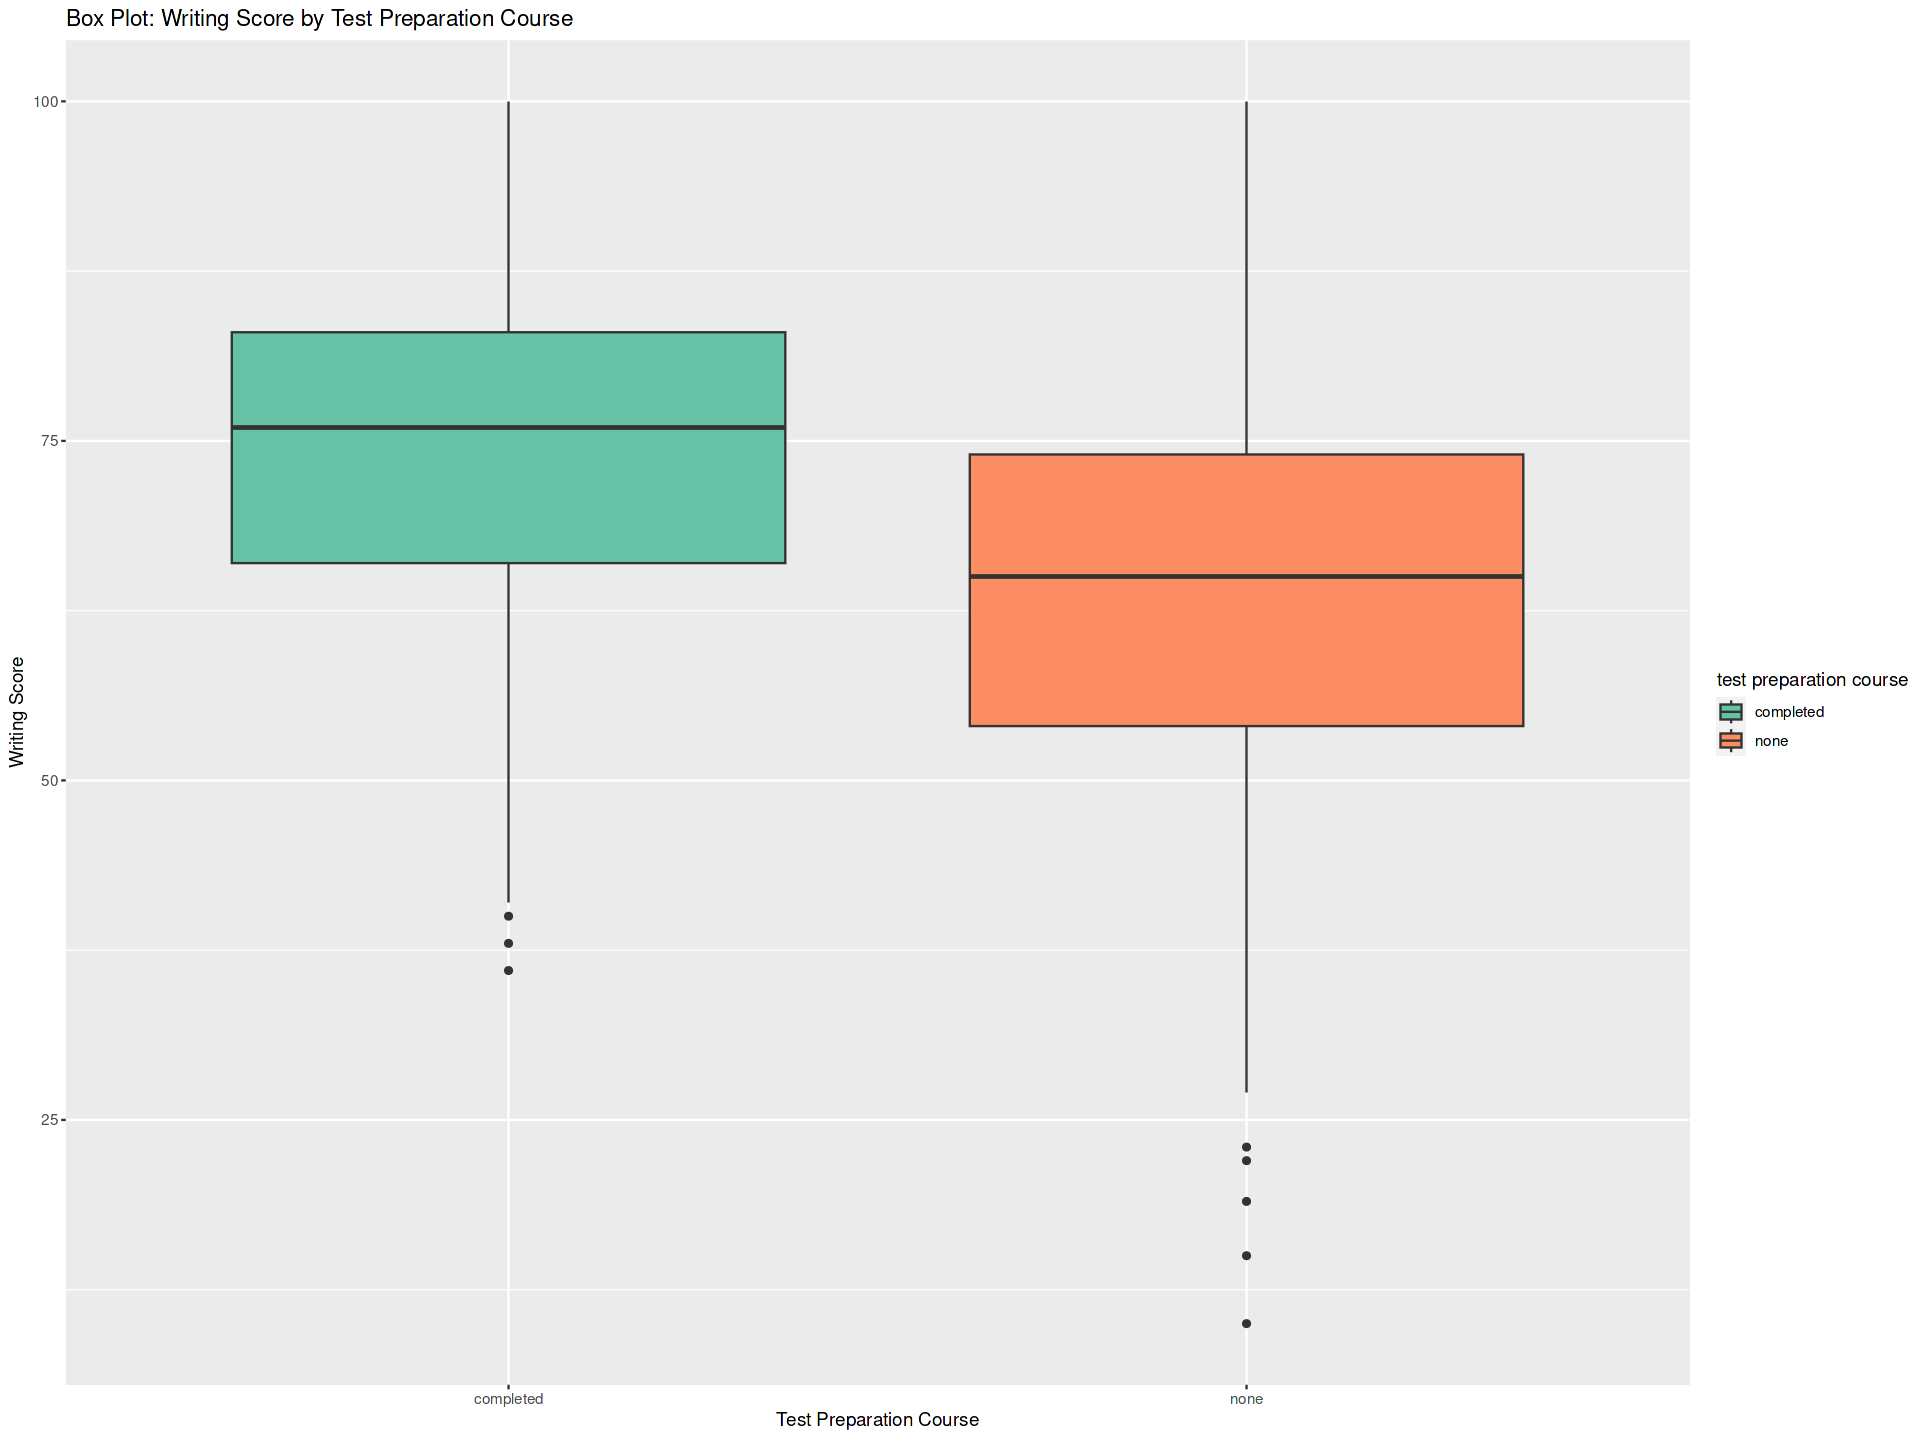

In [19]:
# Box plot for Math Score
ggplot(df, aes(x = `test preparation course`, y = `math score`, fill = `test preparation course`)) +
  geom_boxplot() +
  xlab("Test Preparation Course") +
  ylab("Math Score") +
  ggtitle("Box Plot: Math Score by Test Preparation Course") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Reading Score
ggplot(df, aes(x = `test preparation course`, y = `reading score`, fill = `test preparation course`)) +
  geom_boxplot() +
  xlab("Test Preparation Course") +
  ylab("Reading Score") +
  ggtitle("Box Plot: Reading Score by Test Preparation Course") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Writing Score
ggplot(df, aes(x = `test preparation course`, y = `writing score`, fill = `test preparation course`)) +
  geom_boxplot() +
  xlab("Test Preparation Course") +
  ylab("Writing Score") +
  ggtitle("Box Plot: Writing Score by Test Preparation Course") +
  scale_fill_brewer(palette = "Set2")

In [20]:
# Math Score Summary
math_summary <- df %>%
  group_by(`test preparation course`) %>%
  summarize(mean = mean(`math score`),
            median = median(`math score`),
            sd = sd(`math score`),
            min = min(`math score`),
            max = max(`math score`))

# Print Math Score Summary
print("Math Score Summary:")
print(math_summary)

# Reading Score Summary
reading_summary <- df %>%
  group_by(`test preparation course`) %>%
  summarize(mean = mean(`reading score`),
            median = median(`reading score`),
            sd = sd(`reading score`),
            min = min(`reading score`),
            max = max(`reading score`))

# Print Reading Score Summary
print("Reading Score Summary:")
print(reading_summary)

# Writing Score Summary
writing_summary <- df %>%
  group_by(`test preparation course`) %>%
  summarize(mean = mean(`writing score`),
            median = median(`writing score`),
            sd = sd(`writing score`),
            min = min(`writing score`),
            max = max(`writing score`))

# Print Writing Score Summary
print("Writing Score Summary:")
print(writing_summary)


[1] "Math Score Summary:"
# A tibble: 2 × 6
  `test preparation course`  mean median    sd   min   max
  <chr>                     <dbl>  <dbl> <dbl> <dbl> <dbl>
1 completed                  69.7     69  14.4    23   100
2 none                       64.1     64  15.2     0   100
[1] "Reading Score Summary:"
# A tibble: 2 × 6
  `test preparation course`  mean median    sd   min   max
  <chr>                     <dbl>  <dbl> <dbl> <dbl> <dbl>
1 completed                  73.9     75  13.6    37   100
2 none                       66.5     67  14.5    17   100
[1] "Writing Score Summary:"
# A tibble: 2 × 6
  `test preparation course`  mean median    sd   min   max
  <chr>                     <dbl>  <dbl> <dbl> <dbl> <dbl>
1 completed                  74.4     76  13.4    36   100
2 none                       64.5     65  15.0    10   100


# Box Plot by Score and Test Preparation Course

The charts display box plots representing the performance of students in three different tests: Math, Reading, and Writing. The box plots are grouped based on whether students completed a test preparation course or not.

Insights:

* Math Scores: The box plots for both groups (completed and not completed) in the Math test are positioned lower compared to the box plots for the other two tests. This suggests that the Math test might be relatively harder for students, regardless of test preparation completion. The wider spread of scores and the presence of negative outliers among students who did not complete the test preparation course further support the notion that Math is the most challenging test among the three.

* Reading Scores: The box plot for students who completed the test preparation course are positioned higher than the box plots for students who did not complete the course. This indicates that test preparation has a positive impact on the performance of students in these two subjects. Although there are outliers in both groups, the number of negative outliers is relatively smaller, suggesting that completing the test preparation course may contribute to more consistent and improved performance.


* Writing Scores: The box plot for students who completed the test preparation course are positioned higher than the box plots for students who did not complete the course. This indicates that test preparation has a positive impact on the performance of students in these two subjects. Although there are outliers in both groups, the number of negative outliers is relatively smaller, suggesting that completing the test preparation course may contribute to more consistent and improved performance.

* Statistical Data: Similar to the reading test, students who completed the test preparation course have higher mean and median scores, indicating the positive impact of test preparation on writing performance.The box plots reveal that the completed group has a higher position and a narrower spread of scores compared to the none group, suggesting that completing the test preparation course contributes to more consistent and improved performance in writing.

Overall, the box plots reveal that completing the test preparation course is associated with better performance across all three tests. The Math test appears to be the most challenging section, with lower scores observed in both groups. However, completing the test preparation course can mitigate the challenges and lead to improved performance in the Reading and Writing tests. The presence of negative outliers among students who did not complete the course highlights the potential benefits of test preparation in achieving more consistent and higher scores.








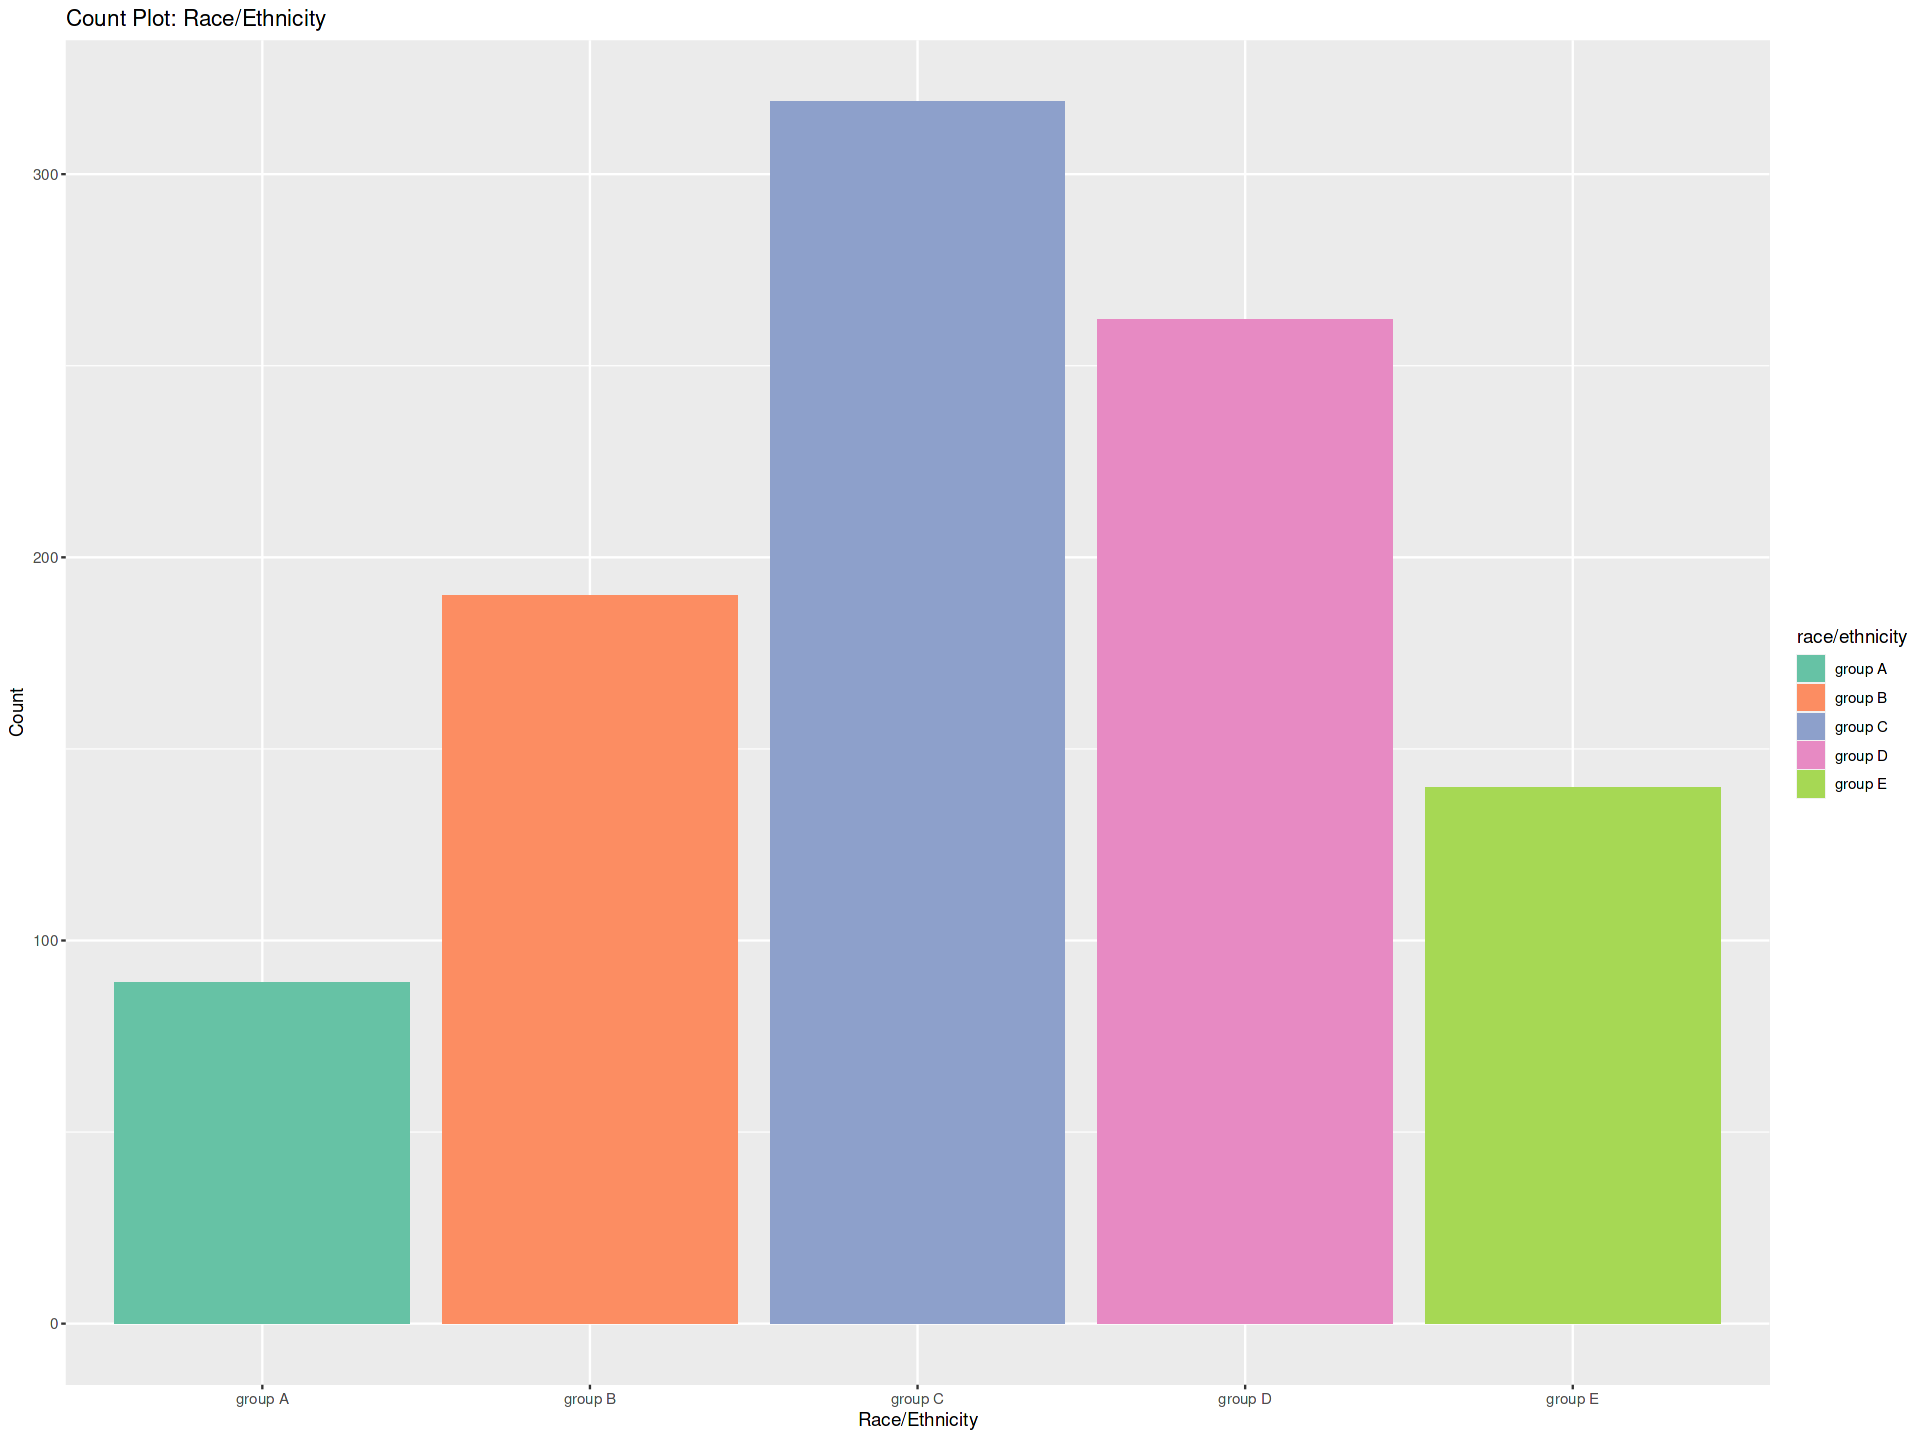

In [21]:
# Count plot for Race/Ethnicity
ggplot(df, aes(x = `race/ethnicity`, fill = `race/ethnicity`)) +
  geom_bar() +
  xlab("Race/Ethnicity") +
  ylab("Count") +
  ggtitle("Count Plot: Race/Ethnicity") +
  scale_fill_brewer(palette = "Set2")

# Count of Race/Ethnicity

The chart illustrates that the number of students who fall into each Race/Ethnicity Category. 

From highest to lowest:
* Group C
* Group D
* Group B
* Group E
* Group A


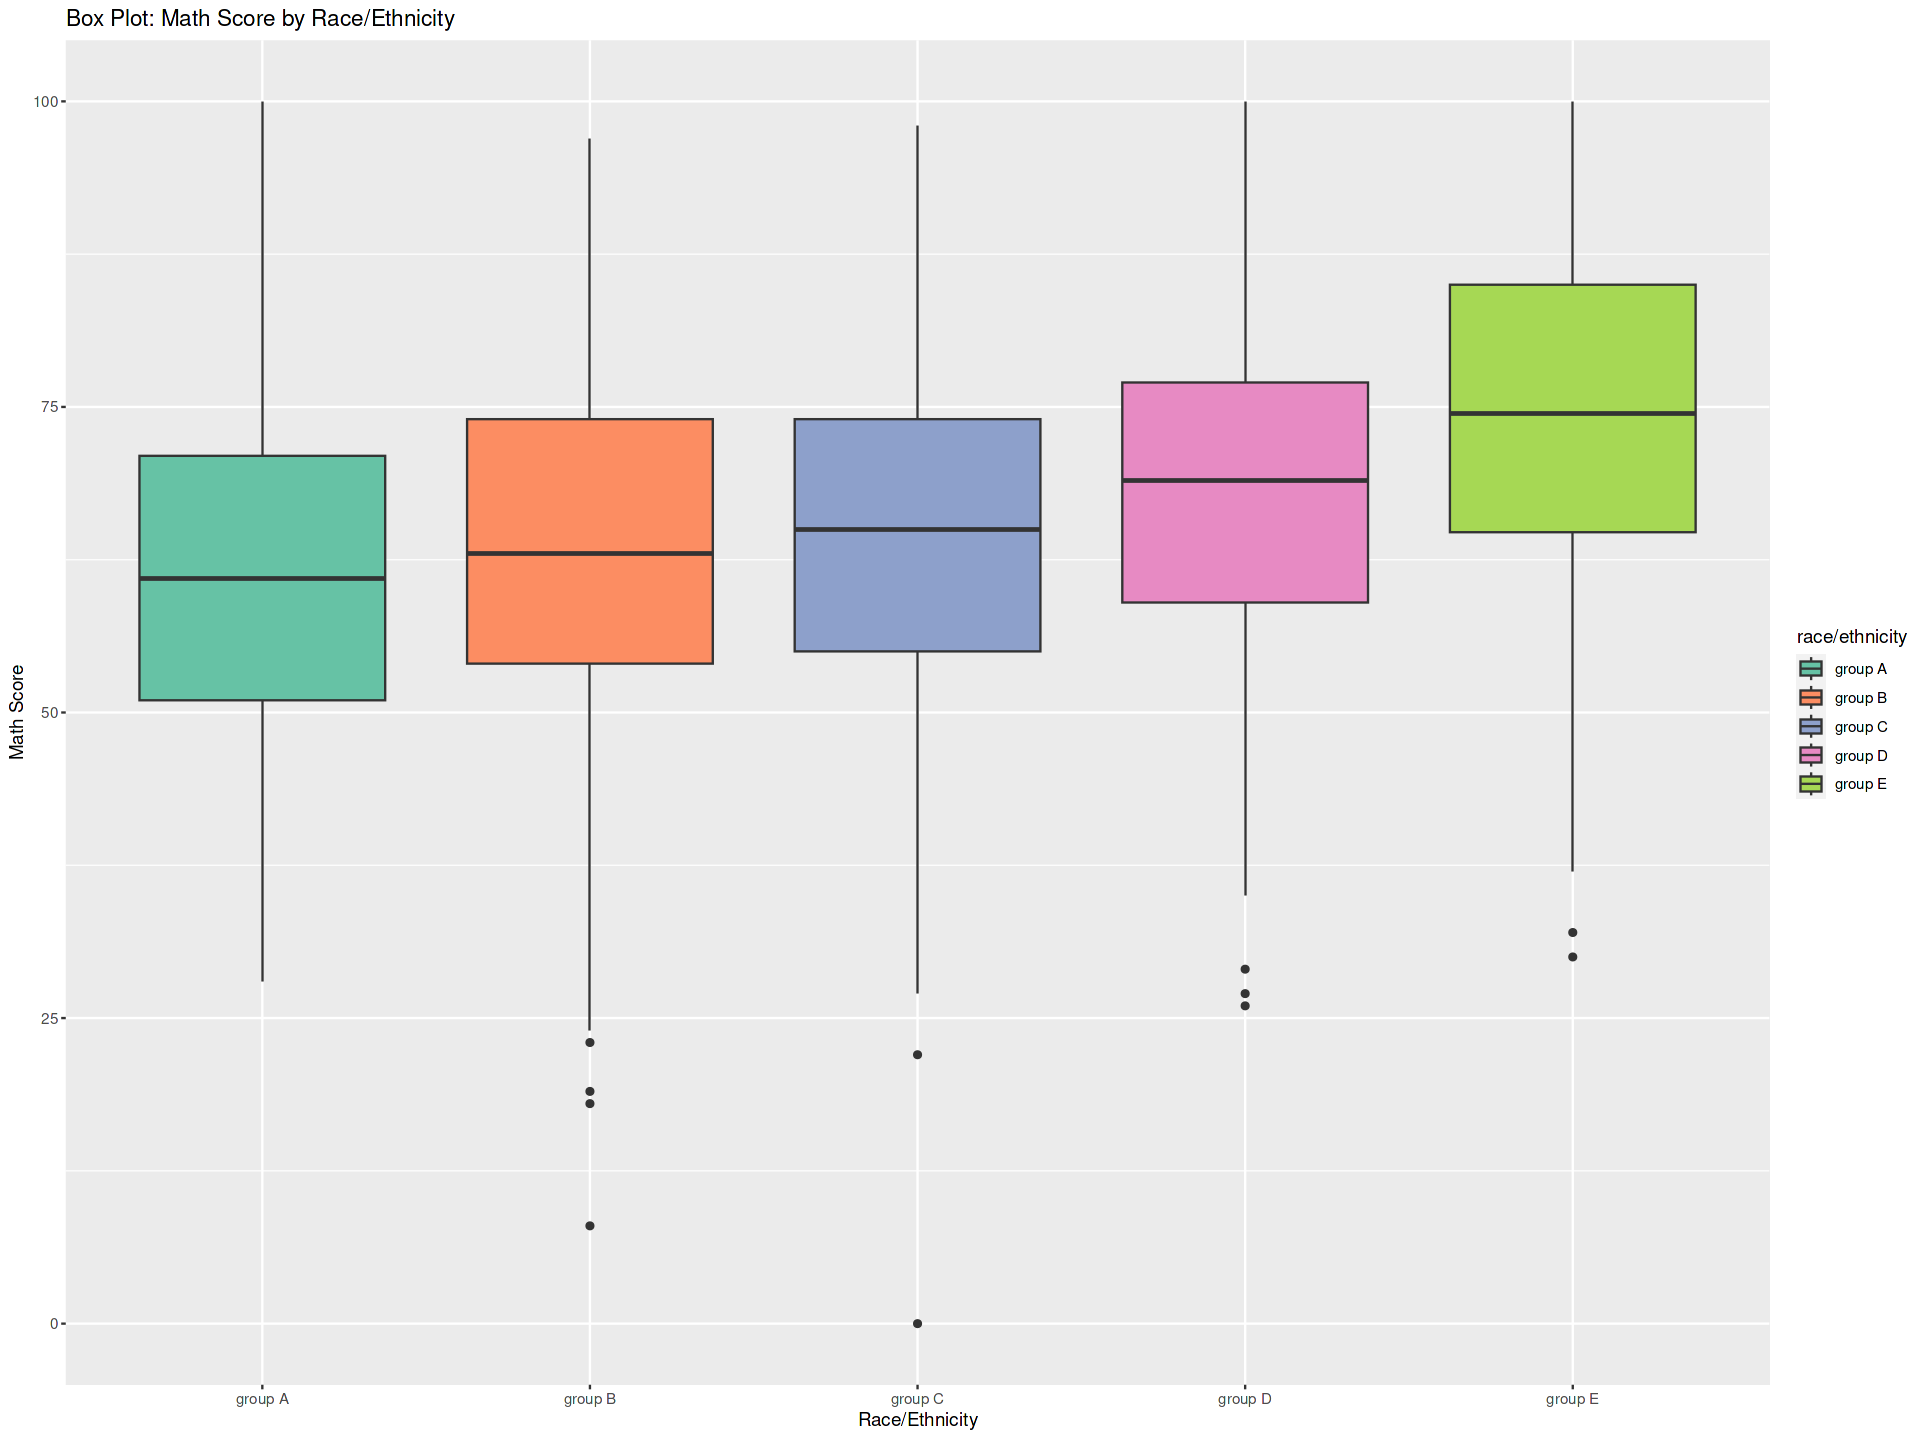

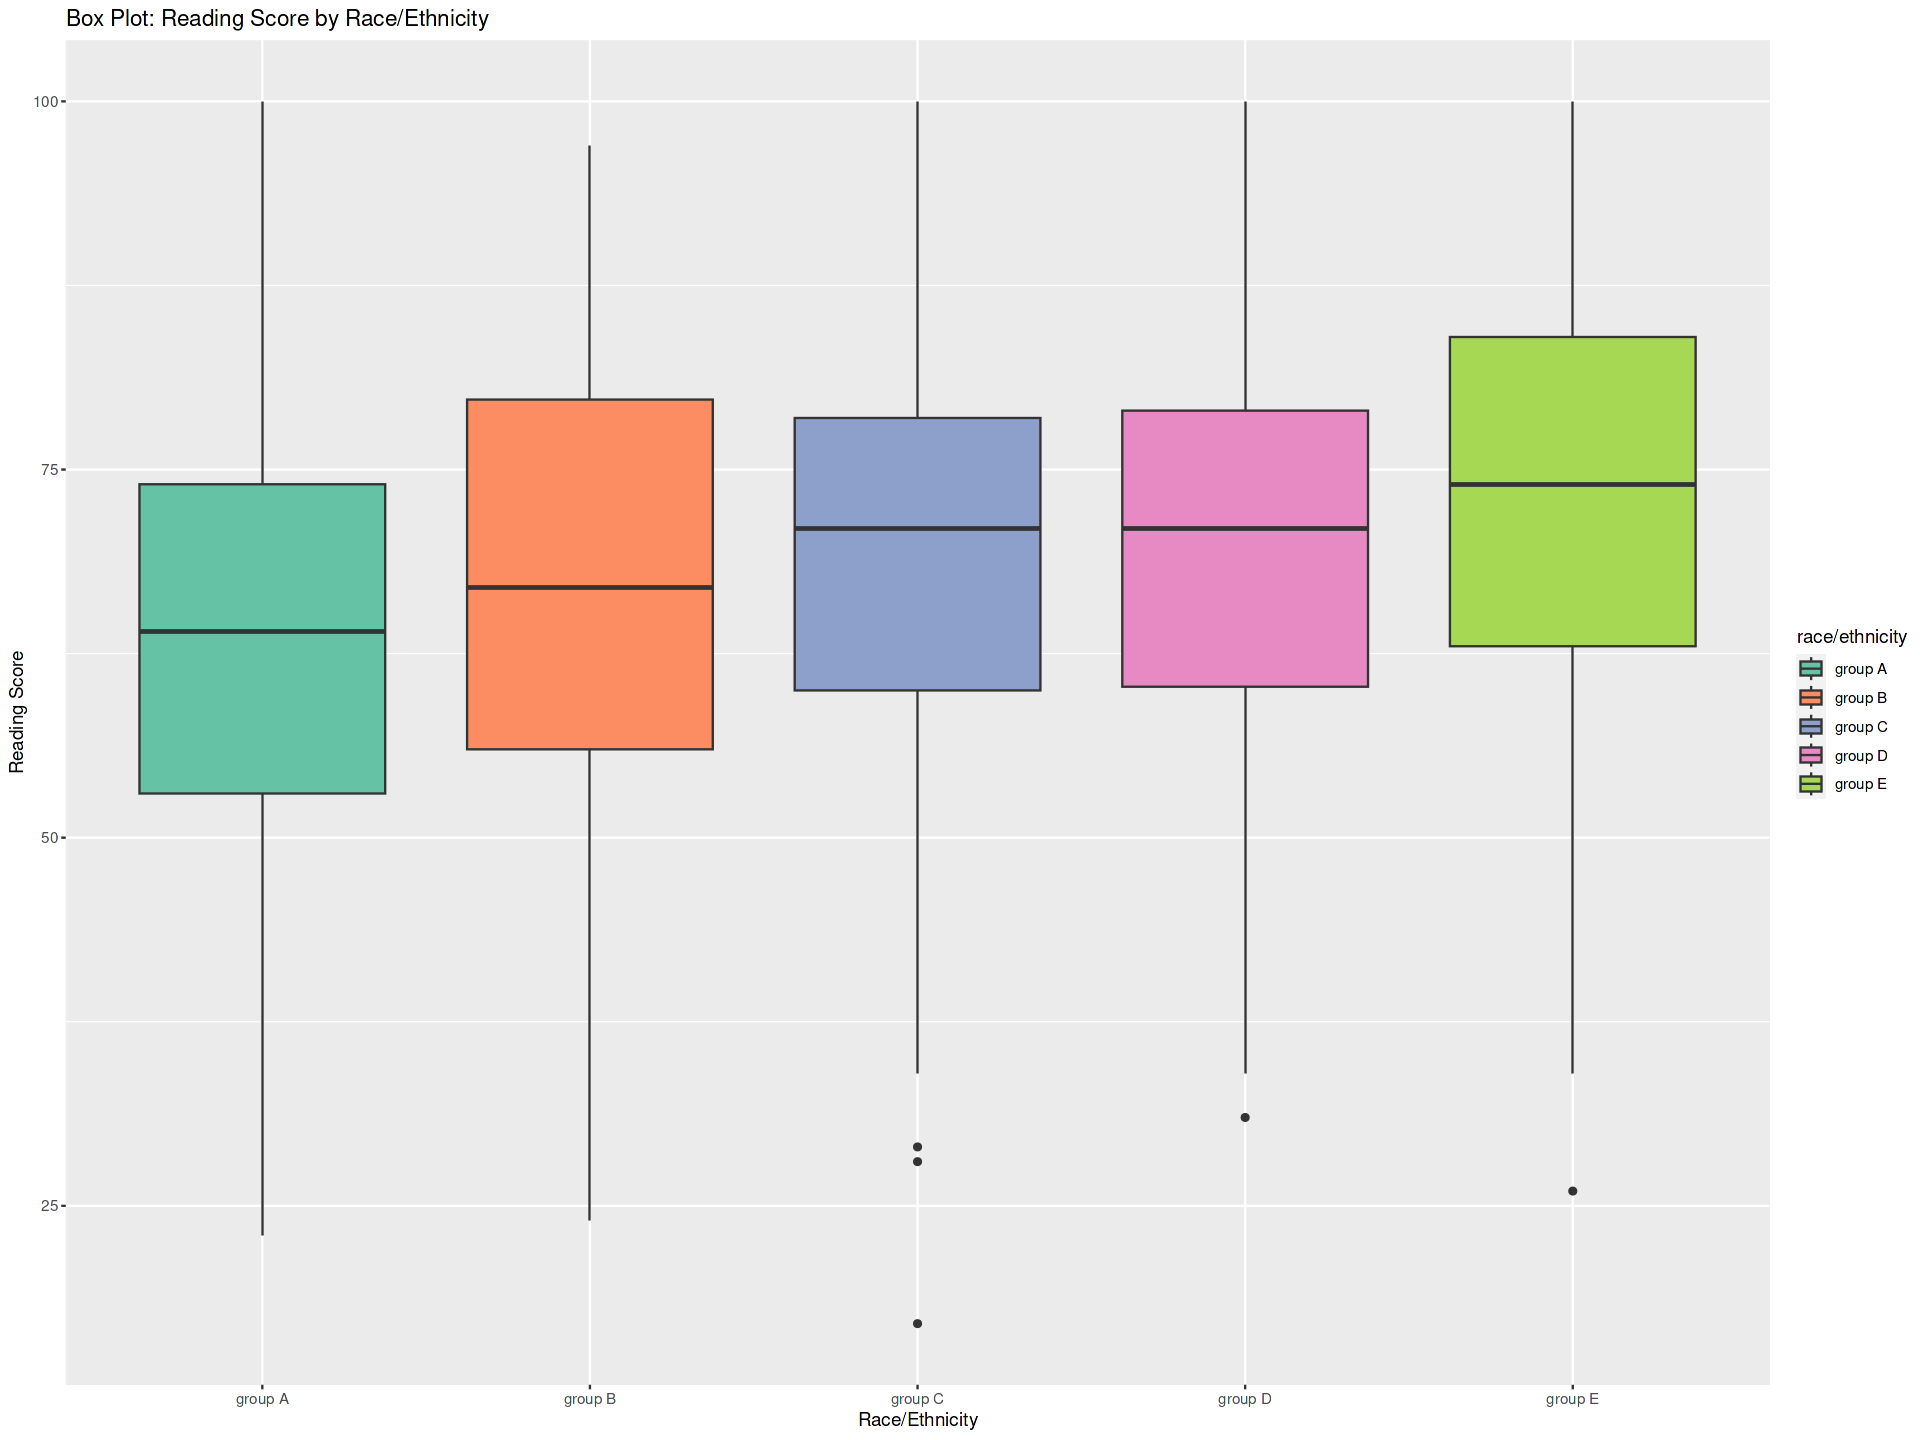

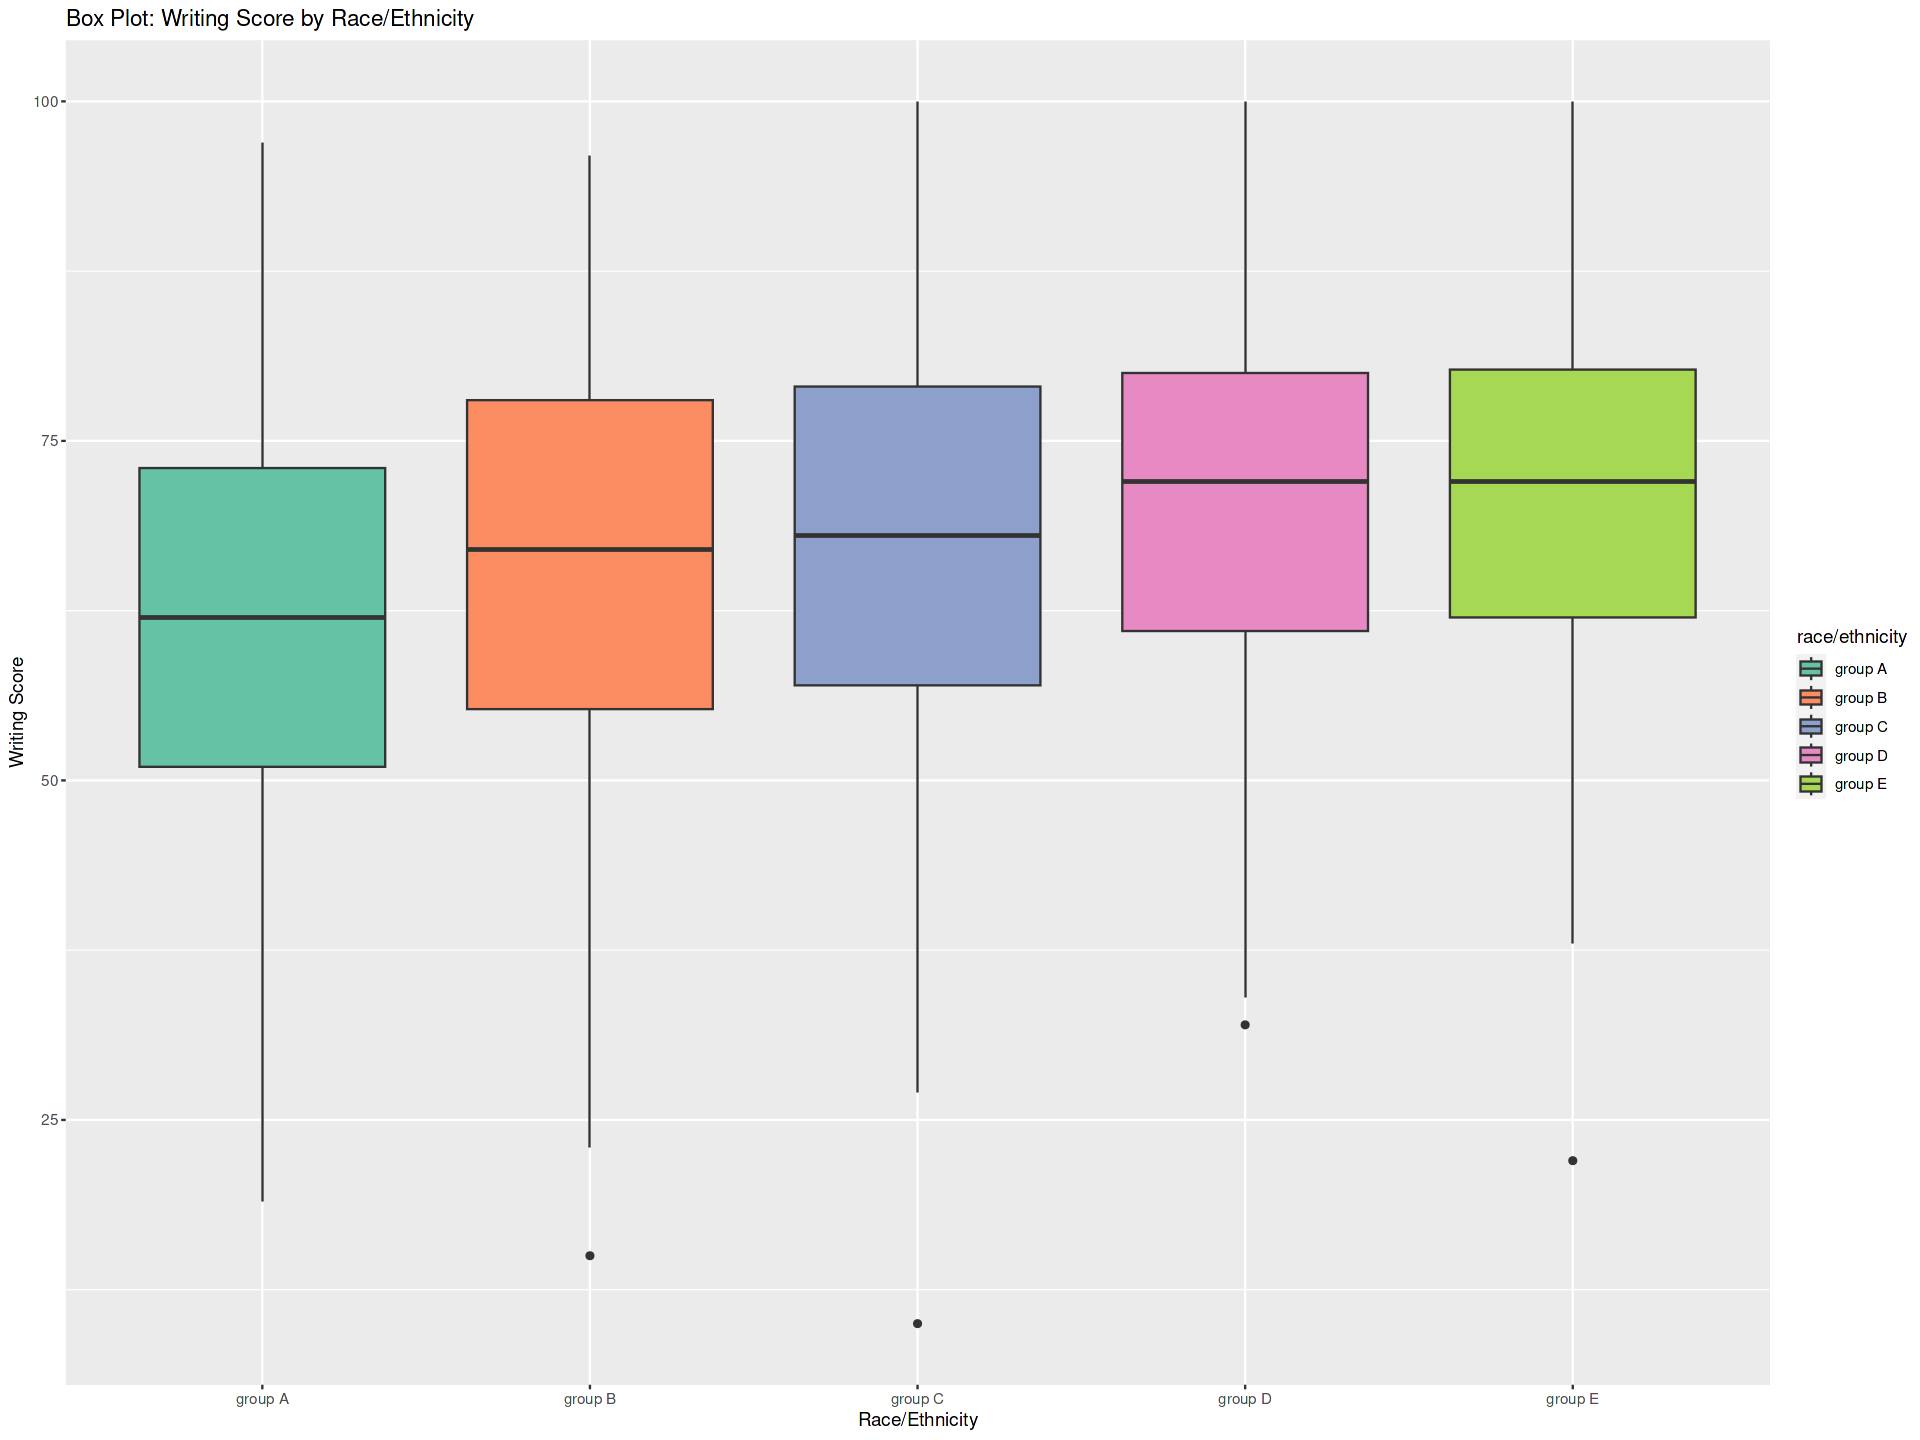

In [22]:
# Box plot for Math Score by Race/Ethnicity
ggplot(df, aes(x = `race/ethnicity`, y = `math score`, fill = `race/ethnicity`)) +
  geom_boxplot() +
  xlab("Race/Ethnicity") +
  ylab("Math Score") +
  ggtitle("Box Plot: Math Score by Race/Ethnicity") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Reading Score by Race/Ethnicity
ggplot(df, aes(x = `race/ethnicity`, y = `reading score`, fill = `race/ethnicity`)) +
  geom_boxplot() +
  xlab("Race/Ethnicity") +
  ylab("Reading Score") +
  ggtitle("Box Plot: Reading Score by Race/Ethnicity") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Writing Score by Race/Ethnicity
ggplot(df, aes(x = `race/ethnicity`, y = `writing score`, fill = `race/ethnicity`)) +
  geom_boxplot() +
  xlab("Race/Ethnicity") +
  ylab("Writing Score") +
  ggtitle("Box Plot: Writing Score by Race/Ethnicity") +
  scale_fill_brewer(palette = "Set2")

In [23]:
# Math Score Summary by Race/Ethnicity
math_summary_race <- df %>%
  group_by(`race/ethnicity`) %>%
  summarize(mean = mean(`math score`),
            median = median(`math score`),
            sd = sd(`math score`),
            min = min(`math score`),
            max = max(`math score`))

# Print Math Score Summary by Race/Ethnicity
print("Math Score Summary by Race/Ethnicity:")
print(math_summary_race)

# Reading Score Summary by Race/Ethnicity
reading_summary_race <- df %>%
  group_by(`race/ethnicity`) %>%
  summarize(mean = mean(`reading score`),
            median = median(`reading score`),
            sd = sd(`reading score`),
            min = min(`reading score`),
            max = max(`reading score`))

# Print Reading Score Summary by Race/Ethnicity
print("Reading Score Summary by Race/Ethnicity:")
print(reading_summary_race)

# Writing Score Summary by Race/Ethnicity
writing_summary_race <- df %>%
  group_by(`race/ethnicity`) %>%
  summarize(mean = mean(`writing score`),
            median = median(`writing score`),
            sd = sd(`writing score`),
            min = min(`writing score`),
            max = max(`writing score`))

# Print Writing Score Summary by Race/Ethnicity
print("Writing Score Summary by Race/Ethnicity:")
print(writing_summary_race)

[1] "Math Score Summary by Race/Ethnicity:"
# A tibble: 5 × 6
  `race/ethnicity`  mean median    sd   min   max
  <chr>            <dbl>  <dbl> <dbl> <dbl> <dbl>
1 group A           61.6   61    14.5    28   100
2 group B           63.5   63    15.5     8    97
3 group C           64.5   65    14.9     0    98
4 group D           67.4   69    13.8    26   100
5 group E           73.8   74.5  15.5    30   100
[1] "Reading Score Summary by Race/Ethnicity:"
# A tibble: 5 × 6
  `race/ethnicity`  mean median    sd   min   max
  <chr>            <dbl>  <dbl> <dbl> <dbl> <dbl>
1 group A           64.7     64  15.5    23   100
2 group B           67.4     67  15.2    24    97
3 group C           69.1     71  14.0    17   100
4 group D           70.0     71  13.9    31   100
5 group E           73.0     74  14.9    26   100
[1] "Writing Score Summary by Race/Ethnicity:"
# A tibble: 5 × 6
  `race/ethnicity`  mean median    sd   min   max
  <chr>            <dbl>  <dbl> <dbl> <dbl> <dbl>
1 group 

# Box Plot by Test and Race/Ethnicity

Math Score:

* Group E has the highest median and mean math scores, indicating better overall performance in this subject compared to other groups.
* Group A and Group B have lower median and mean scores compared to Group E, suggesting relatively lower math performance.
* Group C has the widest spread of scores, indicating greater variability within the group. This is further supported by the presence of larger outliers in this group, suggesting a wider range of math performance outcomes.

Reading Score:

* Group E has the highest median and mean reading scores, indicating better overall performance in this subject compared to other groups.
* Group C and Group A have lower median and mean scores compared to Group E, suggesting relatively lower reading performance.
* Group B and Group D have median and mean scores that fall between Group E and the lower-performing groups.

Writing Score:

* Group E has the highest median and mean writing scores, indicating better overall performance in this subject compared to other groups.
* Group A and Group B have lower median and mean scores compared to Group E, suggesting relatively lower writing performance.
* Group C and Group D have median and mean scores that fall between Group E and the lower-performing groups.

Overall, Group E consistently demonstrates the highest scores across all three subjects, indicating a higher level of academic achievement. Group C shows wider variations in scores and has the largest outliers, suggesting a greater diversity of performance outcomes. Group A and Group B consistently have lower scores compared to Group E, indicating potential areas for improvement.



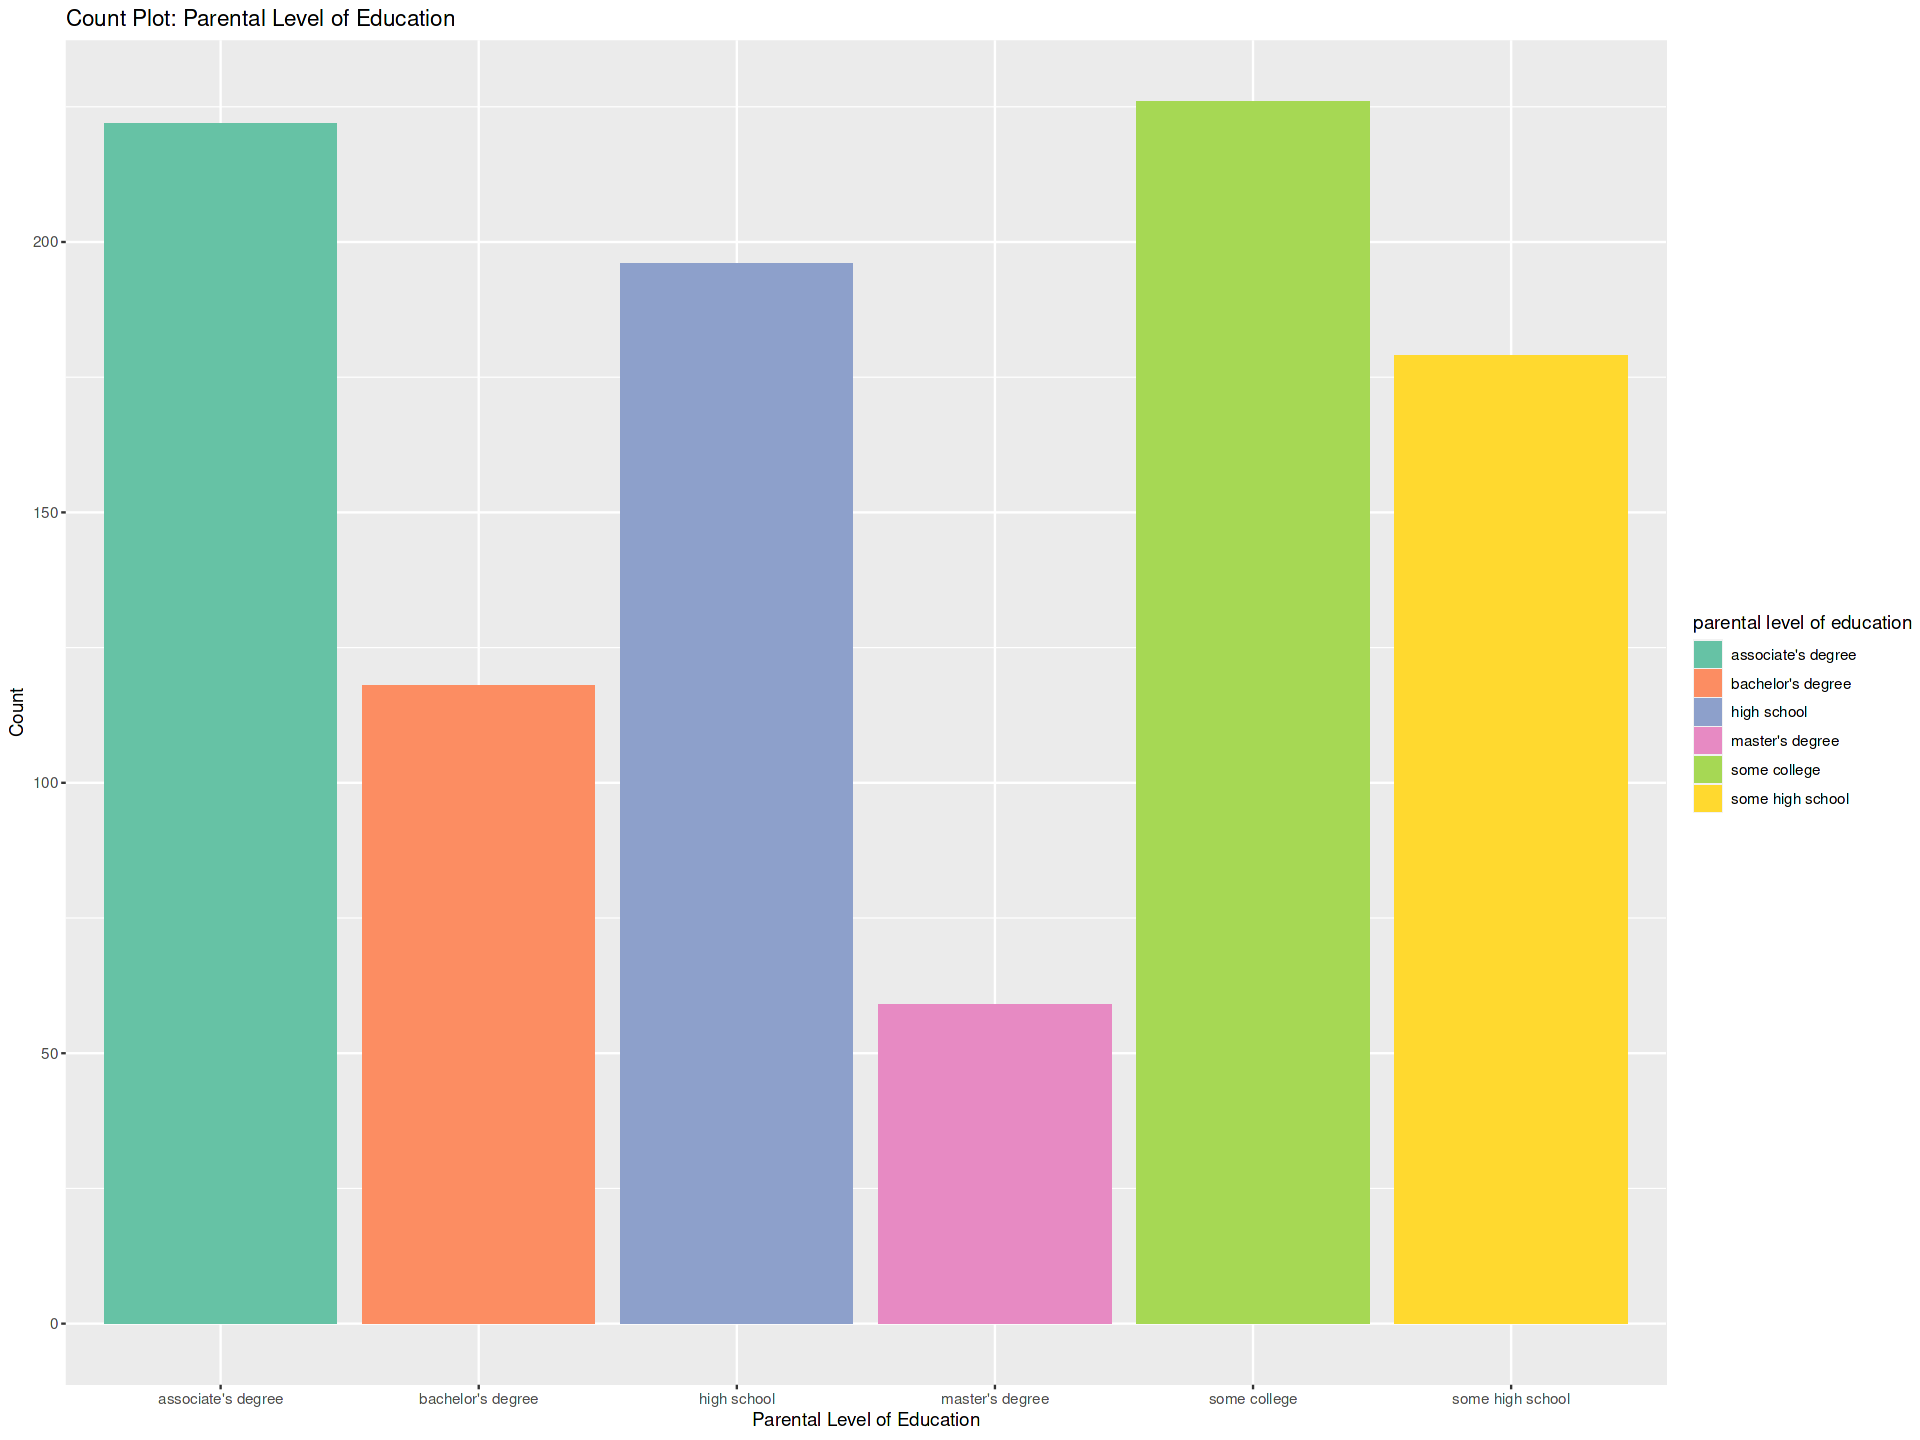

In [24]:
# Count plot for Parental Level of Education
ggplot(df, aes(x = `parental level of education`, fill = `parental level of education`)) +
  geom_bar() +
  xlab("Parental Level of Education") +
  ylab("Count") +
  ggtitle("Count Plot: Parental Level of Education") +
  scale_fill_brewer(palette = "Set2")

# Count of Parental Level of Education

The chart illustrates that the number of students who parents falls into each level of education. 

From highest to lowest:
* Some College
* Associate's Degree
* High School
* Some High School
* Bachelor's Degree
* Master's Degree

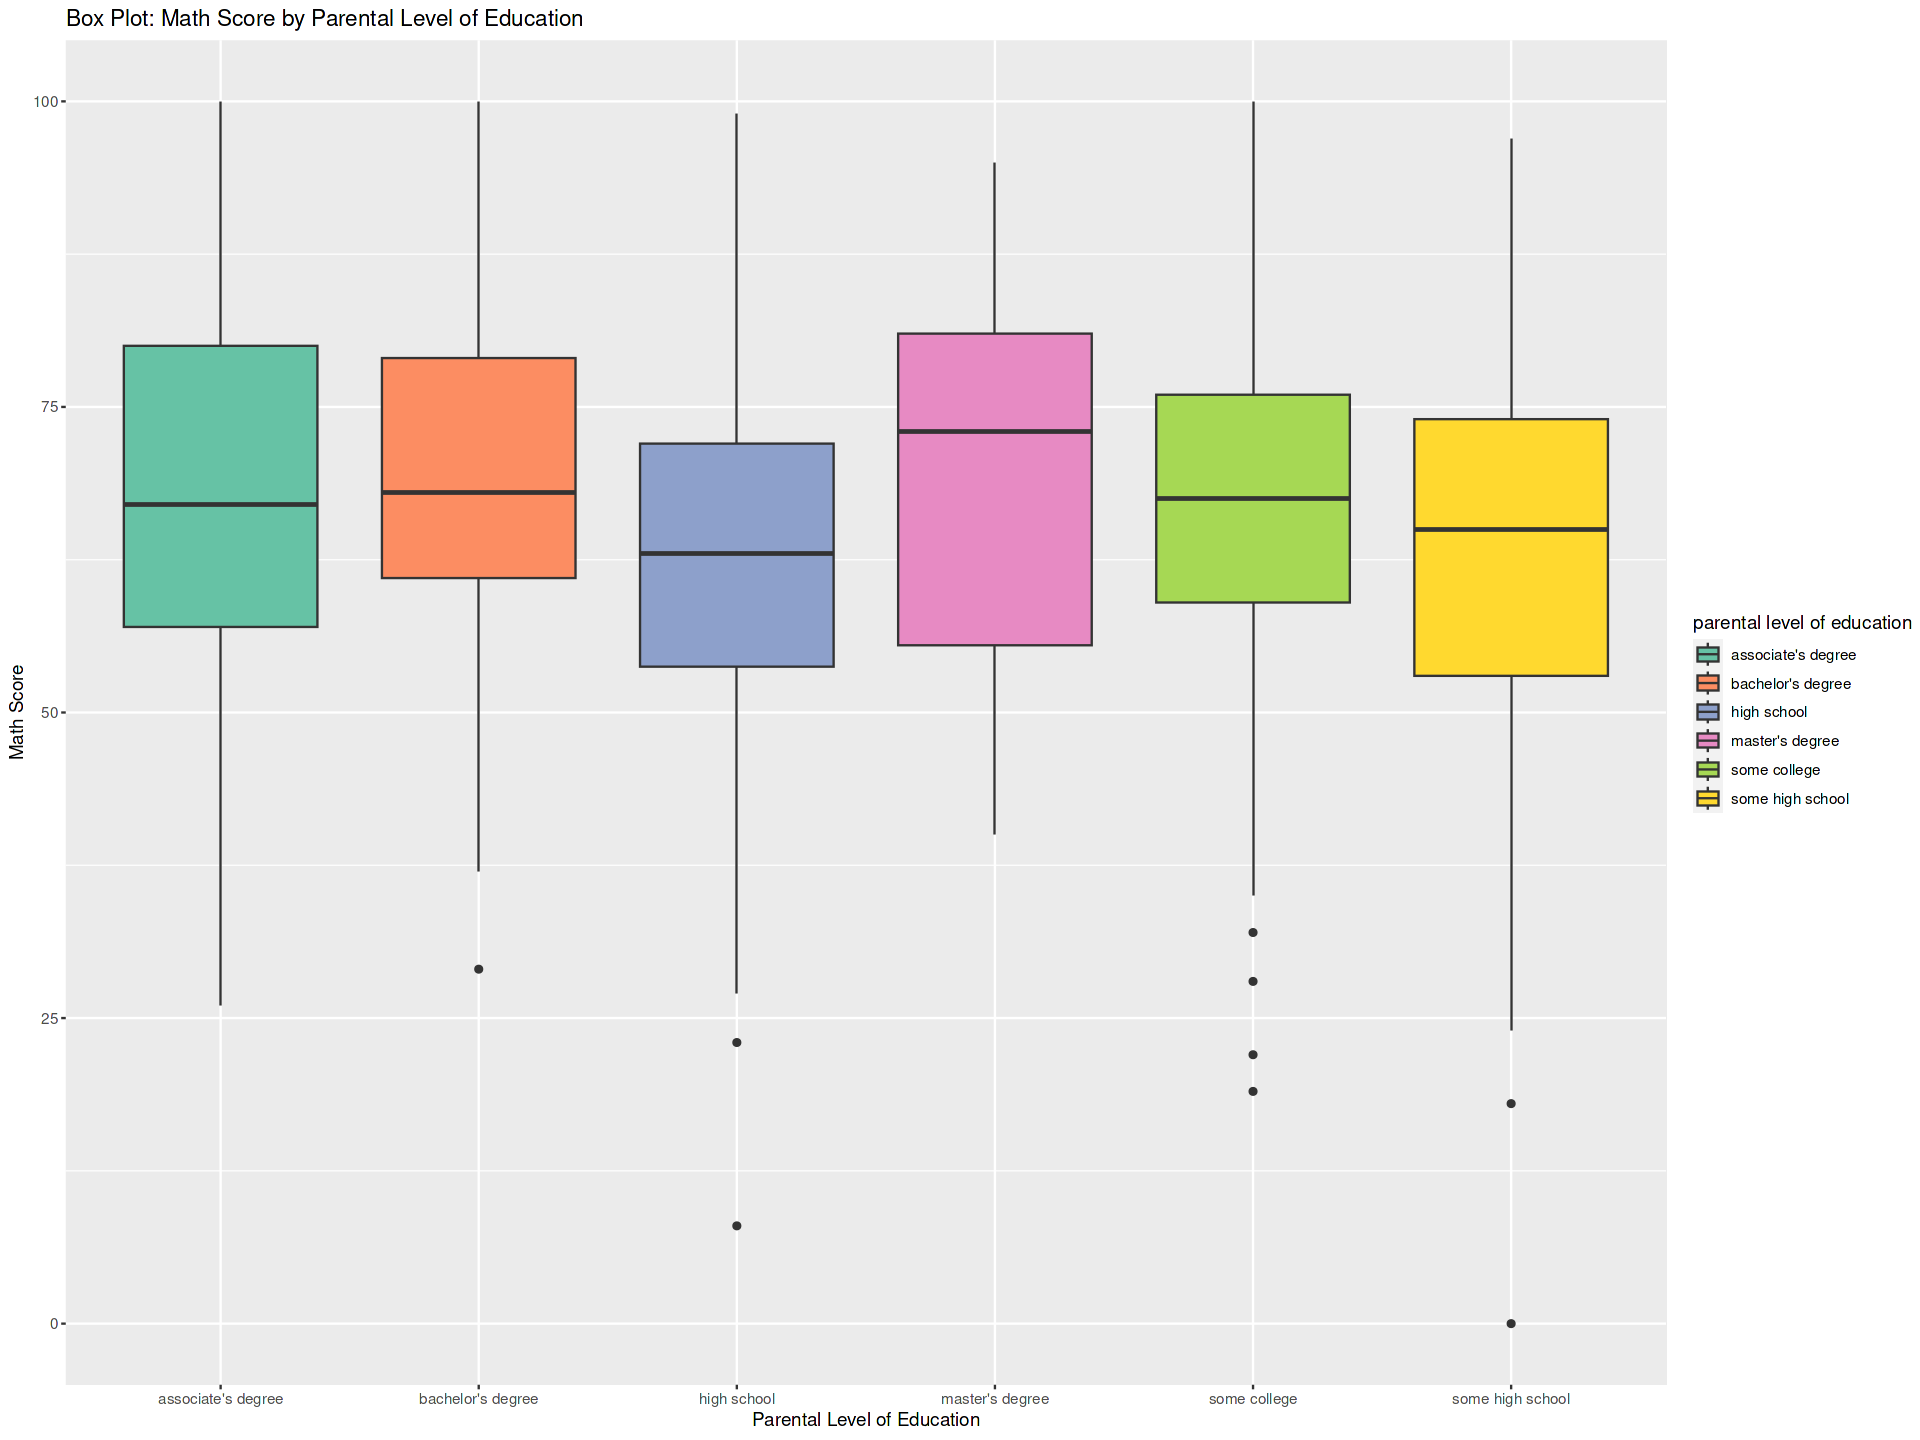

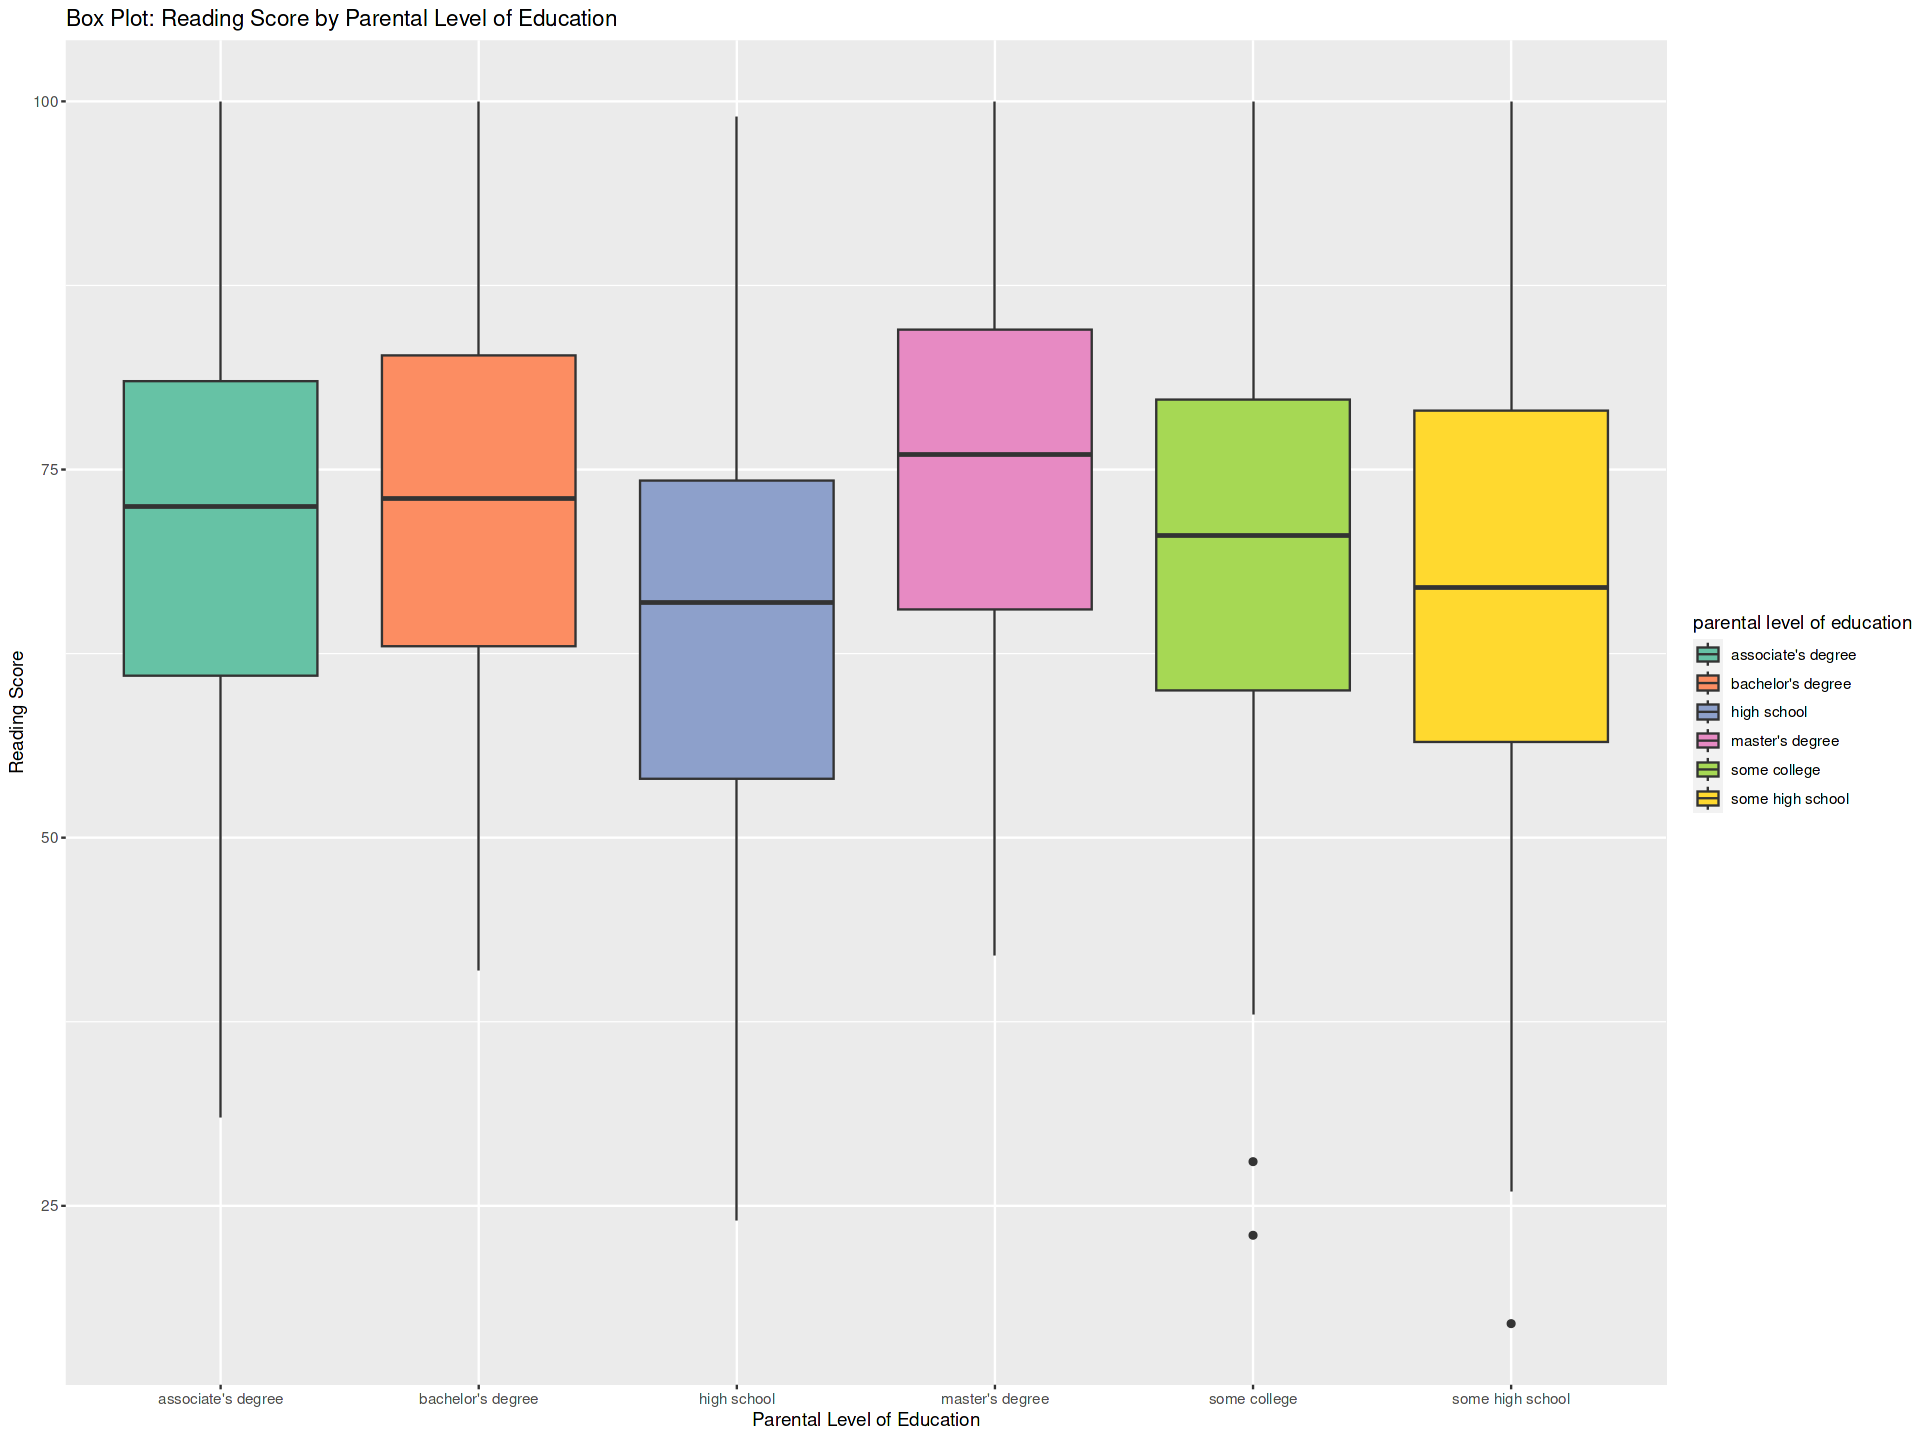

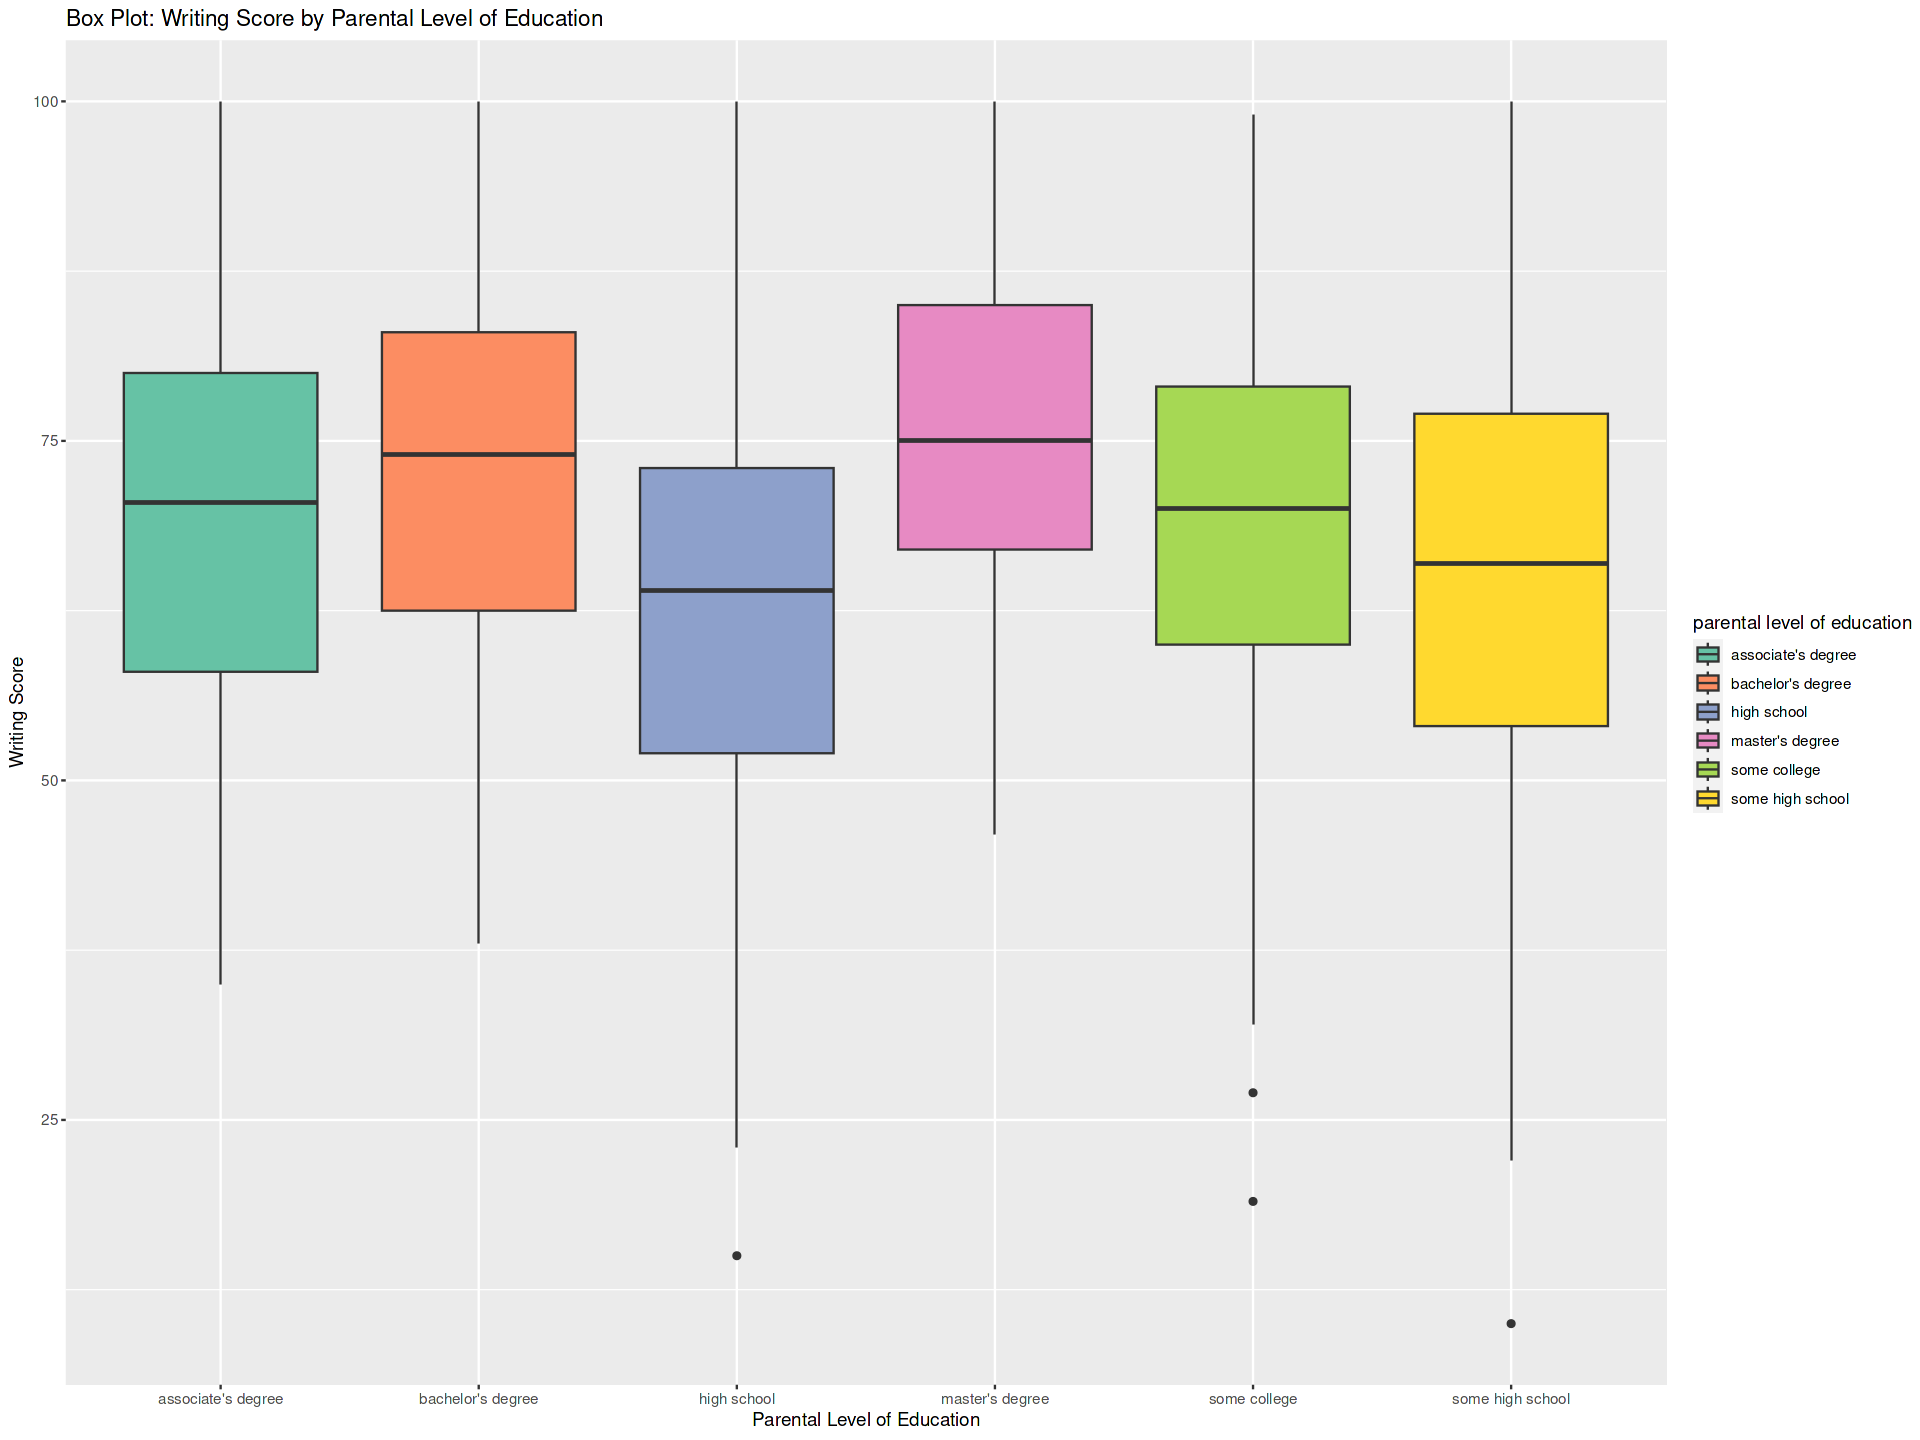

In [25]:
# Box plot for Math Score by Parental Level of Education
ggplot(df, aes(x = `parental level of education`, y = `math score`, fill = `parental level of education`)) +
  geom_boxplot() +
  xlab("Parental Level of Education") +
  ylab("Math Score") +
  ggtitle("Box Plot: Math Score by Parental Level of Education") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Reading Score by Parental Level of Education
ggplot(df, aes(x = `parental level of education`, y = `reading score`, fill = `parental level of education`)) +
  geom_boxplot() +
  xlab("Parental Level of Education") +
  ylab("Reading Score") +
  ggtitle("Box Plot: Reading Score by Parental Level of Education") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Writing Score by Parental Level of Education
ggplot(df, aes(x = `parental level of education`, y = `writing score`, fill = `parental level of education`)) +
  geom_boxplot() +
  xlab("Parental Level of Education") +
  ylab("Writing Score") +
  ggtitle("Box Plot: Writing Score by Parental Level of Education") +
  scale_fill_brewer(palette = "Set2")

In [26]:
# Math Score Summary by Parental Level of Education
math_summary_parental <- df %>%
  group_by(`parental level of education`) %>%
  summarize(mean = mean(`math score`),
            median = median(`math score`),
            sd = sd(`math score`),
            min = min(`math score`),
            max = max(`math score`))

# Print Math Score Summary by Parental Level of Education
print("Math Score Summary by Parental Level of Education:")
print(math_summary_parental)

# Reading Score Summary by Parental Level of Education
reading_summary_parental <- df %>%
  group_by(`parental level of education`) %>%
  summarize(mean = mean(`reading score`),
            median = median(`reading score`),
            sd = sd(`reading score`),
            min = min(`reading score`),
            max = max(`reading score`))

# Print Reading Score Summary by Parental Level of Education
print("Reading Score Summary by Parental Level of Education:")
print(reading_summary_parental)

# Writing Score Summary by Parental Level of Education
writing_summary_parental <- df %>%
  group_by(`parental level of education`) %>%
  summarize(mean = mean(`writing score`),
            median = median(`writing score`),
            sd = sd(`writing score`),
            min = min(`writing score`),
            max = max(`writing score`))

# Print Writing Score Summary by Parental Level of Education
print("Writing Score Summary by Parental Level of Education:")
print(writing_summary_parental)

[1] "Math Score Summary by Parental Level of Education:"
# A tibble: 6 × 6
  `parental level of education`  mean median    sd   min   max
  <chr>                         <dbl>  <dbl> <dbl> <dbl> <dbl>
1 associate's degree             67.9   67    15.1    26   100
2 bachelor's degree              69.4   68    14.9    29   100
3 high school                    62.1   63    14.5     8    99
4 master's degree                69.7   73    15.2    40    95
5 some college                   67.1   67.5  14.3    19   100
6 some high school               63.5   65    15.9     0    97
[1] "Reading Score Summary by Parental Level of Education:"
# A tibble: 6 × 6
  `parental level of education`  mean median    sd   min   max
  <chr>                         <dbl>  <dbl> <dbl> <dbl> <dbl>
1 associate's degree             70.9   72.5  13.9    31   100
2 bachelor's degree              73     73    14.3    41   100
3 high school                    64.7   66    14.1    24    99
4 master's degree           

# Box Plot by Test and Parental Level of Education

The box plots present the distribution of test scores based on the parental level of education. The charts are divided into three subjects: Math, Reading, and Writing.

Insights:

Math Scores:

* The box plots indicate that students with parents who hold a master's degree exhibit the highest median and overall performance in the Math test.
* There is a gradual decline in median scores from the highest (master's degree) to the lowest (high school) education level.
* The interquartile range (IQR) remains relatively consistent among the education levels, indicating similar spread of scores within each group. However, some college has the most outliers, suggesting greater variability in scores for students within this group.

Reading Scores:

* Similar to the Math test, students with parents who have a master's degree achieve the highest median and overall performance in the Reading test.
* There is a gradual decline in median scores from master's degree to high school education level. 
* The IQR remains consistent across the education levels. Notably, the box plots for bachelor's degree and associate's degree show slightly higher median scores compared to some college, indicating a potential difference in performance among these groups.

Writing Scores:

* Once again, students with parents who possess a master's degree attain the highest median and overall performance in the Writing test.
* The pattern observed in the Writing test follows a similar trend as Math and Reading, with higher education levels generally associated with higher median scores.
* The IQR remains relatively consistent among the education levels. Master's degree exhibits the highest median score, while high school has the lowest. Similar to the other subjects, some college has the most outliers, indicating greater variability in scores within this group.

Overall, the data reveals a consistent trend across all three subjects. Students with parents who hold a master's degree tend to achieve the highest scores, while students with parents who have a lower level of education, such as high school or some high school, exhibit lower scores on average. This pattern suggests a positive correlation between parental education level and student performance in these tests. However, it is essential to note that there is variability in scores within each education level, as indicated by the presence of outliers.

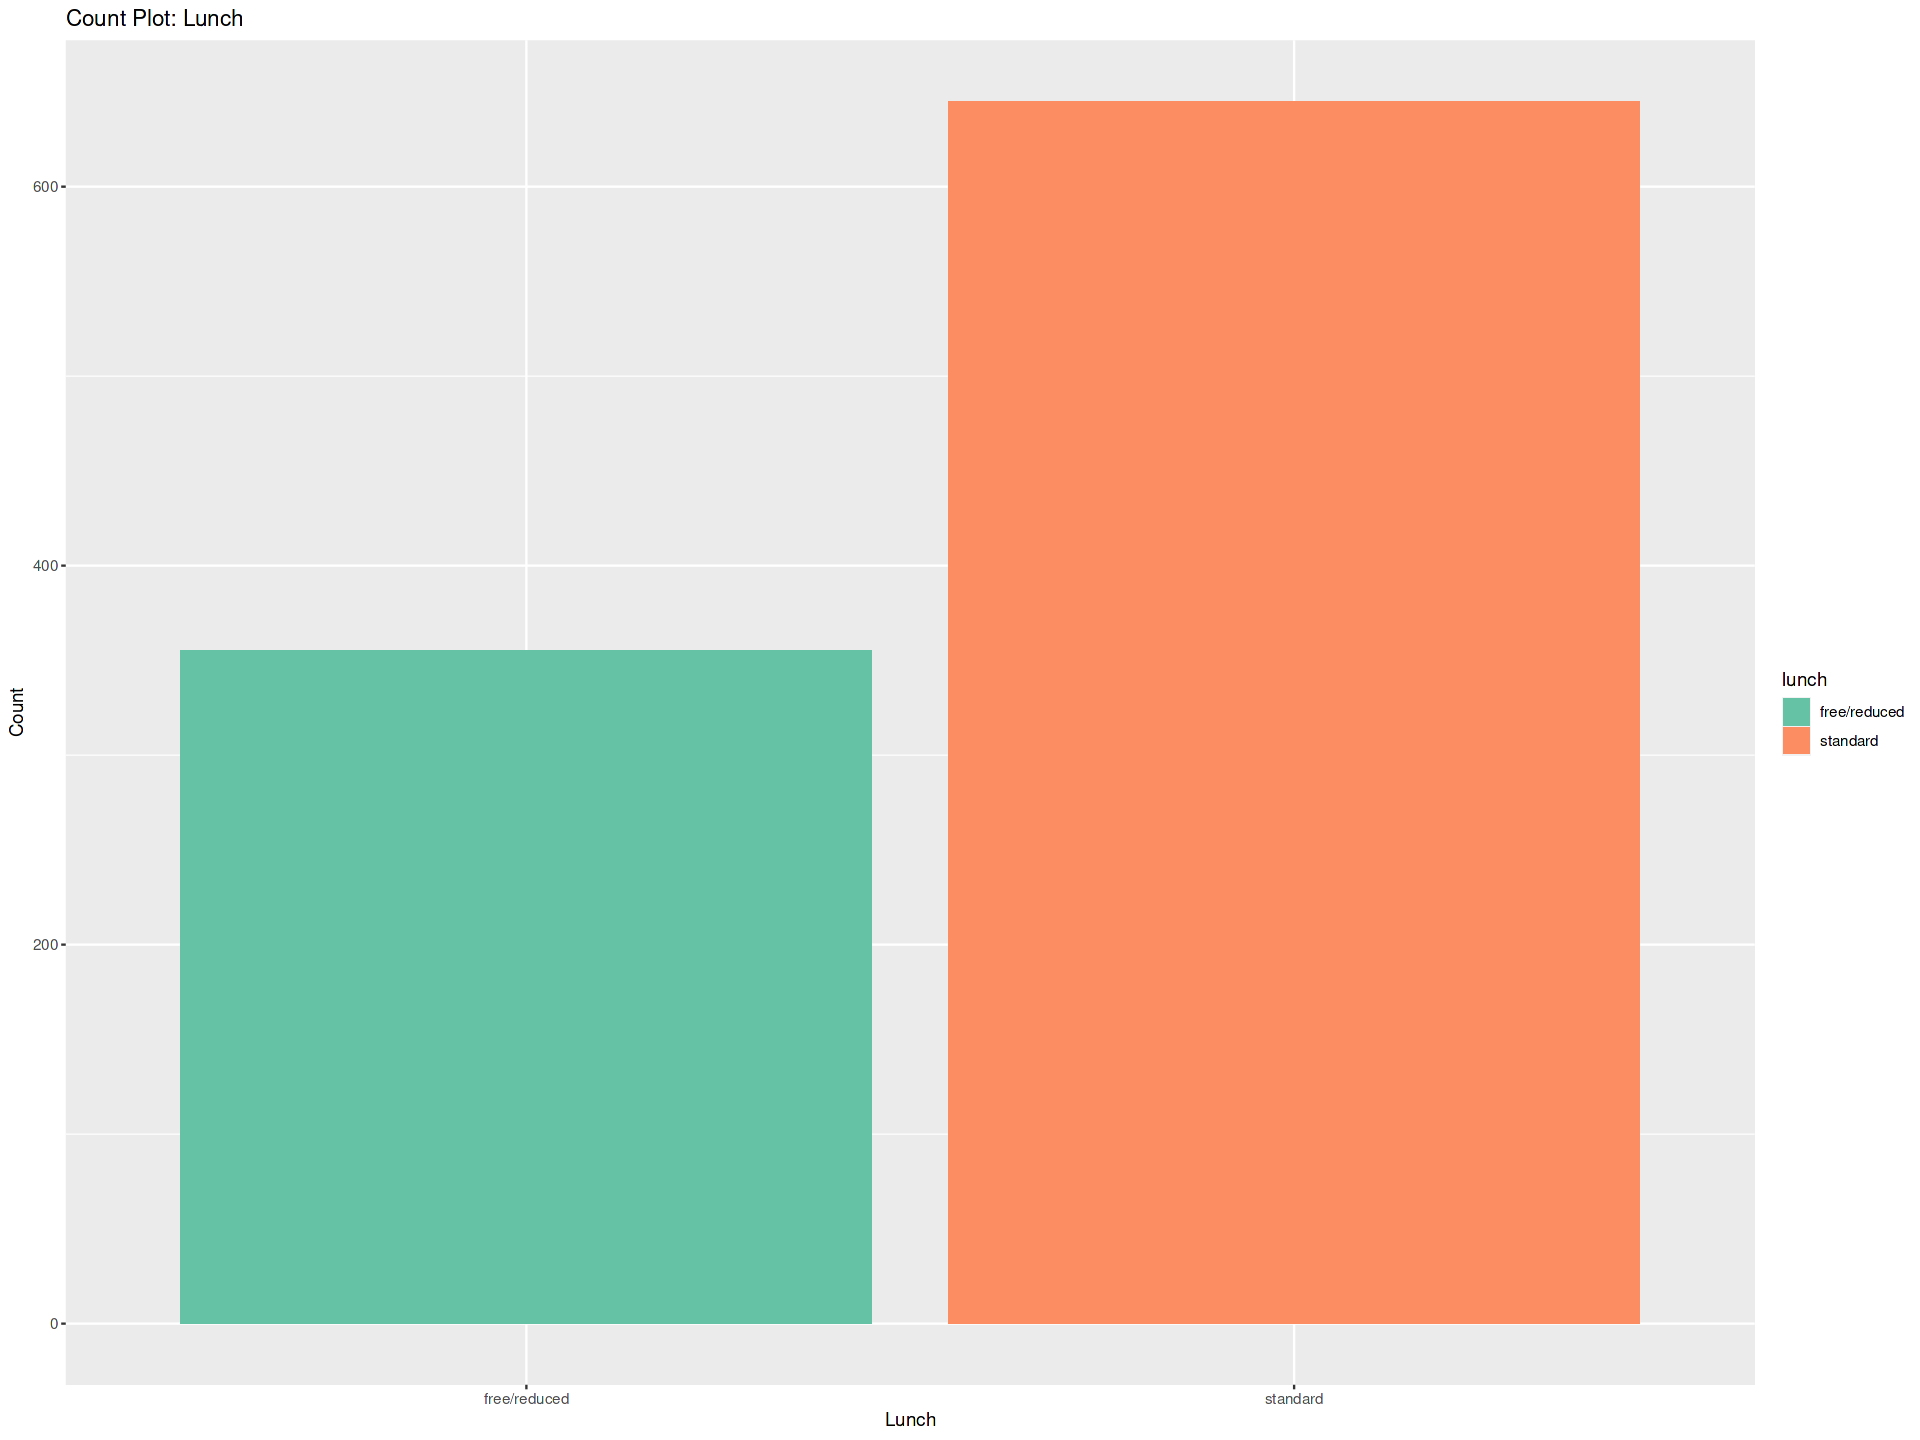

In [27]:
# Count plot for Lunch
ggplot(df, aes(x = lunch, fill = lunch)) +
  geom_bar() +
  xlab("Lunch") +
  ylab("Count") +
  ggtitle("Count Plot: Lunch") +
  scale_fill_brewer(palette = "Set2")

# Count of Students Who ate Free/Reduced or Standard Lunch

The chart illustrates that the number of students who ate each type of lunch. Stardard lunch almost doubling the amount of Free/Reduced. 


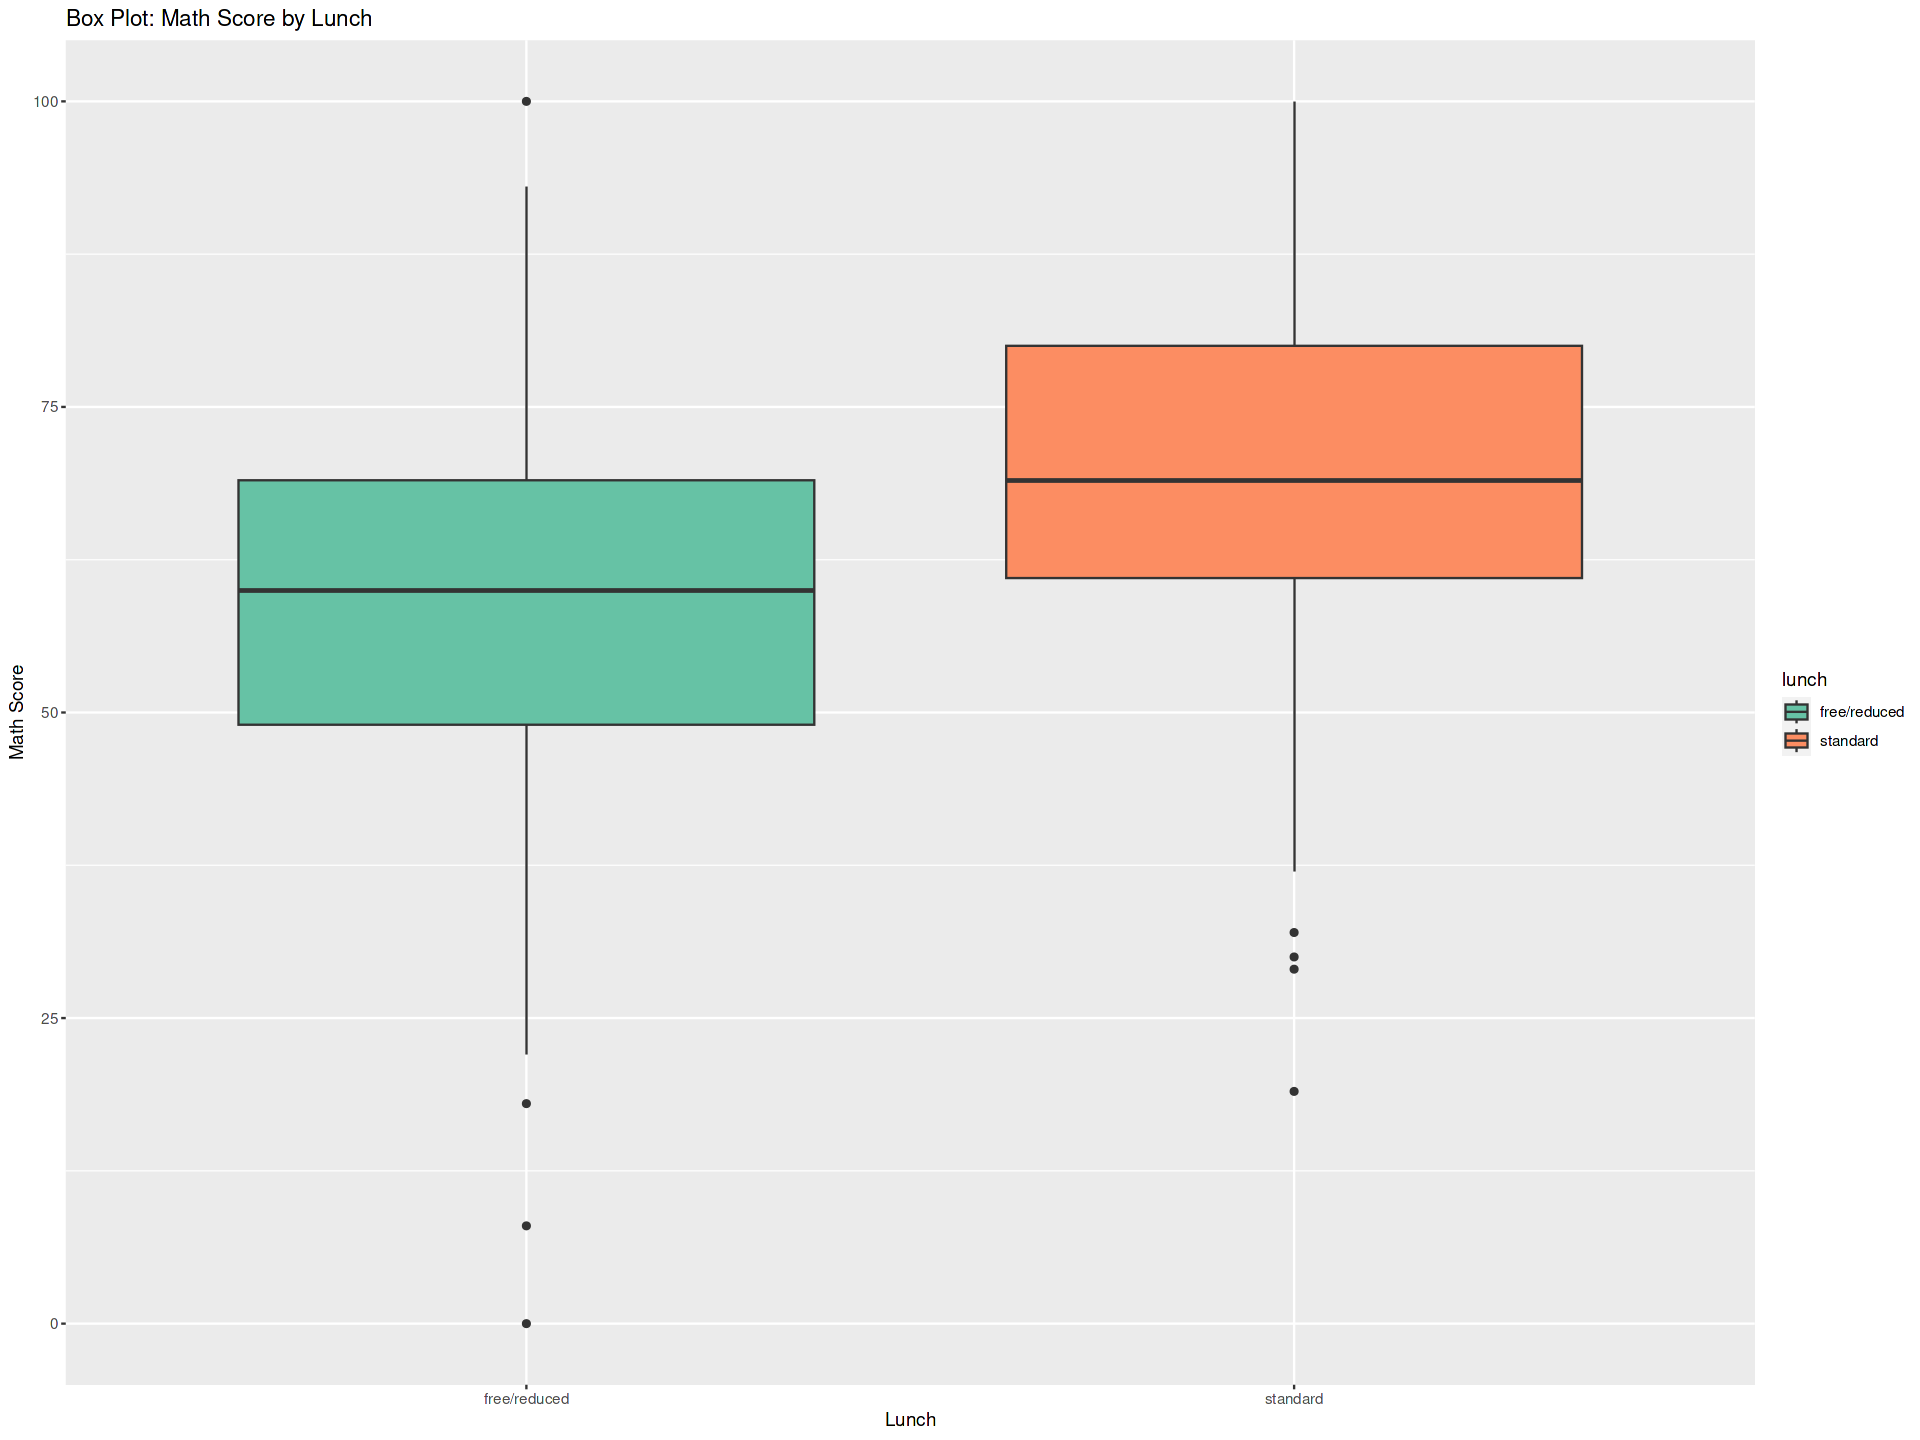

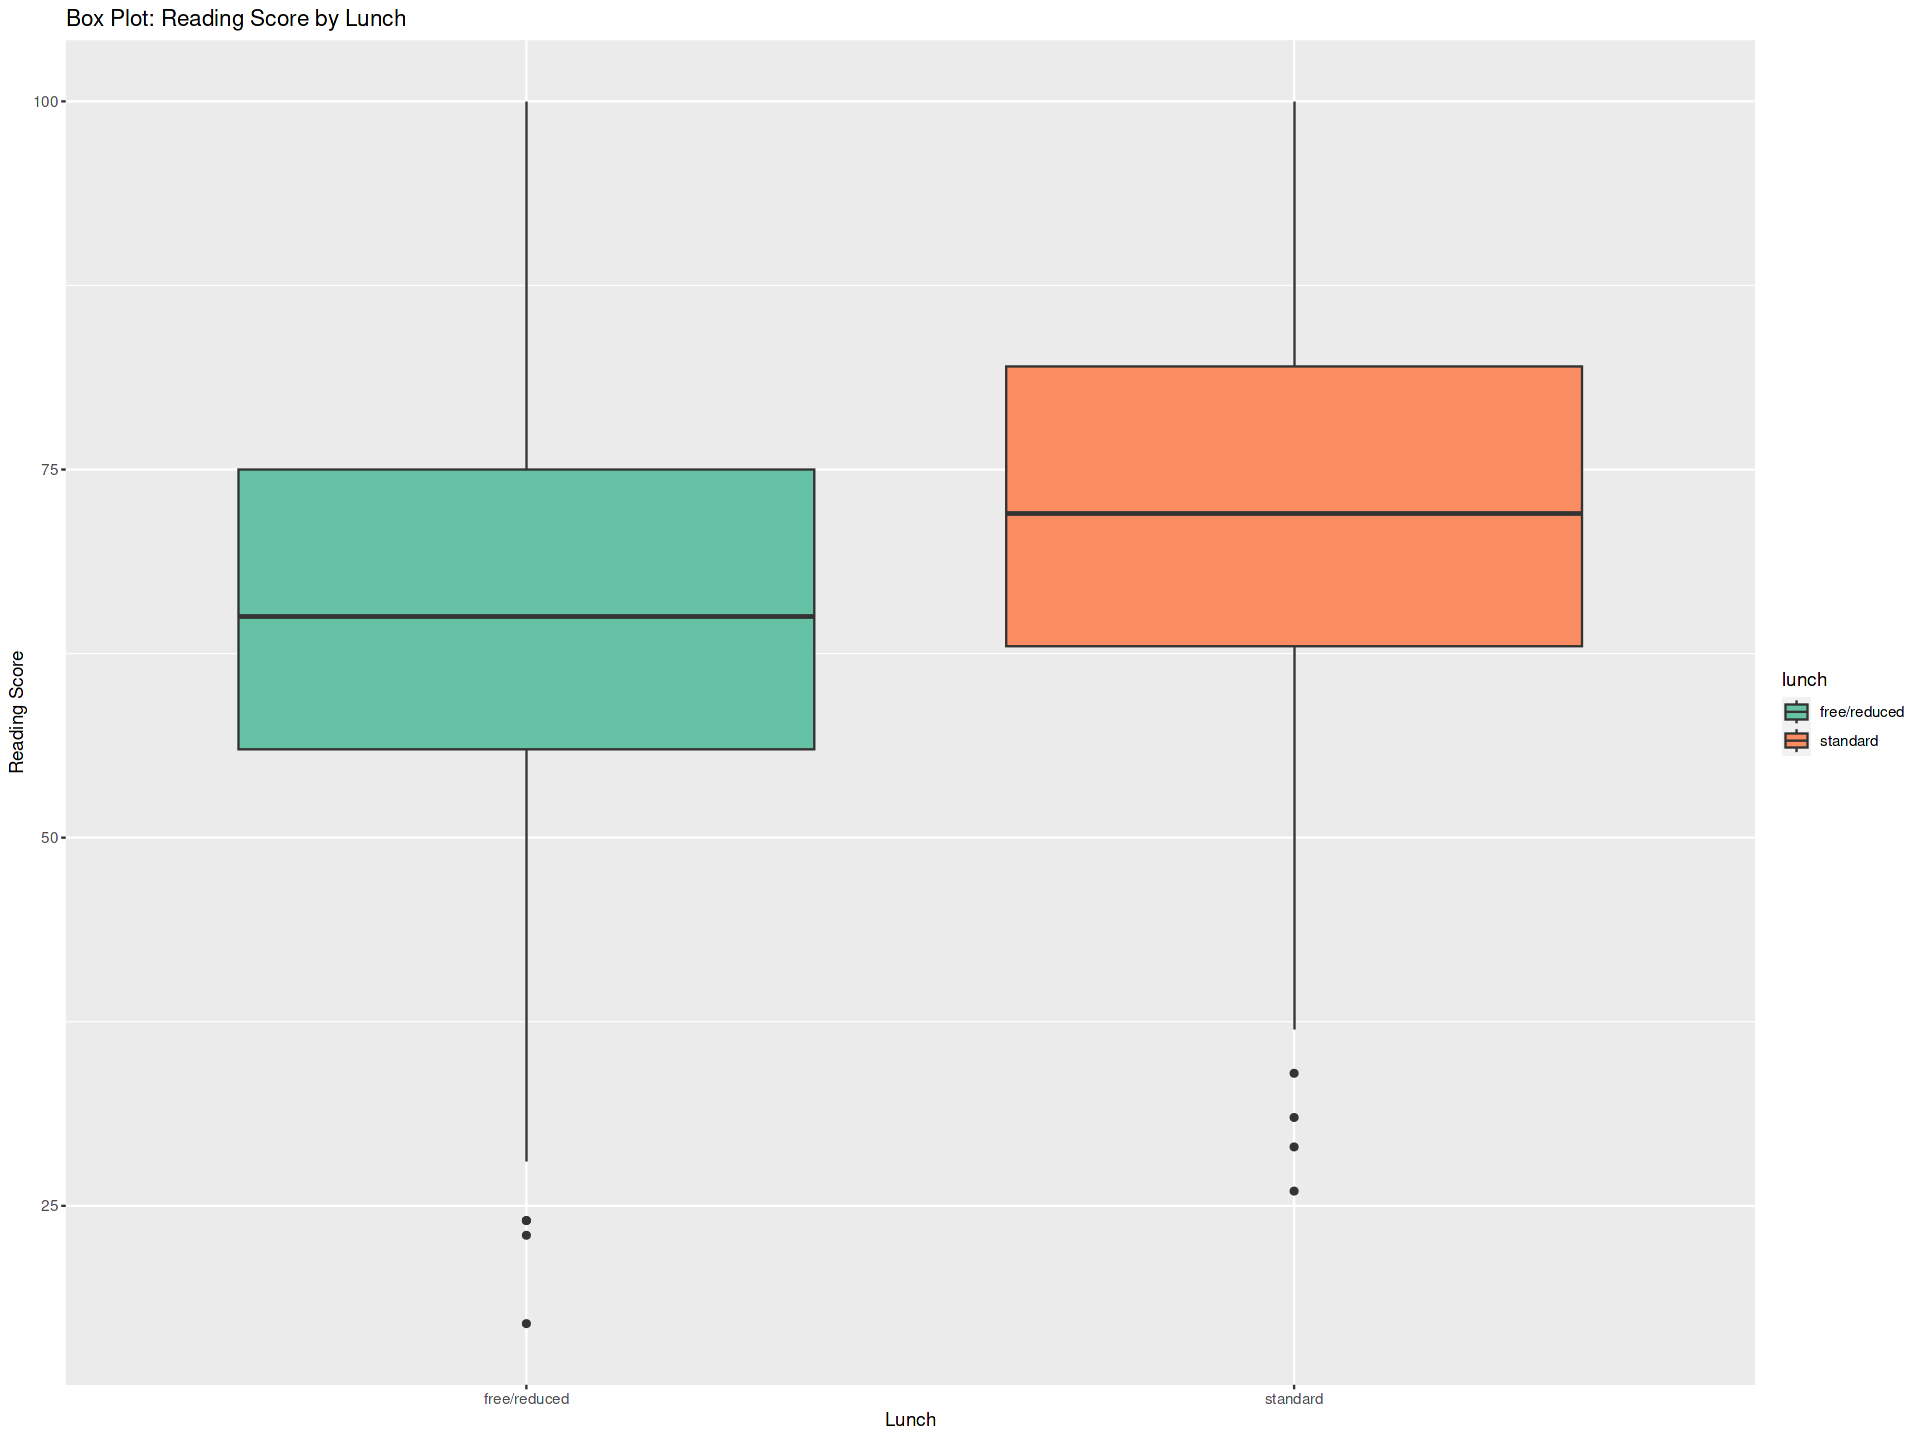

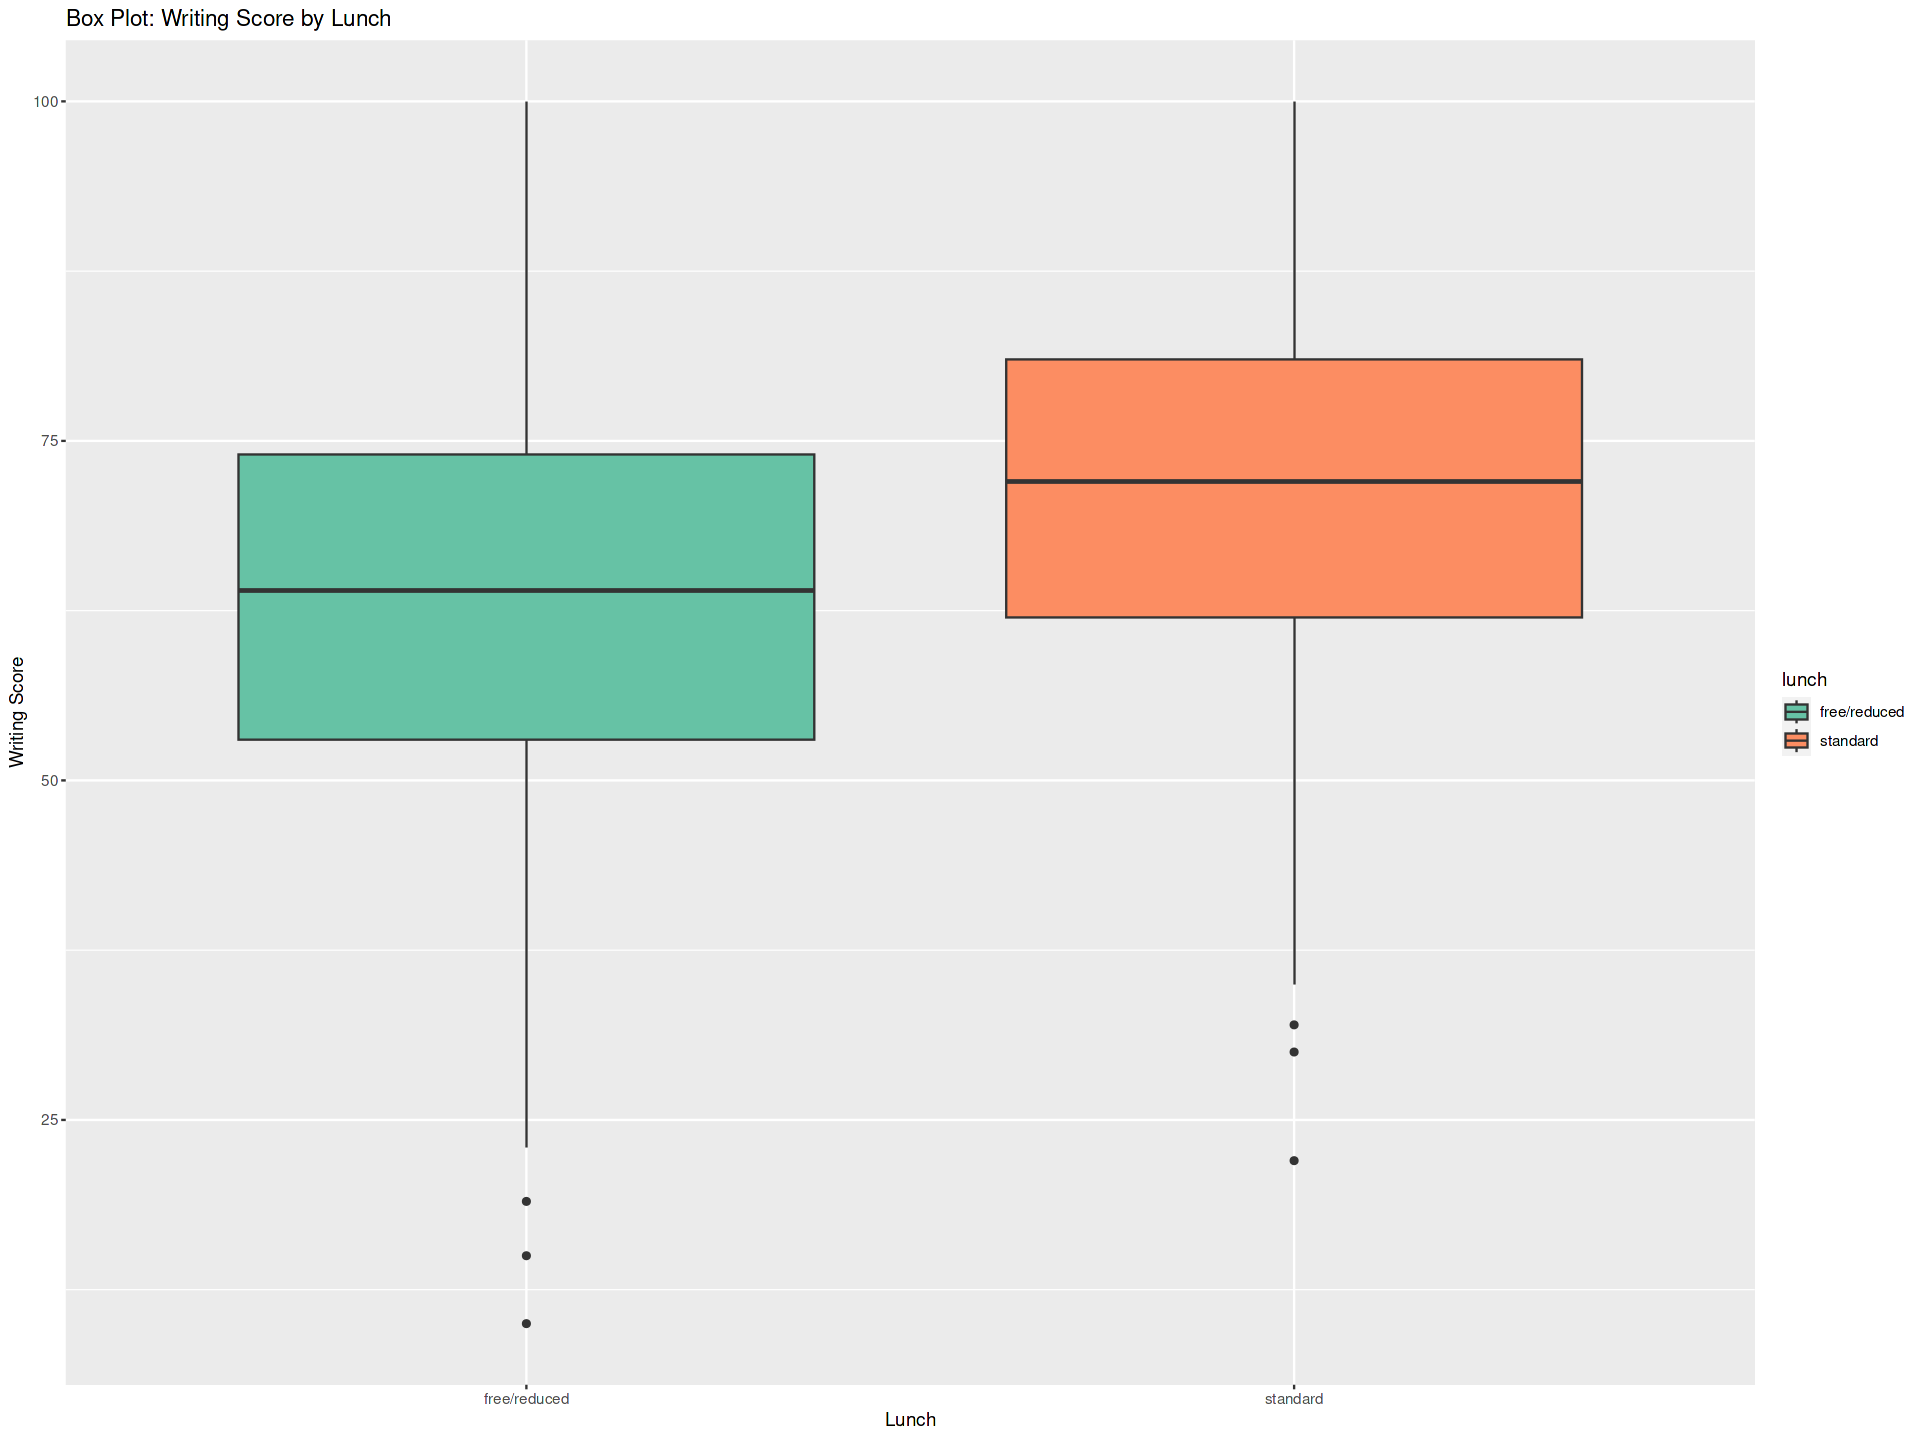

In [28]:
# Box plot for Math Score by Lunch
ggplot(df, aes(x = lunch, y = `math score`, fill = lunch)) +
  geom_boxplot() +
  xlab("Lunch") +
  ylab("Math Score") +
  ggtitle("Box Plot: Math Score by Lunch") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Reading Score by Lunch
ggplot(df, aes(x = lunch, y = `reading score`, fill = lunch)) +
  geom_boxplot() +
  xlab("Lunch") +
  ylab("Reading Score") +
  ggtitle("Box Plot: Reading Score by Lunch") +
  scale_fill_brewer(palette = "Set2")

# Box plot for Writing Score by Lunch
ggplot(df, aes(x = lunch, y = `writing score`, fill = lunch)) +
  geom_boxplot() +
  xlab("Lunch") +
  ylab("Writing Score") +
  ggtitle("Box Plot: Writing Score by Lunch") +
  scale_fill_brewer(palette = "Set2")

In [29]:
# Math Score Summary by Lunch
math_summary_lunch <- df %>%
  group_by(lunch) %>%
  summarize(mean = mean(`math score`),
            median = median(`math score`),
            sd = sd(`math score`),
            min = min(`math score`),
            max = max(`math score`))

# Print Math Score Summary by Lunch
print("Math Score Summary by Lunch:")
print(math_summary_lunch)

# Reading Score Summary by Lunch
reading_summary_lunch <- df %>%
  group_by(lunch) %>%
  summarize(mean = mean(`reading score`),
            median = median(`reading score`),
            sd = sd(`reading score`),
            min = min(`reading score`),
            max = max(`reading score`))

# Print Reading Score Summary by Lunch
print("Reading Score Summary by Lunch:")
print(reading_summary_lunch)

# Writing Score Summary by Lunch
writing_summary_lunch <- df %>%
  group_by(lunch) %>%
  summarize(mean = mean(`writing score`),
            median = median(`writing score`),
            sd = sd(`writing score`),
            min = min(`writing score`),
            max = max(`writing score`))

# Print Writing Score Summary by Lunch
print("Writing Score Summary by Lunch:")
print(writing_summary_lunch)

[1] "Math Score Summary by Lunch:"
# A tibble: 2 × 6
  lunch         mean median    sd   min   max
  <chr>        <dbl>  <dbl> <dbl> <dbl> <dbl>
1 free/reduced  58.9     60  15.2     0   100
2 standard      70.0     69  13.7    19   100
[1] "Reading Score Summary by Lunch:"
# A tibble: 2 × 6
  lunch         mean median    sd   min   max
  <chr>        <dbl>  <dbl> <dbl> <dbl> <dbl>
1 free/reduced  64.7     65  14.9    17   100
2 standard      71.7     72  13.8    26   100
[1] "Writing Score Summary by Lunch:"
# A tibble: 2 × 6
  lunch         mean median    sd   min   max
  <chr>        <dbl>  <dbl> <dbl> <dbl> <dbl>
1 free/reduced  63.0     64  15.4    10   100
2 standard      70.8     72  14.3    22   100


# Box Plot by Lunch

The provided data includes three box plots representing test scores separated by the type of lunch students ate: Math, Reading, and Writing. Each box plot provides a visual representation of the distribution of scores for students who had either a free/reduced lunch or a standard lunch. Additionally, the statistical data offers insights into the mean, median, standard deviation, minimum, and maximum scores for each lunch type.

Insights:

Math Scores:

* The box plot for students who had a standard lunch exhibits a higher median score compared to students who had a free/reduced lunch.
* The interquartile range (IQR) is relatively consistent between the two groups, suggesting similar spread of scores within each category.
* The standard lunch group also has a narrower spread of scores, indicating more consistent performance.

Reading Scores:

* Similar to the Math test, the box plot for students who had a standard lunch shows a higher median score compared to the free/reduced lunch group.
* The IQR remains relatively consistent between the two groups. 
* Additionally, the standard lunch group has a narrower spread of scores, suggesting more consistent performance.

Writing Scores:

* The box plot for students who had a standard lunch exhibits a higher median score compared to the free/reduced lunch group.
* The IQR remains relatively consistent between the two groups.
* The standard lunch group also has a narrower spread of scores, indicating more consistent performance.

Overall, the box plots and statistical data highlight the impact of lunch type on student test scores. Students who have a standard lunch tend to achieve higher median scores across all three subjects compared to those who have a free/reduced lunch. The narrower spread of scores and consistent performance in the standard lunch group suggest a potential link between nutrition and academic performance. These insights underscore the importance of access to quality meals and its influence on student achievement.

[1] 0.1679822
[1] 0.2164154
[1] -0.06827927
[1] 0.3508766
[1] -0.1777025


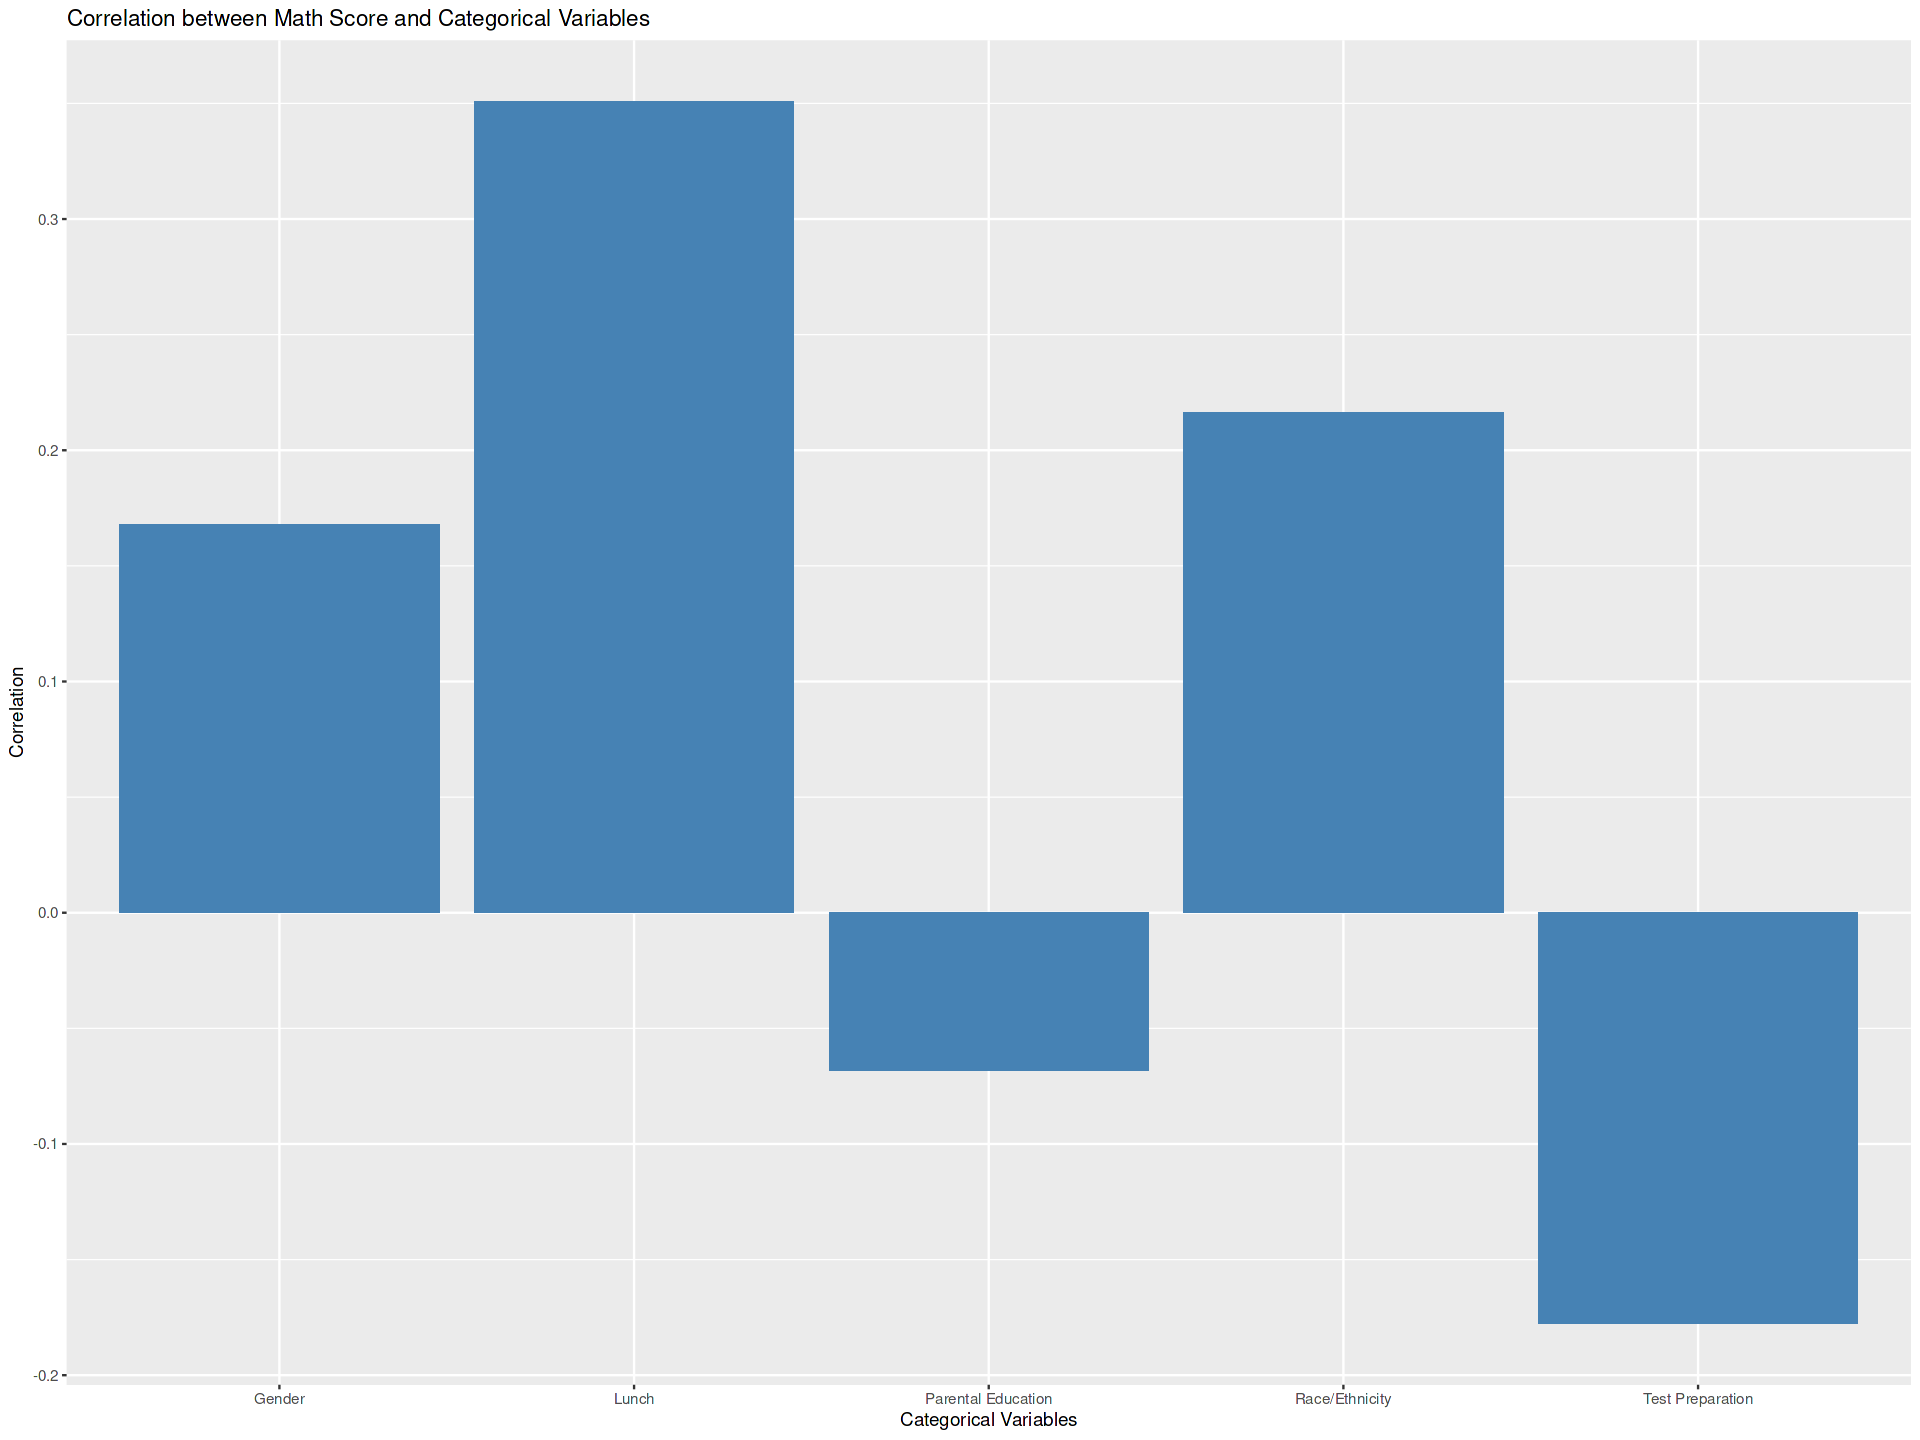

In [30]:
# Convert categorical columns to factors
df$gender <- as.factor(df$gender)
df$`race/ethnicity` <- as.factor(df$`race/ethnicity`)
df$`parental level of education` <- as.factor(df$`parental level of education`)
df$lunch <- as.factor(df$lunch)
df$`test preparation course` <- as.factor(df$`test preparation course`)

# Calculate correlation between math score and other categorical columns
cor_math_gender <- cor(df$`math score`, as.numeric(df$gender))
cor_math_race <- cor(df$`math score`, as.numeric(df$`race/ethnicity`))
cor_math_parental <- cor(df$`math score`, as.numeric(df$`parental level of education`))
cor_math_lunch <- cor(df$`math score`, as.numeric(df$lunch))
cor_math_prep_course <- cor(df$`math score`, as.numeric(df$`test preparation course`))

# Print the correlation values
print(cor_math_gender)
print(cor_math_race)
print(cor_math_parental)
print(cor_math_lunch)
print(cor_math_prep_course)

# Create a data frame with the correlation values
cor_data <- data.frame(
  Variable = c("Gender", "Race/Ethnicity", "Parental Education", "Lunch", "Test Preparation"),
  Correlation = c(cor_math_gender, cor_math_race, cor_math_parental, cor_math_lunch, cor_math_prep_course)
)

# Create the bar plot
plot <- ggplot(cor_data, aes(x = Variable, y = Correlation)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Categorical Variables", y = "Correlation") +
  ggtitle("Correlation between Math Score and Categorical Variables")

# Display the plot
print(plot)

# Correlation between Math Score and Categorical Variables

Insights:

* Gender: The correlation coefficient of 0.168 suggests a weak positive correlation between gender and math scores. This indicates that there is a slight tendency for one gender to have slightly higher math scores than the other. However, the correlation is not strong enough to make a definitive conclusion about the relationship between gender and math performance.

* Race/Ethnicity: The correlation coefficient of 0.216 indicates a weak positive correlation between race/ethnicity and math scores. This suggests that there might be a slight variation in math performance based on different racial or ethnic backgrounds. However, similar to gender, the correlation is not strong enough to draw strong conclusions about the impact of race/ethnicity on math scores.

* Parental Level of Education: The correlation coefficient of -0.068 suggests a weak negative correlation between parental level of education and math scores. This implies that there might be a slight tendency for students with parents having higher levels of education to have slightly lower math scores. However, it is important to note that the correlation is weak, and other factors might have a more significant influence on math performance.

* Lunch: The correlation coefficient of 0.351 indicates a moderate positive correlation between lunch and math scores. This suggests that students who have a standard lunch (presumably a higher quality meal) tend to have higher math scores compared to those who have a free/reduced lunch. The correlation coefficient being moderate indicates a relatively stronger relationship between lunch and math performance compared to the previous variables.

* Test Preparation Course: The correlation coefficient of -0.178 suggests a weak negative correlation between test preparation course and math scores. This indicates that students who have completed a test preparation course might have slightly lower math scores compared to those who have not taken such a course. However, as with the other variables, the correlation is not strong enough to draw definitive conclusions about the impact of test preparation on math performance.

Overall, the correlation analysis reveals that lunch has a relatively stronger relationship with math scores compared to the other variables. While gender, race/ethnicity, parental level of education, and test preparation course show weak correlations, indicating only slight associations with math performance. It is important to consider that correlation does not imply causation, and other factors not included in the analysis may also influence math scores.

[1] -0.2443126
[1] 0.1452526
[1] -0.07244364
[1] 0.2295603
[1] -0.2417804


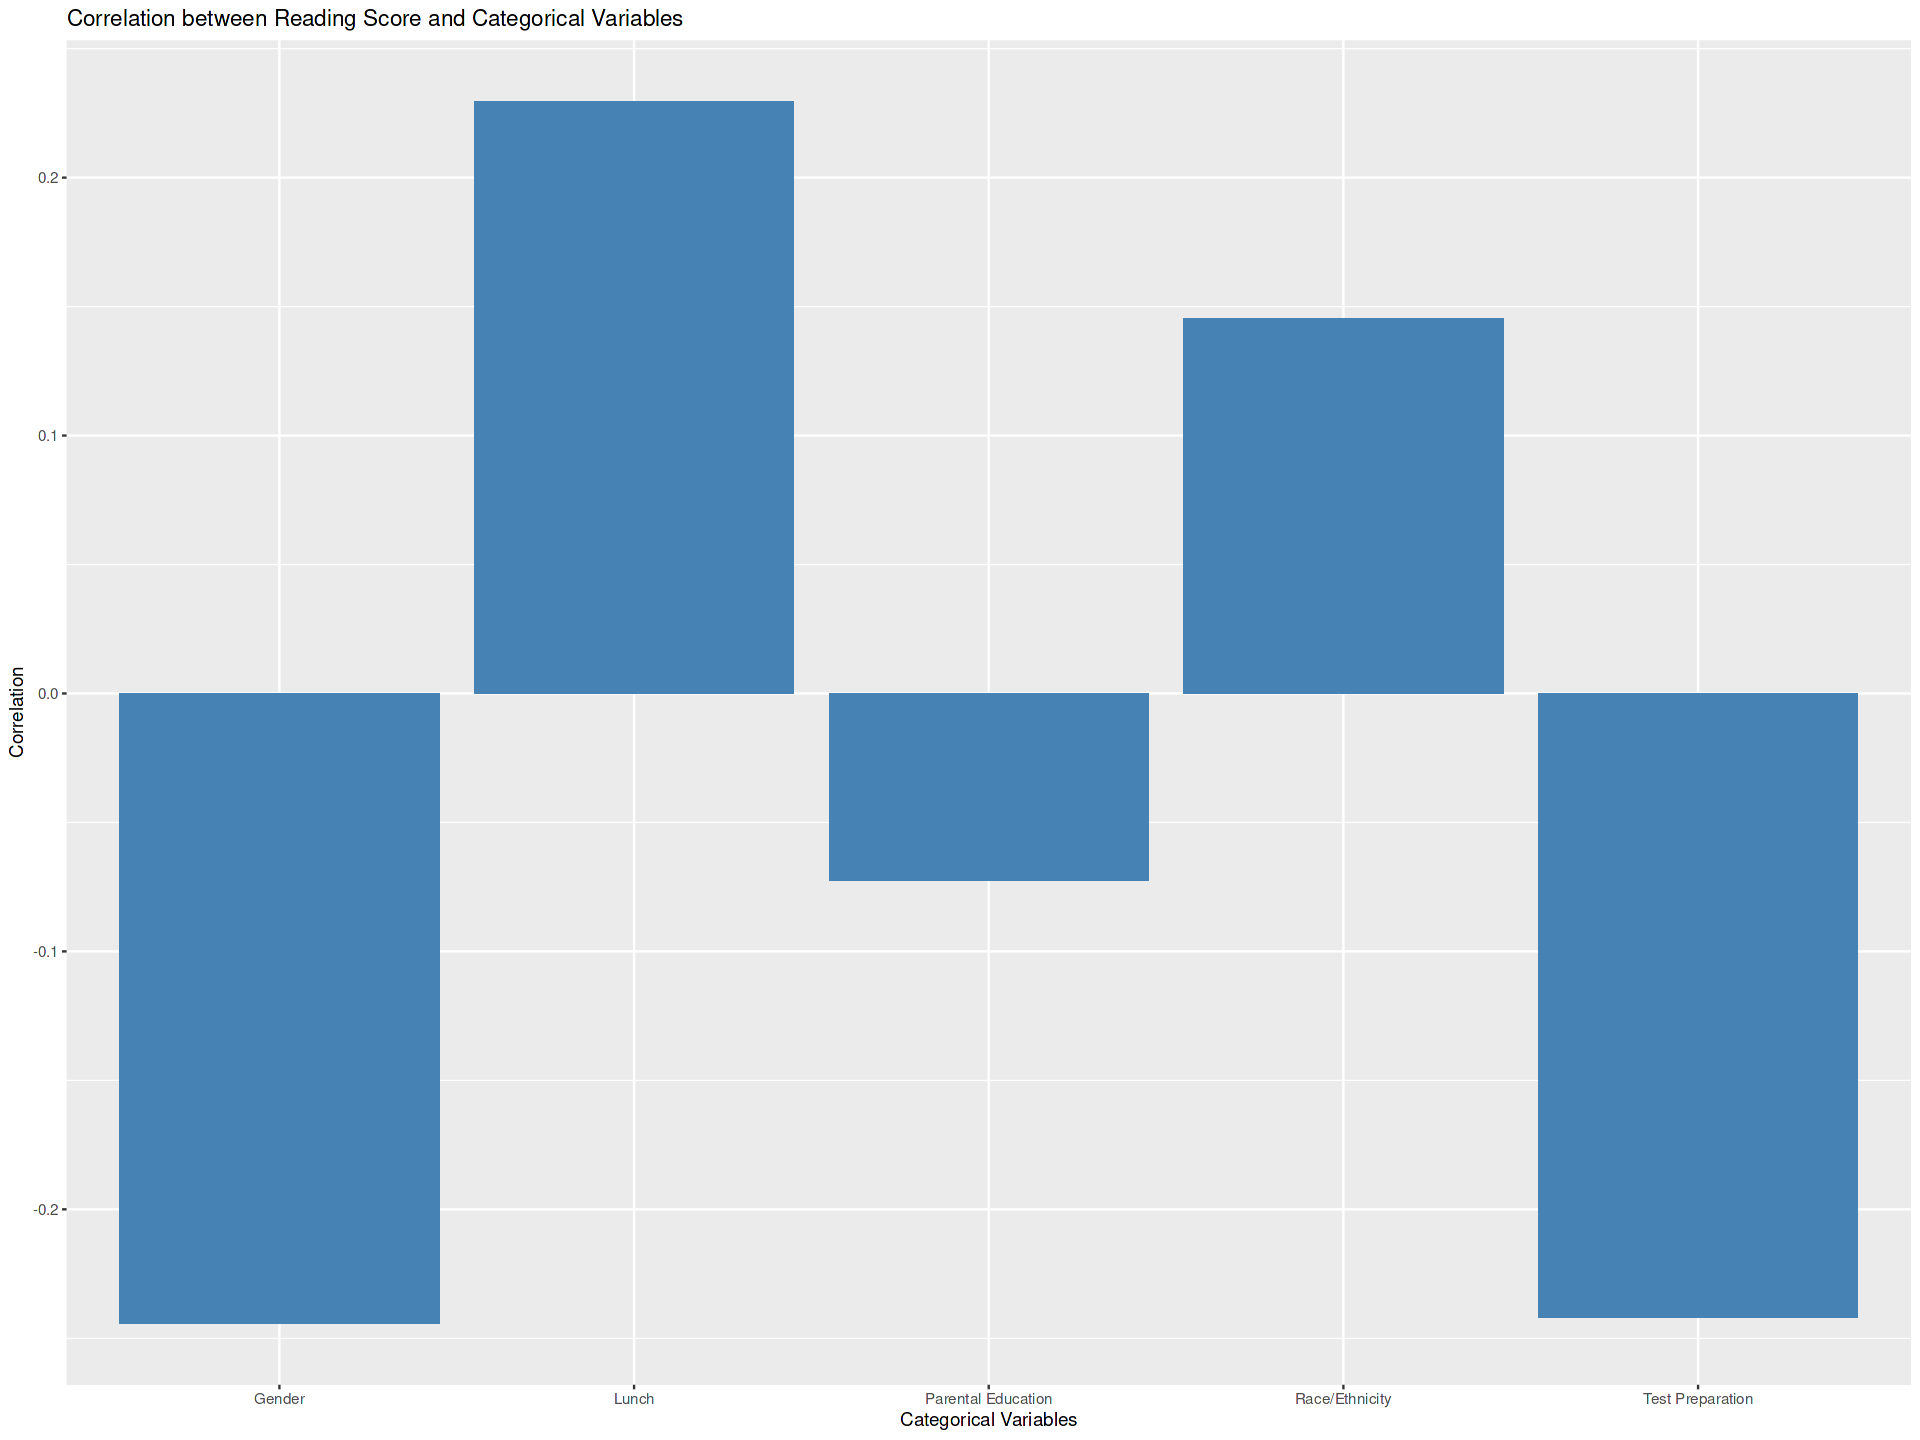

In [31]:
# Calculate correlation between reading score and other categorical columns
cor_reading_gender <- cor(df$`reading score`, as.numeric(df$gender))
cor_reading_race <- cor(df$`reading score`, as.numeric(df$`race/ethnicity`))
cor_reading_parental <- cor(df$`reading score`, as.numeric(df$`parental level of education`))
cor_reading_lunch <- cor(df$`reading score`, as.numeric(df$lunch))
cor_reading_prep_course <- cor(df$`reading score`, as.numeric(df$`test preparation course`))

# Print the correlation values for reading score
print(cor_reading_gender)
print(cor_reading_race)
print(cor_reading_parental)
print(cor_reading_lunch)
print(cor_reading_prep_course)

# Create a data frame with the correlation values for reading score
cor_reading_data <- data.frame(
  Variable = c("Gender", "Race/Ethnicity", "Parental Education", "Lunch", "Test Preparation"),
  Correlation = c(cor_reading_gender, cor_reading_race, cor_reading_parental, cor_reading_lunch, cor_reading_prep_course)
)

# Create the bar plot for reading score
reading_plot <- ggplot(cor_reading_data, aes(x = Variable, y = Correlation)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Categorical Variables", y = "Correlation") +
  ggtitle("Correlation between Reading Score and Categorical Variables")

# Display the plot for reading score
print(reading_plot)

# Correlation between Reading Score and Categorical Variables


Insights:

* Gender: The correlation coefficient of -0.244 indicates a weak negative correlation between gender and reading scores. This suggests that there might be a slight tendency for one gender to have slightly lower reading scores compared to the other. However, the correlation is not strong enough to draw definitive conclusions about the relationship between gender and reading performance.

* Race/Ethnicity: The correlation coefficient of 0.145 suggests a weak positive correlation between race/ethnicity and reading scores. This indicates that there might be a slight variation in reading performance based on different racial or ethnic backgrounds. However, similar to gender, the correlation is not strong enough to make conclusive statements about the impact of race/ethnicity on reading scores.

* Parental Level of Education: The correlation coefficient of -0.072 indicates a weak negative correlation between parental level of education and reading scores. This implies that there might be a slight tendency for students with parents having higher levels of education to have slightly lower reading scores. However, the correlation is weak, and other factors may have a more significant influence on reading performance.

* Lunch: The correlation coefficient of 0.230 indicates a weak positive correlation between lunch and reading scores. This suggests that students who have a standard lunch (presumably a higher quality meal) tend to have slightly higher reading scores compared to those who have a free/reduced lunch. However, the correlation is not strong, and other factors may also contribute to reading performance.

* Test Preparation Course: The correlation coefficient of -0.242 indicates a weak negative correlation between test preparation course and reading scores. This implies that students who have completed a test preparation course might have slightly lower reading scores compared to those who have not taken such a course. However, as with the other variables, the correlation is weak, and other factors may have a more significant influence on reading performance.

Overall, the correlation analysis reveals weak correlations between reading scores and the variables. Gender, parental level of education, and test preparation course show weak correlations, suggesting only slight associations with reading performance. Race/ethnicity and lunch have slightly stronger correlations, indicating a slightly more noticeable relationship with reading scores. However, it is important to consider that correlation does not imply causation, and other factors not included in the analysis may also influence reading performance.

[1] -0.3012249
[1] 0.1656905
[1] -0.08429931
[1] 0.2457687
[1] -0.3129463


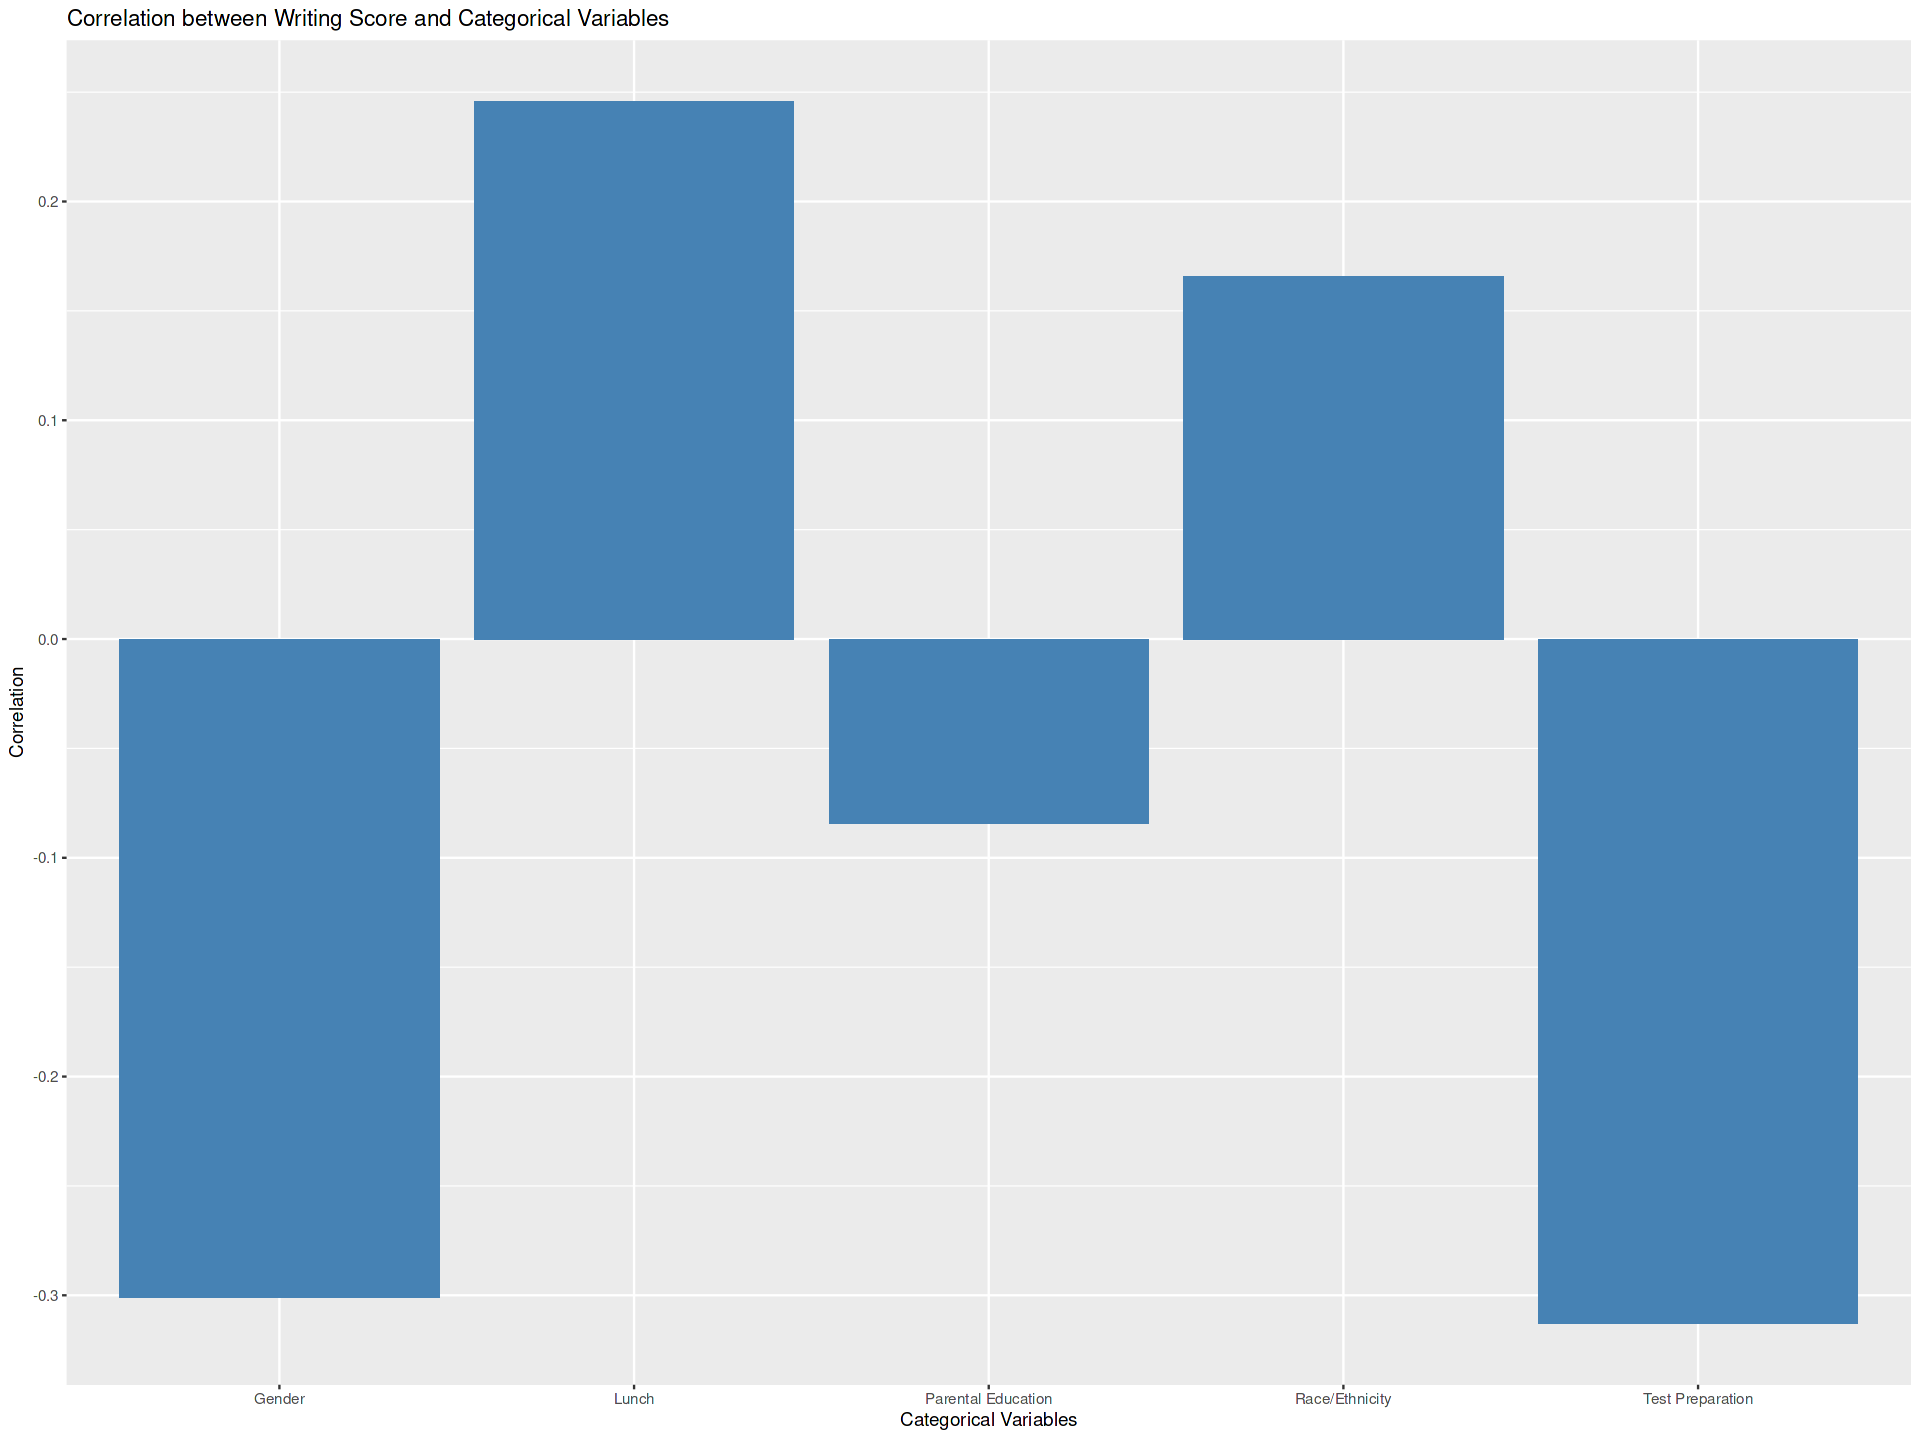

In [32]:
# Calculate correlation between writing score and other categorical columns
cor_writing_gender <- cor(df$`writing score`, as.numeric(df$gender))
cor_writing_race <- cor(df$`writing score`, as.numeric(df$`race/ethnicity`))
cor_writing_parental <- cor(df$`writing score`, as.numeric(df$`parental level of education`))
cor_writing_lunch <- cor(df$`writing score`, as.numeric(df$lunch))
cor_writing_prep_course <- cor(df$`writing score`, as.numeric(df$`test preparation course`))

# Print the correlation values for writing score
print(cor_writing_gender)
print(cor_writing_race)
print(cor_writing_parental)
print(cor_writing_lunch)
print(cor_writing_prep_course)

# Create a data frame with the correlation values for writing score
cor_writing_data <- data.frame(
  Variable = c("Gender", "Race/Ethnicity", "Parental Education", "Lunch", "Test Preparation"),
  Correlation = c(cor_writing_gender, cor_writing_race, cor_writing_parental, cor_writing_lunch, cor_writing_prep_course)
)

# Create the bar plot for writing score
writing_plot <- ggplot(cor_writing_data, aes(x = Variable, y = Correlation)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Categorical Variables", y = "Correlation") +
  ggtitle("Correlation between Writing Score and Categorical Variables")

# Display the plot for writing score
print(writing_plot)

# Correlation between Writing Score and Categorical Variables

Insights:

* Gender: The correlation coefficient of -0.301 suggests a moderate negative correlation between gender and writing scores. This indicates that there might be a noticeable difference in writing performance between genders, with one gender tending to have lower scores compared to the other. However, further analysis is required to determine the factors contributing to this gender disparity in writing scores.

* Race/Ethnicity: The correlation coefficient of 0.166 indicates a weak positive correlation between race/ethnicity and writing scores. This suggests that there might be some variation in writing performance based on different racial or ethnic backgrounds. However, the correlation is not strong enough to draw definitive conclusions about the relationship between race/ethnicity and writing scores.

* Parental Level of Education: The correlation coefficient of -0.084 suggests a weak negative correlation between parental level of education and writing scores. This implies that there might be a slight tendency for students with parents having higher levels of education to have slightly lower writing scores. However, the correlation is weak, and other factors may have a more significant influence on writing performance.

* Lunch: The correlation coefficient of 0.246 indicates a weak positive correlation between lunch and writing scores. This suggests that students who have a standard lunch (presumably a higher quality meal) tend to have slightly higher writing scores compared to those who have a free/reduced lunch. However, the correlation is not strong, and other factors may also contribute to writing performance.

* Test Preparation Course: The correlation coefficient of -0.313 suggests a moderate negative correlation between test preparation course and writing scores. This indicates that students who have completed a test preparation course might have lower writing scores compared to those who have not taken such a course. However, it is important to note that correlation does not imply causation, and further analysis is needed to understand the underlying factors contributing to this correlation.

Overall, the correlation analysis reveals mixed correlations between writing scores and the variables. Gender and test preparation course show moderate negative correlations, suggesting potential disparities in writing scores based on these factors. Race/ethnicity and lunch have weaker positive correlations, indicating some variation in writing performance related to these variables. Parental level of education shows a weak negative correlation, suggesting a minor influence on writing scores. However, it is important to conduct further analysis and consider other factors that may contribute to writing performance.


# Summary

Exploratory Data Analysis (EDA) plays a vital role in comprehending datasets and extracting meaningful insights. In this EDA, we thoroughly examined several variables, namely gender, race/ethnicity, parental level of education, and lunch, in relation to their impact on students' performance across three tests. The findings from this analysis yielded valuable insights into the associations between these variables and test scores. While some variables demonstrated moderate correlations with academic performance, it is important to acknowledge that additional factors not considered in this analysis may also contribute to students' achievements. Further investigation, such as employing regression modeling or hypothesis testing, can enable us to delve deeper, uncovering more insights, and achieving a more comprehensive understanding of the dataset at hand.